In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 16


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 16


store_mean_0-lag0-offset16

 family_0-lag0-offset16

 city_0-lag0-offset16

 cluster_mv36-lag0-offset16

 cluster_0-lag0-offset16

 city_mv36-lag0-offset16

 item_mean_0-lag0-offset16

 class_0-lag0-offset16

 type_0-lag0-offset16

 type_mv36-lag0-offset16

 state_mv36-lag0-offset16

 class_mv36-lag0-offset16

 state_0-lag0-offset16

 family_mv36-lag0-offset16

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset16

 y_0-lag1-offset16

 y_0-lag2-offset16

 y_0-lag3-offset16

 y_0-lag4-offset16

 y_0-lag5-offset16

 y_0-lag6-offset16

 sales_ma_224-lag0-offset16

 sales_ma_14-lag0-offset16

 sales_ma_28-lag0-offset16

 sales_ma_112-lag0-offset16

 sales_ma_7-lag0-offset16

 sales_ma_3-lag0-offset16

 sales_ma_56-lag0-offset16

 sales_week_season_ma_p7-lag5-offset16

 sales_week_season_ma_p4-lag5-offset16

 sales_week_season_ma_p13-lag5-offset16

 sales_week_season_ma_p2-lag5-offset16

 sales_week_season_ma_p3-lag5-offset16

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 42s, sys: 25.8 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset16  family_0-lag0-offset16  \
1683                    1.618164                1.622070   
1684                    1.541992                1.587891   
1685                    1.570312                1.683594   
1686                    1.513672                1.821289   
1687                    1.291016                1.852539   
1688                    1.554688                1.739258   
1689                    1.582031                1.780273   

      city_0-lag0-offset16  cluster_mv36-lag0-offset16  \
1683              1.780273                    1.652344   
1684              1.711914                    1.648438   
1685              1.833984                    1.650391   
1686              1.964844                    1.652344   
1687              2.025391                    1.650391   
1688              1.891602                    1.648438   
1689              1.948242                    1.649414   

      cluster_0-lag0-offset16  city_mv36-lag0-offset16  \
1683                 1.649414                 1.871094   
1684                 1.529297                 1.868164   
1685                 1.640625                 1.871094   
1686                 1.695312                 1.875000   
1687                 1.696289                 1.875977   
1688                 1.631836                 1.871094   
1689                 1.679688                 1.875000   

      item_mean_0-lag0-offset16  class_0-lag0-offset16  type_0-lag0-offset16  \
1683                   1.777344               1.555664              1.654297   
1684                   1.782227               1.607422              1.541016   
1685                   1.924805               1.776367              1.650391   
1686                   2.148438               1.877930              1.713867   
1687                   2.013672               1.715820              1.728516   
1688                   1.767578               1.609375              1.654297   
1689                   1.710938               1.669922              1.695312   

      type_mv36-lag0-offset16  state_mv36-lag0-offset16  \
1683                 1.660156                  1.869141   
1684                 1.656250                  1.866211   
1685                 1.660156                  1.869141   
1686                 1.661133                  1.873047   
1687                 1.661133                  1.874023   
1688                 1.658203                  1.869141   
1689                 1.660156                  1.873047   

      class_mv36-lag0-offset16  state_0-lag0-offset16  \
1683                  1.648438               1.776367   
1684                  1.651367               1.709961   
1685                  1.658203               1.833008   
1686                  1.664062               1.957031   
1687                  1.661133               2.017578   
1688                  1.659180               1.890625   
1689                  1.664062               1.953125   

      family_mv36-lag0-offset16  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.711914                     1.0                1.0   
1684                   1.710938                     0.0                1.0   
1685                   1.714844                     0.0                1.0   
1686                   1.718750                     0.0                1.0   
1687                   1.719727                     0.0                1.0   
1688                   1.715820                     0.0                1.0   
1689                   1.717773                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset16  y_0-lag1-offset16  \
1683             0.733398           1.946289           1.386719   
1684             0.799805           2.080078           1.946289   
1685             0.866699           2.398438           2.080078   
1686             0.933105           2.564453           2.398438   
1687             0.000000           1.791992           2.564453 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset16     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset16  0.0002  0.0002     0.0     0.0   
2                     city_0-lag0-offset16     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset16     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset16     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset16     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset16  0.0822  0.0802  0.0817  0.0849   
7                    class_0-lag0-offset16  0.0088  0.0085  0.0085   0.009   
8                     type_0-lag0-offset16     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset16     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset16     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset16   0.008   0.008   0.008   0.008   
12                   state_0-lag0-offset16     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset16     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset16  0.5345  0.4972  0.4964  0.5195   
18                       y_0-lag1-offset16  0.5599  0.5345  0.4972  0.4964   
19                       y_0-lag2-offset16  0.5474  0.5599  0.5345  0.4972   
20                       y_0-lag3-offset16  0.5429  0.5474  0.5599  0.5345   
21                       y_0-lag4-offset16  0.5249  0.5429  0.5474  0.5599   
22                       y_0-lag5-offset16  0.5019  0.5249  0.5429  0.5474   
23                       y_0-lag6-offset16  0.5041  0.5019  0.5249  0.5429   
24              sales_ma_224-lag0-offset16  0.5037  0.5036  0.5037  0.5037   
25               sales_ma_14-lag0-offset16  0.5174  0.5172  0.5174  0.5164   
26               sales_ma_28-lag0-offset16  0.4994  0.5009  0.5019  0.5029   
27              sales_ma_112-lag0-offset16  0.4909  0.4907  0.4907  0.4904   
28                sales_ma_7-lag0-offset16  0.5071  0.5061  0.5048  0.5034   
29                sales_ma_3-lag0-offset16  0.5347   0.515  0.4928   0.489   
30               sales_ma_56-lag0-offset16  0.4937  0.4942  0.4948  0.4951   
31   sales_week_season_ma_p7-lag5-offset16     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag5-offset16     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag5-offset16     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag5-offset16  0.5019  0.5249  0.5429  0.5474   
35   sales_week_season_ma_p3-lag5-offset16     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0837  0.0871  
7   0.0085  0.0083  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11   0.008   0.008  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5059  0.5149  
18  0.5195  0.5059  
19  0.4964  0.5195  
20  0.4972  0.4964  
21  0.5345  0.4972  
22  0.5599  0.5345  
23  0.5474  0.5599  
24  0.5036  0.5035  
25  0.5133  0.5107  
26  0.5021   0.502  
27  0.4901  0.4899  
28  0.4975  0.4929  
29  0.4925  0.4987  
30  0.4943  0.4939  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5599  0.5345  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2457:36:40 - loss: 1.7460

     8192/316424880 [..............................] - ETA: 307:45:33 - loss: 0.6714 

    15360/316424880 [..............................] - ETA: 164:26:07 - loss: 0.5778

    23552/316424880 [..............................] - ETA: 107:26:48 - loss: 0.5233

    31744/316424880 [..............................] - ETA: 79:51:35 - loss: 0.4768 

    39936/316424880 [..............................] - ETA: 63:35:31 - loss: 0.4383

    48128/316424880 [..............................] - ETA: 52:51:45 - loss: 0.4127

    56320/316424880 [..............................] - ETA: 45:15:33 - loss: 0.4004

    64512/316424880 [..............................] - ETA: 39:34:58 - loss: 0.3865

    72704/316424880 [..............................] - ETA: 35:11:08 - loss: 0.3749

    80896/316424880 [..............................] - ETA: 31:40:40 - loss: 0.3668

    89088/316424880 [..............................] - ETA: 28:48:54 - loss: 0.3632

    96256/316424880 [..............................] - ETA: 26:42:51 - loss: 0.3588

   104448/316424880 [..............................] - ETA: 24:39:44 - loss: 0.3535

   112640/316424880 [..............................] - ETA: 22:54:30 - loss: 0.3491

   120832/316424880 [..............................] - ETA: 21:23:31 - loss: 0.3456

   129024/316424880 [..............................] - ETA: 20:04:06 - loss: 0.3420

   137216/316424880 [..............................] - ETA: 18:54:19 - loss: 0.3386

   145408/316424880 [..............................] - ETA: 17:52:22 - loss: 0.3369

   153600/316424880 [..............................] - ETA: 16:56:56 - loss: 0.3330

   161792/316424880 [..............................] - ETA: 16:07:08 - loss: 0.3311

   169984/316424880 [..............................] - ETA: 15:22:04 - loss: 0.3295

   178176/316424880 [..............................] - ETA: 14:41:09 - loss: 0.3274

   187392/316424880 [..............................] - ETA: 13:59:23 - loss: 0.3255

   195584/316424880 [..............................] - ETA: 13:25:40 - loss: 0.3249

   203776/316424880 [..............................] - ETA: 12:54:37 - loss: 0.3238

   211968/316424880 [..............................] - ETA: 12:26:00 - loss: 0.3230

   220160/316424880 [..............................] - ETA: 11:59:26 - loss: 0.3223

   228352/316424880 [..............................] - ETA: 11:34:47 - loss: 0.3218

   236544/316424880 [..............................] - ETA: 11:11:53 - loss: 0.3212

   244736/316424880 [..............................] - ETA: 10:50:30 - loss: 0.3208

   252928/316424880 [..............................] - ETA: 10:30:32 - loss: 0.3203

   261120/316424880 [..............................] - ETA: 10:11:50 - loss: 0.3192

   269312/316424880 [..............................] - ETA: 9:54:17 - loss: 0.3185 

   277504/316424880 [..............................] - ETA: 9:37:46 - loss: 0.3170

   285696/316424880 [..............................] - ETA: 9:22:10 - loss: 0.3169

   293888/316424880 [..............................] - ETA: 9:07:27 - loss: 0.3166

   302080/316424880 [..............................] - ETA: 8:53:29 - loss: 0.3160

   310272/316424880 [..............................] - ETA: 8:40:16 - loss: 0.3155

   318464/316424880 [..............................] - ETA: 8:27:44 - loss: 0.3152

   326656/316424880 [..............................] - ETA: 8:15:50 - loss: 0.3149

   334848/316424880 [..............................] - ETA: 8:04:30 - loss: 0.3147

   343040/316424880 [..............................] - ETA: 7:53:42 - loss: 0.3137

   351232/316424880 [..............................] - ETA: 7:43:25 - loss: 0.3126

   359424/316424880 [..............................] - ETA: 7:33:39 - loss: 0.3126

   367616/316424880 [..............................] - ETA: 7:24:18 - loss: 0.3125

   375808/316424880 [..............................] - ETA: 7:15:23 - loss: 0.3118

   382976/316424880 [..............................] - ETA: 7:07:55 - loss: 0.3114

   391168/316424880 [..............................] - ETA: 6:59:39 - loss: 0.3108

   399360/316424880 [..............................] - ETA: 6:51:45 - loss: 0.3102

   407552/316424880 [..............................] - ETA: 6:44:11 - loss: 0.3107

   415744/316424880 [..............................] - ETA: 6:36:55 - loss: 0.3100

   423936/316424880 [..............................] - ETA: 6:29:52 - loss: 0.3097

   432128/316424880 [..............................] - ETA: 6:23:07 - loss: 0.3090

   440320/316424880 [..............................] - ETA: 6:16:37 - loss: 0.3087

   448512/316424880 [..............................] - ETA: 6:10:21 - loss: 0.3082

   456704/316424880 [..............................] - ETA: 6:04:18 - loss: 0.3079

   464896/316424880 [..............................] - ETA: 5:58:27 - loss: 0.3078

   473088/316424880 [..............................] - ETA: 5:52:48 - loss: 0.3076

   481280/316424880 [..............................] - ETA: 5:47:20 - loss: 0.3075

   489472/316424880 [..............................] - ETA: 5:42:04 - loss: 0.3072

   497664/316424880 [..............................] - ETA: 5:37:00 - loss: 0.3069

   505856/316424880 [..............................] - ETA: 5:32:05 - loss: 0.3068

   514048/316424880 [..............................] - ETA: 5:27:19 - loss: 0.3067

   522240/316424880 [..............................] - ETA: 5:22:43 - loss: 0.3064

   530432/316424880 [..............................] - ETA: 5:18:16 - loss: 0.3059

   538624/316424880 [..............................] - ETA: 5:13:55 - loss: 0.3058

   546816/316424880 [..............................] - ETA: 5:09:43 - loss: 0.3060

   555008/316424880 [..............................] - ETA: 5:05:39 - loss: 0.3059

   563200/316424880 [..............................] - ETA: 5:01:43 - loss: 0.3057

   571392/316424880 [..............................] - ETA: 4:57:51 - loss: 0.3054

   579584/316424880 [..............................] - ETA: 4:54:07 - loss: 0.3052

   587776/316424880 [..............................] - ETA: 4:50:29 - loss: 0.3050

   595968/316424880 [..............................] - ETA: 4:46:57 - loss: 0.3045

   604160/316424880 [..............................] - ETA: 4:43:31 - loss: 0.3043

   612352/316424880 [..............................] - ETA: 4:40:10 - loss: 0.3046

   620544/316424880 [..............................] - ETA: 4:36:55 - loss: 0.3045

   628736/316424880 [..............................] - ETA: 4:33:45 - loss: 0.3043

   636928/316424880 [..............................] - ETA: 4:30:39 - loss: 0.3041

   645120/316424880 [..............................] - ETA: 4:27:39 - loss: 0.3040

   653312/316424880 [..............................] - ETA: 4:24:43 - loss: 0.3039

   661504/316424880 [..............................] - ETA: 4:21:50 - loss: 0.3039

   669696/316424880 [..............................] - ETA: 4:19:03 - loss: 0.3038

   677888/316424880 [..............................] - ETA: 4:16:20 - loss: 0.3036

   686080/316424880 [..............................] - ETA: 4:13:40 - loss: 0.3034

   694272/316424880 [..............................] - ETA: 4:11:05 - loss: 0.3033

   701440/316424880 [..............................] - ETA: 4:08:54 - loss: 0.3031

   709632/316424880 [..............................] - ETA: 4:06:24 - loss: 0.3029

   717824/316424880 [..............................] - ETA: 4:03:58 - loss: 0.3026

   726016/316424880 [..............................] - ETA: 4:01:37 - loss: 0.3027

   734208/316424880 [..............................] - ETA: 3:59:18 - loss: 0.3024

   742400/316424880 [..............................] - ETA: 3:57:03 - loss: 0.3024

   750592/316424880 [..............................] - ETA: 3:54:50 - loss: 0.3022

   758784/316424880 [..............................] - ETA: 3:52:40 - loss: 0.3021

   766976/316424880 [..............................] - ETA: 3:50:33 - loss: 0.3021

   775168/316424880 [..............................] - ETA: 3:48:29 - loss: 0.3019

   783360/316424880 [..............................] - ETA: 3:46:27 - loss: 0.3018

   791552/316424880 [..............................] - ETA: 3:44:27 - loss: 0.3018

   799744/316424880 [..............................] - ETA: 3:42:30 - loss: 0.3016

   807936/316424880 [..............................] - ETA: 3:40:35 - loss: 0.3016

   816128/316424880 [..............................] - ETA: 3:38:42 - loss: 0.3015

   824320/316424880 [..............................] - ETA: 3:36:52 - loss: 0.3014

   832512/316424880 [..............................] - ETA: 3:35:04 - loss: 0.3013

   840704/316424880 [..............................] - ETA: 3:33:19 - loss: 0.3013

   848896/316424880 [..............................] - ETA: 3:31:36 - loss: 0.3013

   857088/316424880 [..............................] - ETA: 3:29:54 - loss: 0.3012

   865280/316424880 [..............................] - ETA: 3:28:15 - loss: 0.3010

   873472/316424880 [..............................] - ETA: 3:26:37 - loss: 0.3008

   881664/316424880 [..............................] - ETA: 3:24:59 - loss: 0.3008

   888832/316424880 [..............................] - ETA: 3:23:38 - loss: 0.3006

   897024/316424880 [..............................] - ETA: 3:22:05 - loss: 0.3005

   905216/316424880 [..............................] - ETA: 3:20:34 - loss: 0.3004

   913408/316424880 [..............................] - ETA: 3:19:03 - loss: 0.3005

   921600/316424880 [..............................] - ETA: 3:17:35 - loss: 0.3003

   929792/316424880 [..............................] - ETA: 3:16:09 - loss: 0.3002

   937984/316424880 [..............................] - ETA: 3:14:44 - loss: 0.3001

   946176/316424880 [..............................] - ETA: 3:13:20 - loss: 0.3000

   954368/316424880 [..............................] - ETA: 3:11:58 - loss: 0.3000

   962560/316424880 [..............................] - ETA: 3:10:38 - loss: 0.3000

   970752/316424880 [..............................] - ETA: 3:09:18 - loss: 0.3000

   978944/316424880 [..............................] - ETA: 3:08:00 - loss: 0.2998

   986112/316424880 [..............................] - ETA: 3:06:54 - loss: 0.2997

   994304/316424880 [..............................] - ETA: 3:05:39 - loss: 0.2995

  1001472/316424880 [..............................] - ETA: 3:04:35 - loss: 0.2994

  1009664/316424880 [..............................] - ETA: 3:03:21 - loss: 0.2991

  1017856/316424880 [..............................] - ETA: 3:02:09 - loss: 0.2990

  1025024/316424880 [..............................] - ETA: 3:01:08 - loss: 0.2989

  1033216/316424880 [..............................] - ETA: 2:59:58 - loss: 0.2989

  1041408/316424880 [..............................] - ETA: 2:58:50 - loss: 0.2989

  1049600/316424880 [..............................] - ETA: 2:57:42 - loss: 0.2987

  1056768/316424880 [..............................] - ETA: 2:56:44 - loss: 0.2985

  1064960/316424880 [..............................] - ETA: 2:55:38 - loss: 0.2985

  1073152/316424880 [..............................] - ETA: 2:54:33 - loss: 0.2985

  1081344/316424880 [..............................] - ETA: 2:53:28 - loss: 0.2985

  1089536/316424880 [..............................] - ETA: 2:52:25 - loss: 0.2983

  1097728/316424880 [..............................] - ETA: 2:51:22 - loss: 0.2985

  1105920/316424880 [..............................] - ETA: 2:50:20 - loss: 0.2985

  1114112/316424880 [..............................] - ETA: 2:49:19 - loss: 0.2985

  1122304/316424880 [..............................] - ETA: 2:48:19 - loss: 0.2985

  1130496/316424880 [..............................] - ETA: 2:47:20 - loss: 0.2986

  1138688/316424880 [..............................] - ETA: 2:46:23 - loss: 0.2985

  1146880/316424880 [..............................] - ETA: 2:45:26 - loss: 0.2984

  1155072/316424880 [..............................] - ETA: 2:44:29 - loss: 0.2984

  1163264/316424880 [..............................] - ETA: 2:43:34 - loss: 0.2983

  1171456/316424880 [..............................] - ETA: 2:42:39 - loss: 0.2983

  1179648/316424880 [..............................] - ETA: 2:41:45 - loss: 0.2983

  1187840/316424880 [..............................] - ETA: 2:40:52 - loss: 0.2982

  1196032/316424880 [..............................] - ETA: 2:39:59 - loss: 0.2982

  1204224/316424880 [..............................] - ETA: 2:39:08 - loss: 0.2981

  1212416/316424880 [..............................] - ETA: 2:38:17 - loss: 0.2980

  1220608/316424880 [..............................] - ETA: 2:37:26 - loss: 0.2979

  1228800/316424880 [..............................] - ETA: 2:36:37 - loss: 0.2978

  1236992/316424880 [..............................] - ETA: 2:35:48 - loss: 0.2978

  1245184/316424880 [..............................] - ETA: 2:35:00 - loss: 0.2976

  1253376/316424880 [..............................] - ETA: 2:34:12 - loss: 0.2975

  1261568/316424880 [..............................] - ETA: 2:33:24 - loss: 0.2973

  1269760/316424880 [..............................] - ETA: 2:32:38 - loss: 0.2971

  1277952/316424880 [..............................] - ETA: 2:31:52 - loss: 0.2970

  1286144/316424880 [..............................] - ETA: 2:31:06 - loss: 0.2969

  1294336/316424880 [..............................] - ETA: 2:30:22 - loss: 0.2967

  1302528/316424880 [..............................] - ETA: 2:29:37 - loss: 0.2966

  1310720/316424880 [..............................] - ETA: 2:28:55 - loss: 0.2964

  1317888/316424880 [..............................] - ETA: 2:28:18 - loss: 0.2964

  1326080/316424880 [..............................] - ETA: 2:27:35 - loss: 0.2964

  1334272/316424880 [..............................] - ETA: 2:26:53 - loss: 0.2963

  1342464/316424880 [..............................] - ETA: 2:26:12 - loss: 0.2962

  1349632/316424880 [..............................] - ETA: 2:25:37 - loss: 0.2962

  1357824/316424880 [..............................] - ETA: 2:24:56 - loss: 0.2961

  1366016/316424880 [..............................] - ETA: 2:24:16 - loss: 0.2961

  1374208/316424880 [..............................] - ETA: 2:23:36 - loss: 0.2961

  1382400/316424880 [..............................] - ETA: 2:22:57 - loss: 0.2960

  1390592/316424880 [..............................] - ETA: 2:22:19 - loss: 0.2958

  1398784/316424880 [..............................] - ETA: 2:21:41 - loss: 0.2959

  1406976/316424880 [..............................] - ETA: 2:21:04 - loss: 0.2959

  1415168/316424880 [..............................] - ETA: 2:20:26 - loss: 0.2959

  1423360/316424880 [..............................] - ETA: 2:19:50 - loss: 0.2959

  1431552/316424880 [..............................] - ETA: 2:19:13 - loss: 0.2958

  1439744/316424880 [..............................] - ETA: 2:18:37 - loss: 0.2957

  1447936/316424880 [..............................] - ETA: 2:18:02 - loss: 0.2956

  1456128/316424880 [..............................] - ETA: 2:17:27 - loss: 0.2956

  1464320/316424880 [..............................] - ETA: 2:16:52 - loss: 0.2955

  1472512/316424880 [..............................] - ETA: 2:16:18 - loss: 0.2955

  1480704/316424880 [..............................] - ETA: 2:15:44 - loss: 0.2955

  1488896/316424880 [..............................] - ETA: 2:15:11 - loss: 0.2955

  1497088/316424880 [..............................] - ETA: 2:14:37 - loss: 0.2954

  1505280/316424880 [..............................] - ETA: 2:14:04 - loss: 0.2953

  1513472/316424880 [..............................] - ETA: 2:13:31 - loss: 0.2953

  1520640/316424880 [..............................] - ETA: 2:13:03 - loss: 0.2951

  1528832/316424880 [..............................] - ETA: 2:12:31 - loss: 0.2951

  1537024/316424880 [..............................] - ETA: 2:12:00 - loss: 0.2950

  1545216/316424880 [..............................] - ETA: 2:11:29 - loss: 0.2950

  1553408/316424880 [..............................] - ETA: 2:10:58 - loss: 0.2950

  1561600/316424880 [..............................] - ETA: 2:10:27 - loss: 0.2949

  1569792/316424880 [..............................] - ETA: 2:09:57 - loss: 0.2949

  1577984/316424880 [..............................] - ETA: 2:09:26 - loss: 0.2948

  1586176/316424880 [..............................] - ETA: 2:08:57 - loss: 0.2947

  1594368/316424880 [..............................] - ETA: 2:08:27 - loss: 0.2946

  1602560/316424880 [..............................] - ETA: 2:07:58 - loss: 0.2945

  1610752/316424880 [..............................] - ETA: 2:07:30 - loss: 0.2944

  1618944/316424880 [..............................] - ETA: 2:07:01 - loss: 0.2944

  1627136/316424880 [..............................] - ETA: 2:06:34 - loss: 0.2943

  1635328/316424880 [..............................] - ETA: 2:06:06 - loss: 0.2942

  1643520/316424880 [..............................] - ETA: 2:05:39 - loss: 0.2942

  1651712/316424880 [..............................] - ETA: 2:05:11 - loss: 0.2941

  1659904/316424880 [..............................] - ETA: 2:04:44 - loss: 0.2940

  1668096/316424880 [..............................] - ETA: 2:04:18 - loss: 0.2939

  1676288/316424880 [..............................] - ETA: 2:03:51 - loss: 0.2939

  1684480/316424880 [..............................] - ETA: 2:03:25 - loss: 0.2938

  1692672/316424880 [..............................] - ETA: 2:02:59 - loss: 0.2937

  1700864/316424880 [..............................] - ETA: 2:02:33 - loss: 0.2937

  1709056/316424880 [..............................] - ETA: 2:02:07 - loss: 0.2937

  1718272/316424880 [..............................] - ETA: 2:01:38 - loss: 0.2937

  1726464/316424880 [..............................] - ETA: 2:01:12 - loss: 0.2936

  1734656/316424880 [..............................] - ETA: 2:00:47 - loss: 0.2936

  1742848/316424880 [..............................] - ETA: 2:00:23 - loss: 0.2936

  1751040/316424880 [..............................] - ETA: 1:59:58 - loss: 0.2936

  1759232/316424880 [..............................] - ETA: 1:59:34 - loss: 0.2935

  1767424/316424880 [..............................] - ETA: 1:59:10 - loss: 0.2935

  1775616/316424880 [..............................] - ETA: 1:58:46 - loss: 0.2934

  1783808/316424880 [..............................] - ETA: 1:58:22 - loss: 0.2934

  1792000/316424880 [..............................] - ETA: 1:57:59 - loss: 0.2932

  1800192/316424880 [..............................] - ETA: 1:57:35 - loss: 0.2932

  1808384/316424880 [..............................] - ETA: 1:57:12 - loss: 0.2931

  1816576/316424880 [..............................] - ETA: 1:56:50 - loss: 0.2932

  1824768/316424880 [..............................] - ETA: 1:56:27 - loss: 0.2930

  1832960/316424880 [..............................] - ETA: 1:56:06 - loss: 0.2930

  1841152/316424880 [..............................] - ETA: 1:55:44 - loss: 0.2930

  1849344/316424880 [..............................] - ETA: 1:55:21 - loss: 0.2930

  1857536/316424880 [..............................] - ETA: 1:54:59 - loss: 0.2929

  1865728/316424880 [..............................] - ETA: 1:54:38 - loss: 0.2929

  1873920/316424880 [..............................] - ETA: 1:54:16 - loss: 0.2929

  1882112/316424880 [..............................] - ETA: 1:53:55 - loss: 0.2929

  1890304/316424880 [..............................] - ETA: 1:53:34 - loss: 0.2930

  1898496/316424880 [..............................] - ETA: 1:53:13 - loss: 0.2929

  1906688/316424880 [..............................] - ETA: 1:52:53 - loss: 0.2928

  1914880/316424880 [..............................] - ETA: 1:52:33 - loss: 0.2928

  1923072/316424880 [..............................] - ETA: 1:52:12 - loss: 0.2928

  1931264/316424880 [..............................] - ETA: 1:51:52 - loss: 0.2928

  1939456/316424880 [..............................] - ETA: 1:51:32 - loss: 0.2928

  1947648/316424880 [..............................] - ETA: 1:51:13 - loss: 0.2928

  1955840/316424880 [..............................] - ETA: 1:50:53 - loss: 0.2928

  1964032/316424880 [..............................] - ETA: 1:50:34 - loss: 0.2928

  1972224/316424880 [..............................] - ETA: 1:50:15 - loss: 0.2927

  1980416/316424880 [..............................] - ETA: 1:49:56 - loss: 0.2927

  1988608/316424880 [..............................] - ETA: 1:49:37 - loss: 0.2928

  1996800/316424880 [..............................] - ETA: 1:49:18 - loss: 0.2927

  2004992/316424880 [..............................] - ETA: 1:48:59 - loss: 0.2927

  2013184/316424880 [..............................] - ETA: 1:48:40 - loss: 0.2927

  2021376/316424880 [..............................] - ETA: 1:48:22 - loss: 0.2927

  2029568/316424880 [..............................] - ETA: 1:48:03 - loss: 0.2926

  2037760/316424880 [..............................] - ETA: 1:47:45 - loss: 0.2926

  2045952/316424880 [..............................] - ETA: 1:47:27 - loss: 0.2926

  2054144/316424880 [..............................] - ETA: 1:47:10 - loss: 0.2925

  2062336/316424880 [..............................] - ETA: 1:46:52 - loss: 0.2924

  2070528/316424880 [..............................] - ETA: 1:46:35 - loss: 0.2924

  2078720/316424880 [..............................] - ETA: 1:46:18 - loss: 0.2924

  2086912/316424880 [..............................] - ETA: 1:46:01 - loss: 0.2923

  2095104/316424880 [..............................] - ETA: 1:45:43 - loss: 0.2922

  2103296/316424880 [..............................] - ETA: 1:45:26 - loss: 0.2922

  2111488/316424880 [..............................] - ETA: 1:45:09 - loss: 0.2921

  2119680/316424880 [..............................] - ETA: 1:44:52 - loss: 0.2921

  2127872/316424880 [..............................] - ETA: 1:44:36 - loss: 0.2921

  2136064/316424880 [..............................] - ETA: 1:44:19 - loss: 0.2920

  2144256/316424880 [..............................] - ETA: 1:44:03 - loss: 0.2920

  2152448/316424880 [..............................] - ETA: 1:43:46 - loss: 0.2920

  2160640/316424880 [..............................] - ETA: 1:43:30 - loss: 0.2919

  2168832/316424880 [..............................] - ETA: 1:43:15 - loss: 0.2919

  2177024/316424880 [..............................] - ETA: 1:42:58 - loss: 0.2920

  2185216/316424880 [..............................] - ETA: 1:42:43 - loss: 0.2919

  2193408/316424880 [..............................] - ETA: 1:42:27 - loss: 0.2918

  2201600/316424880 [..............................] - ETA: 1:42:12 - loss: 0.2918

  2209792/316424880 [..............................] - ETA: 1:41:56 - loss: 0.2918

  2217984/316424880 [..............................] - ETA: 1:41:41 - loss: 0.2918

  2226176/316424880 [..............................] - ETA: 1:41:26 - loss: 0.2918

  2234368/316424880 [..............................] - ETA: 1:41:12 - loss: 0.2918

  2242560/316424880 [..............................] - ETA: 1:40:57 - loss: 0.2918

  2250752/316424880 [..............................] - ETA: 1:40:42 - loss: 0.2918

  2258944/316424880 [..............................] - ETA: 1:40:27 - loss: 0.2917

  2267136/316424880 [..............................] - ETA: 1:40:12 - loss: 0.2917

  2275328/316424880 [..............................] - ETA: 1:39:58 - loss: 0.2917

  2283520/316424880 [..............................] - ETA: 1:39:44 - loss: 0.2916

  2291712/316424880 [..............................] - ETA: 1:39:30 - loss: 0.2915

  2299904/316424880 [..............................] - ETA: 1:39:16 - loss: 0.2915

  2308096/316424880 [..............................] - ETA: 1:39:02 - loss: 0.2914

  2316288/316424880 [..............................] - ETA: 1:38:48 - loss: 0.2913

  2324480/316424880 [..............................] - ETA: 1:38:34 - loss: 0.2913

  2332672/316424880 [..............................] - ETA: 1:38:20 - loss: 0.2913

  2340864/316424880 [..............................] - ETA: 1:38:06 - loss: 0.2913

  2349056/316424880 [..............................] - ETA: 1:37:53 - loss: 0.2913

  2357248/316424880 [..............................] - ETA: 1:37:39 - loss: 0.2912

  2365440/316424880 [..............................] - ETA: 1:37:26 - loss: 0.2911

  2373632/316424880 [..............................] - ETA: 1:37:13 - loss: 0.2911

  2381824/316424880 [..............................] - ETA: 1:36:59 - loss: 0.2911

  2390016/316424880 [..............................] - ETA: 1:36:46 - loss: 0.2910

  2398208/316424880 [..............................] - ETA: 1:36:33 - loss: 0.2910

  2406400/316424880 [..............................] - ETA: 1:36:20 - loss: 0.2909

  2414592/316424880 [..............................] - ETA: 1:36:07 - loss: 0.2909

  2422784/316424880 [..............................] - ETA: 1:35:54 - loss: 0.2908

  2430976/316424880 [..............................] - ETA: 1:35:42 - loss: 0.2908

  2439168/316424880 [..............................] - ETA: 1:35:29 - loss: 0.2908

  2447360/316424880 [..............................] - ETA: 1:35:16 - loss: 0.2908

  2455552/316424880 [..............................] - ETA: 1:35:04 - loss: 0.2908

  2463744/316424880 [..............................] - ETA: 1:34:52 - loss: 0.2907

  2471936/316424880 [..............................] - ETA: 1:34:39 - loss: 0.2907

  2480128/316424880 [..............................] - ETA: 1:34:27 - loss: 0.2906

  2488320/316424880 [..............................] - ETA: 1:34:15 - loss: 0.2906

  2496512/316424880 [..............................] - ETA: 1:34:03 - loss: 0.2906

  2504704/316424880 [..............................] - ETA: 1:33:51 - loss: 0.2905

  2512896/316424880 [..............................] - ETA: 1:33:39 - loss: 0.2906

  2521088/316424880 [..............................] - ETA: 1:33:27 - loss: 0.2905

  2529280/316424880 [..............................] - ETA: 1:33:16 - loss: 0.2905

  2537472/316424880 [..............................] - ETA: 1:33:04 - loss: 0.2905

  2545664/316424880 [..............................] - ETA: 1:32:53 - loss: 0.2905

  2553856/316424880 [..............................] - ETA: 1:32:41 - loss: 0.2905

  2562048/316424880 [..............................] - ETA: 1:32:30 - loss: 0.2904

  2570240/316424880 [..............................] - ETA: 1:32:19 - loss: 0.2903

  2578432/316424880 [..............................] - ETA: 1:32:07 - loss: 0.2903

  2586624/316424880 [..............................] - ETA: 1:31:56 - loss: 0.2902

  2593792/316424880 [..............................] - ETA: 1:31:47 - loss: 0.2902

  2601984/316424880 [..............................] - ETA: 1:31:36 - loss: 0.2902

  2610176/316424880 [..............................] - ETA: 1:31:25 - loss: 0.2902

  2618368/316424880 [..............................] - ETA: 1:31:14 - loss: 0.2901

  2626560/316424880 [..............................] - ETA: 1:31:03 - loss: 0.2901

  2634752/316424880 [..............................] - ETA: 1:30:52 - loss: 0.2901

  2642944/316424880 [..............................] - ETA: 1:30:41 - loss: 0.2900

  2651136/316424880 [..............................] - ETA: 1:30:30 - loss: 0.2900

  2659328/316424880 [..............................] - ETA: 1:30:20 - loss: 0.2900

  2667520/316424880 [..............................] - ETA: 1:30:09 - loss: 0.2900

  2675712/316424880 [..............................] - ETA: 1:29:58 - loss: 0.2900

  2683904/316424880 [..............................] - ETA: 1:29:48 - loss: 0.2899

  2692096/316424880 [..............................] - ETA: 1:29:38 - loss: 0.2899

  2700288/316424880 [..............................] - ETA: 1:29:28 - loss: 0.2898

  2708480/316424880 [..............................] - ETA: 1:29:18 - loss: 0.2899

  2716672/316424880 [..............................] - ETA: 1:29:08 - loss: 0.2898

  2724864/316424880 [..............................] - ETA: 1:28:58 - loss: 0.2897

  2733056/316424880 [..............................] - ETA: 1:28:48 - loss: 0.2897

  2741248/316424880 [..............................] - ETA: 1:28:38 - loss: 0.2897

  2749440/316424880 [..............................] - ETA: 1:28:28 - loss: 0.2897

  2757632/316424880 [..............................] - ETA: 1:28:18 - loss: 0.2897

  2765824/316424880 [..............................] - ETA: 1:28:08 - loss: 0.2897

  2774016/316424880 [..............................] - ETA: 1:27:59 - loss: 0.2897

  2782208/316424880 [..............................] - ETA: 1:27:49 - loss: 0.2897

  2790400/316424880 [..............................] - ETA: 1:27:39 - loss: 0.2897

  2798592/316424880 [..............................] - ETA: 1:27:29 - loss: 0.2897

  2806784/316424880 [..............................] - ETA: 1:27:19 - loss: 0.2896

  2814976/316424880 [..............................] - ETA: 1:27:10 - loss: 0.2896

  2823168/316424880 [..............................] - ETA: 1:27:00 - loss: 0.2897

  2831360/316424880 [..............................] - ETA: 1:26:51 - loss: 0.2897

  2839552/316424880 [..............................] - ETA: 1:26:42 - loss: 0.2897

  2847744/316424880 [..............................] - ETA: 1:26:33 - loss: 0.2897

  2855936/316424880 [..............................] - ETA: 1:26:23 - loss: 0.2897

  2864128/316424880 [..............................] - ETA: 1:26:14 - loss: 0.2897

  2872320/316424880 [..............................] - ETA: 1:26:05 - loss: 0.2897

  2880512/316424880 [..............................] - ETA: 1:25:56 - loss: 0.2897

  2888704/316424880 [..............................] - ETA: 1:25:48 - loss: 0.2897

  2896896/316424880 [..............................] - ETA: 1:25:39 - loss: 0.2896

  2904064/316424880 [..............................] - ETA: 1:25:32 - loss: 0.2896

  2912256/316424880 [..............................] - ETA: 1:25:23 - loss: 0.2895

  2920448/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2895

  2928640/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2895

  2936832/316424880 [..............................] - ETA: 1:24:56 - loss: 0.2895

  2945024/316424880 [..............................] - ETA: 1:24:48 - loss: 0.2894

  2953216/316424880 [..............................] - ETA: 1:24:39 - loss: 0.2894

  2961408/316424880 [..............................] - ETA: 1:24:30 - loss: 0.2894

  2969600/316424880 [..............................] - ETA: 1:24:22 - loss: 0.2894

  2977792/316424880 [..............................] - ETA: 1:24:13 - loss: 0.2893

  2985984/316424880 [..............................] - ETA: 1:24:05 - loss: 0.2894

  2994176/316424880 [..............................] - ETA: 1:23:57 - loss: 0.2894

  3002368/316424880 [..............................] - ETA: 1:23:49 - loss: 0.2894

  3010560/316424880 [..............................] - ETA: 1:23:40 - loss: 0.2893

  3018752/316424880 [..............................] - ETA: 1:23:32 - loss: 0.2893

  3026944/316424880 [..............................] - ETA: 1:23:24 - loss: 0.2893

  3035136/316424880 [..............................] - ETA: 1:23:15 - loss: 0.2892

  3043328/316424880 [..............................] - ETA: 1:23:07 - loss: 0.2892

  3051520/316424880 [..............................] - ETA: 1:22:59 - loss: 0.2892

  3059712/316424880 [..............................] - ETA: 1:22:51 - loss: 0.2892

  3067904/316424880 [..............................] - ETA: 1:22:43 - loss: 0.2891

  3076096/316424880 [..............................] - ETA: 1:22:35 - loss: 0.2892

  3084288/316424880 [..............................] - ETA: 1:22:27 - loss: 0.2892

  3092480/316424880 [..............................] - ETA: 1:22:19 - loss: 0.2891

  3100672/316424880 [..............................] - ETA: 1:22:11 - loss: 0.2891

  3108864/316424880 [..............................] - ETA: 1:22:04 - loss: 0.2891

  3117056/316424880 [..............................] - ETA: 1:21:56 - loss: 0.2891

  3125248/316424880 [..............................] - ETA: 1:21:48 - loss: 0.2890

  3133440/316424880 [..............................] - ETA: 1:21:41 - loss: 0.2890

  3141632/316424880 [..............................] - ETA: 1:21:33 - loss: 0.2890

  3149824/316424880 [..............................] - ETA: 1:21:26 - loss: 0.2890

  3158016/316424880 [..............................] - ETA: 1:21:19 - loss: 0.2890

  3166208/316424880 [..............................] - ETA: 1:21:11 - loss: 0.2890

  3173376/316424880 [..............................] - ETA: 1:21:05 - loss: 0.2890

  3181568/316424880 [..............................] - ETA: 1:20:58 - loss: 0.2889

  3189760/316424880 [..............................] - ETA: 1:20:50 - loss: 0.2889

  3197952/316424880 [..............................] - ETA: 1:20:43 - loss: 0.2889

  3206144/316424880 [..............................] - ETA: 1:20:36 - loss: 0.2888

  3214336/316424880 [..............................] - ETA: 1:20:29 - loss: 0.2888

  3222528/316424880 [..............................] - ETA: 1:20:22 - loss: 0.2888

  3230720/316424880 [..............................] - ETA: 1:20:15 - loss: 0.2887

  3238912/316424880 [..............................] - ETA: 1:20:07 - loss: 0.2887

  3247104/316424880 [..............................] - ETA: 1:20:00 - loss: 0.2887

  3255296/316424880 [..............................] - ETA: 1:19:53 - loss: 0.2887

  3263488/316424880 [..............................] - ETA: 1:19:46 - loss: 0.2886

  3271680/316424880 [..............................] - ETA: 1:19:39 - loss: 0.2886

  3279872/316424880 [..............................] - ETA: 1:19:32 - loss: 0.2886

  3288064/316424880 [..............................] - ETA: 1:19:25 - loss: 0.2885

  3296256/316424880 [..............................] - ETA: 1:19:18 - loss: 0.2885

  3304448/316424880 [..............................] - ETA: 1:19:12 - loss: 0.2885

  3312640/316424880 [..............................] - ETA: 1:19:05 - loss: 0.2885

  3320832/316424880 [..............................] - ETA: 1:18:58 - loss: 0.2885

  3329024/316424880 [..............................] - ETA: 1:18:51 - loss: 0.2884

  3337216/316424880 [..............................] - ETA: 1:18:45 - loss: 0.2884

  3345408/316424880 [..............................] - ETA: 1:18:38 - loss: 0.2884

  3353600/316424880 [..............................] - ETA: 1:18:31 - loss: 0.2883

  3361792/316424880 [..............................] - ETA: 1:18:24 - loss: 0.2883

  3369984/316424880 [..............................] - ETA: 1:18:18 - loss: 0.2883

  3378176/316424880 [..............................] - ETA: 1:18:11 - loss: 0.2883

  3386368/316424880 [..............................] - ETA: 1:18:05 - loss: 0.2882

  3394560/316424880 [..............................] - ETA: 1:17:58 - loss: 0.2882

  3402752/316424880 [..............................] - ETA: 1:17:51 - loss: 0.2882

  3410944/316424880 [..............................] - ETA: 1:17:45 - loss: 0.2881

  3419136/316424880 [..............................] - ETA: 1:17:38 - loss: 0.2881

  3427328/316424880 [..............................] - ETA: 1:17:32 - loss: 0.2881

  3435520/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2881

  3443712/316424880 [..............................] - ETA: 1:17:19 - loss: 0.2881

  3451904/316424880 [..............................] - ETA: 1:17:13 - loss: 0.2881

  3460096/316424880 [..............................] - ETA: 1:17:06 - loss: 0.2880

  3468288/316424880 [..............................] - ETA: 1:17:00 - loss: 0.2880

  3476480/316424880 [..............................] - ETA: 1:16:54 - loss: 0.2880

  3483648/316424880 [..............................] - ETA: 1:16:49 - loss: 0.2880

  3491840/316424880 [..............................] - ETA: 1:16:42 - loss: 0.2880

  3500032/316424880 [..............................] - ETA: 1:16:36 - loss: 0.2880

  3508224/316424880 [..............................] - ETA: 1:16:30 - loss: 0.2879

  3516416/316424880 [..............................] - ETA: 1:16:24 - loss: 0.2879

  3524608/316424880 [..............................] - ETA: 1:16:18 - loss: 0.2879

  3532800/316424880 [..............................] - ETA: 1:16:12 - loss: 0.2879

  3540992/316424880 [..............................] - ETA: 1:16:06 - loss: 0.2878

  3549184/316424880 [..............................] - ETA: 1:16:00 - loss: 0.2878

  3557376/316424880 [..............................] - ETA: 1:15:54 - loss: 0.2877

  3565568/316424880 [..............................] - ETA: 1:15:48 - loss: 0.2877

  3573760/316424880 [..............................] - ETA: 1:15:42 - loss: 0.2877

  3581952/316424880 [..............................] - ETA: 1:15:36 - loss: 0.2877

  3590144/316424880 [..............................] - ETA: 1:15:30 - loss: 0.2877

  3598336/316424880 [..............................] - ETA: 1:15:24 - loss: 0.2877

  3606528/316424880 [..............................] - ETA: 1:15:19 - loss: 0.2877

  3614720/316424880 [..............................] - ETA: 1:15:13 - loss: 0.2877

  3622912/316424880 [..............................] - ETA: 1:15:07 - loss: 0.2877

  3631104/316424880 [..............................] - ETA: 1:15:01 - loss: 0.2877

  3639296/316424880 [..............................] - ETA: 1:14:55 - loss: 0.2877

  3647488/316424880 [..............................] - ETA: 1:14:50 - loss: 0.2877

  3655680/316424880 [..............................] - ETA: 1:14:44 - loss: 0.2876

  3663872/316424880 [..............................] - ETA: 1:14:38 - loss: 0.2876

  3672064/316424880 [..............................] - ETA: 1:14:33 - loss: 0.2876

  3680256/316424880 [..............................] - ETA: 1:14:27 - loss: 0.2876

  3688448/316424880 [..............................] - ETA: 1:14:22 - loss: 0.2877

  3696640/316424880 [..............................] - ETA: 1:14:16 - loss: 0.2877

  3704832/316424880 [..............................] - ETA: 1:14:11 - loss: 0.2877

  3713024/316424880 [..............................] - ETA: 1:14:05 - loss: 0.2877

  3721216/316424880 [..............................] - ETA: 1:14:00 - loss: 0.2876

  3729408/316424880 [..............................] - ETA: 1:13:55 - loss: 0.2876

  3737600/316424880 [..............................] - ETA: 1:13:49 - loss: 0.2876

  3745792/316424880 [..............................] - ETA: 1:13:44 - loss: 0.2875

  3753984/316424880 [..............................] - ETA: 1:13:38 - loss: 0.2875

  3762176/316424880 [..............................] - ETA: 1:13:33 - loss: 0.2875

  3770368/316424880 [..............................] - ETA: 1:13:28 - loss: 0.2875

  3778560/316424880 [..............................] - ETA: 1:13:22 - loss: 0.2875

  3786752/316424880 [..............................] - ETA: 1:13:17 - loss: 0.2875

  3794944/316424880 [..............................] - ETA: 1:13:12 - loss: 0.2875

  3803136/316424880 [..............................] - ETA: 1:13:07 - loss: 0.2875

  3811328/316424880 [..............................] - ETA: 1:13:01 - loss: 0.2874

  3819520/316424880 [..............................] - ETA: 1:12:56 - loss: 0.2874

  3827712/316424880 [..............................] - ETA: 1:12:51 - loss: 0.2874

  3835904/316424880 [..............................] - ETA: 1:12:46 - loss: 0.2874

  3844096/316424880 [..............................] - ETA: 1:12:41 - loss: 0.2874

  3852288/316424880 [..............................] - ETA: 1:12:36 - loss: 0.2874

  3860480/316424880 [..............................] - ETA: 1:12:31 - loss: 0.2873

  3868672/316424880 [..............................] - ETA: 1:12:26 - loss: 0.2873

  3876864/316424880 [..............................] - ETA: 1:12:21 - loss: 0.2873

  3885056/316424880 [..............................] - ETA: 1:12:16 - loss: 0.2873

  3893248/316424880 [..............................] - ETA: 1:12:11 - loss: 0.2873

  3901440/316424880 [..............................] - ETA: 1:12:06 - loss: 0.2873

  3909632/316424880 [..............................] - ETA: 1:12:02 - loss: 0.2872

  3917824/316424880 [..............................] - ETA: 1:11:57 - loss: 0.2872

  3926016/316424880 [..............................] - ETA: 1:11:52 - loss: 0.2872

  3934208/316424880 [..............................] - ETA: 1:11:47 - loss: 0.2871

  3942400/316424880 [..............................] - ETA: 1:11:42 - loss: 0.2871

  3950592/316424880 [..............................] - ETA: 1:11:38 - loss: 0.2871

  3958784/316424880 [..............................] - ETA: 1:11:33 - loss: 0.2871

  3966976/316424880 [..............................] - ETA: 1:11:28 - loss: 0.2870

  3975168/316424880 [..............................] - ETA: 1:11:24 - loss: 0.2870

  3983360/316424880 [..............................] - ETA: 1:11:19 - loss: 0.2870

  3991552/316424880 [..............................] - ETA: 1:11:15 - loss: 0.2869

  3999744/316424880 [..............................] - ETA: 1:11:10 - loss: 0.2869

  4007936/316424880 [..............................] - ETA: 1:11:05 - loss: 0.2869

  4016128/316424880 [..............................] - ETA: 1:11:01 - loss: 0.2869

  4024320/316424880 [..............................] - ETA: 1:10:56 - loss: 0.2869

  4032512/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2869

  4040704/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2869

  4048896/316424880 [..............................] - ETA: 1:10:42 - loss: 0.2868

  4057088/316424880 [..............................] - ETA: 1:10:37 - loss: 0.2868

  4065280/316424880 [..............................] - ETA: 1:10:33 - loss: 0.2868

  4073472/316424880 [..............................] - ETA: 1:10:28 - loss: 0.2868

  4081664/316424880 [..............................] - ETA: 1:10:24 - loss: 0.2868

  4089856/316424880 [..............................] - ETA: 1:10:19 - loss: 0.2868

  4097024/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2868

  4105216/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2867

  4113408/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2867

  4121600/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2867

  4129792/316424880 [..............................] - ETA: 1:09:58 - loss: 0.2867

  4137984/316424880 [..............................] - ETA: 1:09:54 - loss: 0.2867

  4146176/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2867

  4154368/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2867

  4162560/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2867

  4170752/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2867

  4178944/316424880 [..............................] - ETA: 1:09:31 - loss: 0.2867

  4187136/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2867

  4195328/316424880 [..............................] - ETA: 1:09:23 - loss: 0.2867

  4203520/316424880 [..............................] - ETA: 1:09:18 - loss: 0.2867

  4211712/316424880 [..............................] - ETA: 1:09:14 - loss: 0.2866

  4219904/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2866

  4228096/316424880 [..............................] - ETA: 1:09:05 - loss: 0.2866

  4236288/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2866

  4244480/316424880 [..............................] - ETA: 1:08:57 - loss: 0.2866

  4252672/316424880 [..............................] - ETA: 1:08:53 - loss: 0.2866

  4260864/316424880 [..............................] - ETA: 1:08:49 - loss: 0.2866

  4269056/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2866

  4277248/316424880 [..............................] - ETA: 1:08:40 - loss: 0.2866

  4285440/316424880 [..............................] - ETA: 1:08:36 - loss: 0.2865

  4293632/316424880 [..............................] - ETA: 1:08:32 - loss: 0.2865

  4301824/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2865

  4310016/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2865

  4318208/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2865

  4326400/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2865

  4334592/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2865

  4342784/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2864

  4350976/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2864

  4359168/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2864

  4367360/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2864

  4375552/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2864

  4383744/316424880 [..............................] - ETA: 1:07:48 - loss: 0.2864

  4391936/316424880 [..............................] - ETA: 1:07:44 - loss: 0.2864

  4400128/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2864

  4408320/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2864

  4415488/316424880 [..............................] - ETA: 1:07:33 - loss: 0.2864

  4423680/316424880 [..............................] - ETA: 1:07:29 - loss: 0.2864

  4431872/316424880 [..............................] - ETA: 1:07:25 - loss: 0.2864

  4440064/316424880 [..............................] - ETA: 1:07:21 - loss: 0.2864

  4448256/316424880 [..............................] - ETA: 1:07:17 - loss: 0.2864

  4456448/316424880 [..............................] - ETA: 1:07:14 - loss: 0.2864

  4464640/316424880 [..............................] - ETA: 1:07:10 - loss: 0.2864

  4472832/316424880 [..............................] - ETA: 1:07:06 - loss: 0.2864

  4481024/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2864

  4489216/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2864

  4497408/316424880 [..............................] - ETA: 1:06:55 - loss: 0.2863

  4505600/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2864

  4513792/316424880 [..............................] - ETA: 1:06:48 - loss: 0.2863

  4521984/316424880 [..............................] - ETA: 1:06:44 - loss: 0.2863

  4530176/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2863

  4538368/316424880 [..............................] - ETA: 1:06:37 - loss: 0.2864

  4546560/316424880 [..............................] - ETA: 1:06:33 - loss: 0.2863

  4554752/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2863

  4562944/316424880 [..............................] - ETA: 1:06:26 - loss: 0.2863

  4571136/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2863

  4579328/316424880 [..............................] - ETA: 1:06:19 - loss: 0.2863

  4587520/316424880 [..............................] - ETA: 1:06:15 - loss: 0.2863

  4595712/316424880 [..............................] - ETA: 1:06:12 - loss: 0.2863

  4603904/316424880 [..............................] - ETA: 1:06:08 - loss: 0.2863

  4612096/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2862

  4620288/316424880 [..............................] - ETA: 1:06:01 - loss: 0.2862

  4628480/316424880 [..............................] - ETA: 1:05:57 - loss: 0.2862

  4636672/316424880 [..............................] - ETA: 1:05:54 - loss: 0.2862

  4643840/316424880 [..............................] - ETA: 1:05:51 - loss: 0.2862

  4652032/316424880 [..............................] - ETA: 1:05:48 - loss: 0.2862

  4660224/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2862

  4668416/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2862

  4676608/316424880 [..............................] - ETA: 1:05:37 - loss: 0.2862

  4684800/316424880 [..............................] - ETA: 1:05:34 - loss: 0.2862

  4692992/316424880 [..............................] - ETA: 1:05:30 - loss: 0.2862

  4701184/316424880 [..............................] - ETA: 1:05:27 - loss: 0.2862

  4709376/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2861

  4717568/316424880 [..............................] - ETA: 1:05:20 - loss: 0.2861

  4725760/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2861

  4733952/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2861

  4742144/316424880 [..............................] - ETA: 1:05:10 - loss: 0.2861

  4750336/316424880 [..............................] - ETA: 1:05:07 - loss: 0.2860

  4758528/316424880 [..............................] - ETA: 1:05:04 - loss: 0.2860

  4766720/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2860

  4774912/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2860

  4783104/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2859

  4791296/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2859

  4799488/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2859

  4807680/316424880 [..............................] - ETA: 1:04:43 - loss: 0.2859

  4815872/316424880 [..............................] - ETA: 1:04:40 - loss: 0.2859

  4824064/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2859

  4832256/316424880 [..............................] - ETA: 1:04:33 - loss: 0.2859

  4840448/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2858

  4848640/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2858

  4856832/316424880 [..............................] - ETA: 1:04:24 - loss: 0.2858

  4865024/316424880 [..............................] - ETA: 1:04:21 - loss: 0.2858

  4873216/316424880 [..............................] - ETA: 1:04:18 - loss: 0.2858

  4881408/316424880 [..............................] - ETA: 1:04:14 - loss: 0.2857

  4889600/316424880 [..............................] - ETA: 1:04:11 - loss: 0.2858

  4897792/316424880 [..............................] - ETA: 1:04:08 - loss: 0.2858

  4905984/316424880 [..............................] - ETA: 1:04:05 - loss: 0.2857

  4914176/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2857

  4922368/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2857

  4930560/316424880 [..............................] - ETA: 1:03:56 - loss: 0.2857

  4938752/316424880 [..............................] - ETA: 1:03:53 - loss: 0.2857

  4946944/316424880 [..............................] - ETA: 1:03:50 - loss: 0.2857

  4955136/316424880 [..............................] - ETA: 1:03:47 - loss: 0.2857

  4963328/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2857

  4971520/316424880 [..............................] - ETA: 1:03:40 - loss: 0.2857

  4979712/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2857

  4987904/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2857

  4996096/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2857

  5004288/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2856

  5012480/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2856

  5020672/316424880 [..............................] - ETA: 1:03:22 - loss: 0.2856

  5028864/316424880 [..............................] - ETA: 1:03:19 - loss: 0.2856

  5037056/316424880 [..............................] - ETA: 1:03:16 - loss: 0.2856

  5045248/316424880 [..............................] - ETA: 1:03:13 - loss: 0.2856

  5053440/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2855

  5061632/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2855

  5069824/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2856

  5078016/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2856

  5086208/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2856

  5094400/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2856

  5102592/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2856

  5110784/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2856

  5118976/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2855

  5127168/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2855

  5135360/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2855

  5143552/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2855

  5151744/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2855

  5159936/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2855

  5168128/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2855

  5176320/316424880 [..............................] - ETA: 1:02:27 - loss: 0.2855

  5184512/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2855

  5192704/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2855

  5200896/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2855

  5209088/316424880 [..............................] - ETA: 1:02:16 - loss: 0.2855

  5217280/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2854

  5225472/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2854

  5233664/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2854

  5241856/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2854

  5250048/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2854

  5258240/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2854

  5266432/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2854

  5274624/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2854

  5282816/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2854

  5291008/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2854

  5299200/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2854

  5307392/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2853

  5315584/316424880 [..............................] - ETA: 1:01:40 - loss: 0.2853

  5323776/316424880 [..............................] - ETA: 1:01:37 - loss: 0.2853

  5331968/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2853

  5340160/316424880 [..............................] - ETA: 1:01:32 - loss: 0.2853

  5348352/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2853

  5356544/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2853

  5364736/316424880 [..............................] - ETA: 1:01:24 - loss: 0.2852

  5372928/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2852

  5381120/316424880 [..............................] - ETA: 1:01:19 - loss: 0.2852

  5389312/316424880 [..............................] - ETA: 1:01:16 - loss: 0.2852

  5397504/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2852

  5405696/316424880 [..............................] - ETA: 1:01:11 - loss: 0.2851

  5413888/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2851

  5422080/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2851

  5430272/316424880 [..............................] - ETA: 1:01:03 - loss: 0.2851

  5438464/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2851

  5446656/316424880 [..............................] - ETA: 1:00:58 - loss: 0.2851

  5454848/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2851

  5463040/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2851

  5471232/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2851

  5479424/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2851

  5487616/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2851

  5495808/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2851

  5504000/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2851

  5512192/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2850

  5520384/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2850

  5528576/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2850

  5536768/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2850

  5544960/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2850

  5552128/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2850

  5560320/316424880 [..............................] - ETA: 1:00:23 - loss: 0.2849

  5568512/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2849

  5576704/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2849

  5584896/316424880 [..............................] - ETA: 1:00:16 - loss: 0.2849

  5593088/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2849

  5601280/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2849

  5609472/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2849

  5617664/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2849

  5625856/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2848

  5634048/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2848

  5642240/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2848

  5650432/316424880 [..............................] - ETA: 59:57 - loss: 0.2848  

  5658624/316424880 [..............................] - ETA: 59:55 - loss: 0.2848

  5666816/316424880 [..............................] - ETA: 59:52 - loss: 0.2848

  5675008/316424880 [..............................] - ETA: 59:50 - loss: 0.2848

  5683200/316424880 [..............................] - ETA: 59:48 - loss: 0.2847

  5691392/316424880 [..............................] - ETA: 59:46 - loss: 0.2847

  5699584/316424880 [..............................] - ETA: 59:43 - loss: 0.2847

  5707776/316424880 [..............................] - ETA: 59:41 - loss: 0.2847

  5714944/316424880 [..............................] - ETA: 59:39 - loss: 0.2847

  5723136/316424880 [..............................] - ETA: 59:37 - loss: 0.2847

  5731328/316424880 [..............................] - ETA: 59:35 - loss: 0.2847

  5739520/316424880 [..............................] - ETA: 59:32 - loss: 0.2847

  5747712/316424880 [..............................] - ETA: 59:30 - loss: 0.2847

  5755904/316424880 [..............................] - ETA: 59:28 - loss: 0.2846

  5764096/316424880 [..............................] - ETA: 59:25 - loss: 0.2846

  5772288/316424880 [..............................] - ETA: 59:23 - loss: 0.2846

  5780480/316424880 [..............................] - ETA: 59:21 - loss: 0.2846

  5788672/316424880 [..............................] - ETA: 59:19 - loss: 0.2846

  5796864/316424880 [..............................] - ETA: 59:17 - loss: 0.2845

  5805056/316424880 [..............................] - ETA: 59:14 - loss: 0.2846

  5813248/316424880 [..............................] - ETA: 59:12 - loss: 0.2845

  5821440/316424880 [..............................] - ETA: 59:10 - loss: 0.2846

  5829632/316424880 [..............................] - ETA: 59:08 - loss: 0.2845

  5837824/316424880 [..............................] - ETA: 59:06 - loss: 0.2845

  5846016/316424880 [..............................] - ETA: 59:03 - loss: 0.2845

  5854208/316424880 [..............................] - ETA: 59:01 - loss: 0.2845

  5862400/316424880 [..............................] - ETA: 58:59 - loss: 0.2845

  5870592/316424880 [..............................] - ETA: 58:57 - loss: 0.2845

  5878784/316424880 [..............................] - ETA: 58:55 - loss: 0.2845

  5886976/316424880 [..............................] - ETA: 58:52 - loss: 0.2845

  5895168/316424880 [..............................] - ETA: 58:50 - loss: 0.2845

  5903360/316424880 [..............................] - ETA: 58:48 - loss: 0.2845

  5911552/316424880 [..............................] - ETA: 58:46 - loss: 0.2845

  5919744/316424880 [..............................] - ETA: 58:44 - loss: 0.2845

  5927936/316424880 [..............................] - ETA: 58:42 - loss: 0.2845

  5936128/316424880 [..............................] - ETA: 58:39 - loss: 0.2845

  5943296/316424880 [..............................] - ETA: 58:38 - loss: 0.2845

  5951488/316424880 [..............................] - ETA: 58:36 - loss: 0.2845

  5959680/316424880 [..............................] - ETA: 58:34 - loss: 0.2845

  5967872/316424880 [..............................] - ETA: 58:32 - loss: 0.2845

  5976064/316424880 [..............................] - ETA: 58:29 - loss: 0.2845

  5984256/316424880 [..............................] - ETA: 58:27 - loss: 0.2844

  5992448/316424880 [..............................] - ETA: 58:25 - loss: 0.2844

  6000640/316424880 [..............................] - ETA: 58:23 - loss: 0.2845

  6008832/316424880 [..............................] - ETA: 58:21 - loss: 0.2845

  6017024/316424880 [..............................] - ETA: 58:19 - loss: 0.2845

  6025216/316424880 [..............................] - ETA: 58:17 - loss: 0.2845

  6033408/316424880 [..............................] - ETA: 58:14 - loss: 0.2845

  6041600/316424880 [..............................] - ETA: 58:12 - loss: 0.2844

  6049792/316424880 [..............................] - ETA: 58:10 - loss: 0.2844

  6057984/316424880 [..............................] - ETA: 58:08 - loss: 0.2844

  6066176/316424880 [..............................] - ETA: 58:06 - loss: 0.2844

  6074368/316424880 [..............................] - ETA: 58:04 - loss: 0.2844

  6082560/316424880 [..............................] - ETA: 58:02 - loss: 0.2844

  6090752/316424880 [..............................] - ETA: 58:00 - loss: 0.2843

  6098944/316424880 [..............................] - ETA: 57:58 - loss: 0.2843

  6107136/316424880 [..............................] - ETA: 57:56 - loss: 0.2843

  6115328/316424880 [..............................] - ETA: 57:53 - loss: 0.2843

  6123520/316424880 [..............................] - ETA: 57:51 - loss: 0.2844

  6131712/316424880 [..............................] - ETA: 57:49 - loss: 0.2844

  6139904/316424880 [..............................] - ETA: 57:48 - loss: 0.2844

  6148096/316424880 [..............................] - ETA: 57:46 - loss: 0.2844

  6156288/316424880 [..............................] - ETA: 57:43 - loss: 0.2844

  6164480/316424880 [..............................] - ETA: 57:41 - loss: 0.2844

  6172672/316424880 [..............................] - ETA: 57:39 - loss: 0.2844

  6180864/316424880 [..............................] - ETA: 57:37 - loss: 0.2844

  6189056/316424880 [..............................] - ETA: 57:35 - loss: 0.2843

  6197248/316424880 [..............................] - ETA: 57:33 - loss: 0.2843

  6205440/316424880 [..............................] - ETA: 57:31 - loss: 0.2843

  6213632/316424880 [..............................] - ETA: 57:29 - loss: 0.2843

  6221824/316424880 [..............................] - ETA: 57:27 - loss: 0.2843

  6230016/316424880 [..............................] - ETA: 57:25 - loss: 0.2843

  6238208/316424880 [..............................] - ETA: 57:23 - loss: 0.2843

  6245376/316424880 [..............................] - ETA: 57:21 - loss: 0.2843

  6253568/316424880 [..............................] - ETA: 57:19 - loss: 0.2843

  6261760/316424880 [..............................] - ETA: 57:18 - loss: 0.2842

  6269952/316424880 [..............................] - ETA: 57:16 - loss: 0.2842

  6278144/316424880 [..............................] - ETA: 57:14 - loss: 0.2843

  6286336/316424880 [..............................] - ETA: 57:12 - loss: 0.2843

  6293504/316424880 [..............................] - ETA: 57:10 - loss: 0.2842

  6301696/316424880 [..............................] - ETA: 57:08 - loss: 0.2842

  6309888/316424880 [..............................] - ETA: 57:06 - loss: 0.2842

  6318080/316424880 [..............................] - ETA: 57:04 - loss: 0.2843

  6326272/316424880 [..............................] - ETA: 57:03 - loss: 0.2842

  6334464/316424880 [..............................] - ETA: 57:01 - loss: 0.2842

  6342656/316424880 [..............................] - ETA: 56:59 - loss: 0.2842

  6350848/316424880 [..............................] - ETA: 56:57 - loss: 0.2842

  6359040/316424880 [..............................] - ETA: 56:55 - loss: 0.2842

  6367232/316424880 [..............................] - ETA: 56:53 - loss: 0.2842

  6375424/316424880 [..............................] - ETA: 56:51 - loss: 0.2842

  6383616/316424880 [..............................] - ETA: 56:49 - loss: 0.2842

  6391808/316424880 [..............................] - ETA: 56:47 - loss: 0.2842

  6400000/316424880 [..............................] - ETA: 56:45 - loss: 0.2842

  6408192/316424880 [..............................] - ETA: 56:43 - loss: 0.2841

  6416384/316424880 [..............................] - ETA: 56:42 - loss: 0.2841

  6424576/316424880 [..............................] - ETA: 56:40 - loss: 0.2841

  6432768/316424880 [..............................] - ETA: 56:38 - loss: 0.2841

  6440960/316424880 [..............................] - ETA: 56:36 - loss: 0.2841

  6449152/316424880 [..............................] - ETA: 56:34 - loss: 0.2841

  6457344/316424880 [..............................] - ETA: 56:33 - loss: 0.2841

  6465536/316424880 [..............................] - ETA: 56:31 - loss: 0.2841

  6473728/316424880 [..............................] - ETA: 56:29 - loss: 0.2841

  6481920/316424880 [..............................] - ETA: 56:27 - loss: 0.2841

  6490112/316424880 [..............................] - ETA: 56:25 - loss: 0.2841

  6498304/316424880 [..............................] - ETA: 56:23 - loss: 0.2841

  6506496/316424880 [..............................] - ETA: 56:22 - loss: 0.2841

  6514688/316424880 [..............................] - ETA: 56:20 - loss: 0.2841

  6522880/316424880 [..............................] - ETA: 56:18 - loss: 0.2841

  6531072/316424880 [..............................] - ETA: 56:16 - loss: 0.2841

  6539264/316424880 [..............................] - ETA: 56:15 - loss: 0.2840

  6547456/316424880 [..............................] - ETA: 56:13 - loss: 0.2841

  6555648/316424880 [..............................] - ETA: 56:11 - loss: 0.2840

  6563840/316424880 [..............................] - ETA: 56:09 - loss: 0.2840

  6572032/316424880 [..............................] - ETA: 56:07 - loss: 0.2840

  6580224/316424880 [..............................] - ETA: 56:06 - loss: 0.2840

  6588416/316424880 [..............................] - ETA: 56:04 - loss: 0.2840

  6596608/316424880 [..............................] - ETA: 56:02 - loss: 0.2840

  6604800/316424880 [..............................] - ETA: 56:00 - loss: 0.2840

  6612992/316424880 [..............................] - ETA: 55:59 - loss: 0.2840

  6621184/316424880 [..............................] - ETA: 55:57 - loss: 0.2840

  6629376/316424880 [..............................] - ETA: 55:55 - loss: 0.2840

  6637568/316424880 [..............................] - ETA: 55:53 - loss: 0.2840

  6645760/316424880 [..............................] - ETA: 55:51 - loss: 0.2840

  6653952/316424880 [..............................] - ETA: 55:50 - loss: 0.2840

  6662144/316424880 [..............................] - ETA: 55:48 - loss: 0.2840

  6670336/316424880 [..............................] - ETA: 55:46 - loss: 0.2839

  6678528/316424880 [..............................] - ETA: 55:44 - loss: 0.2840

  6686720/316424880 [..............................] - ETA: 55:43 - loss: 0.2839

  6694912/316424880 [..............................] - ETA: 55:41 - loss: 0.2839

  6703104/316424880 [..............................] - ETA: 55:39 - loss: 0.2839

  6711296/316424880 [..............................] - ETA: 55:38 - loss: 0.2839

  6719488/316424880 [..............................] - ETA: 55:36 - loss: 0.2839

  6727680/316424880 [..............................] - ETA: 55:34 - loss: 0.2839

  6735872/316424880 [..............................] - ETA: 55:32 - loss: 0.2839

  6744064/316424880 [..............................] - ETA: 55:31 - loss: 0.2839

  6752256/316424880 [..............................] - ETA: 55:29 - loss: 0.2839

  6760448/316424880 [..............................] - ETA: 55:27 - loss: 0.2839

  6768640/316424880 [..............................] - ETA: 55:26 - loss: 0.2839

  6776832/316424880 [..............................] - ETA: 55:24 - loss: 0.2839

  6785024/316424880 [..............................] - ETA: 55:22 - loss: 0.2839

  6793216/316424880 [..............................] - ETA: 55:21 - loss: 0.2839

  6801408/316424880 [..............................] - ETA: 55:19 - loss: 0.2839

  6809600/316424880 [..............................] - ETA: 55:17 - loss: 0.2839

  6817792/316424880 [..............................] - ETA: 55:16 - loss: 0.2838

  6825984/316424880 [..............................] - ETA: 55:14 - loss: 0.2838

  6834176/316424880 [..............................] - ETA: 55:12 - loss: 0.2839

  6842368/316424880 [..............................] - ETA: 55:11 - loss: 0.2838

  6850560/316424880 [..............................] - ETA: 55:09 - loss: 0.2839

  6858752/316424880 [..............................] - ETA: 55:07 - loss: 0.2839

  6866944/316424880 [..............................] - ETA: 55:06 - loss: 0.2838

  6875136/316424880 [..............................] - ETA: 55:04 - loss: 0.2838

  6883328/316424880 [..............................] - ETA: 55:03 - loss: 0.2839

  6891520/316424880 [..............................] - ETA: 55:01 - loss: 0.2839

  6899712/316424880 [..............................] - ETA: 54:59 - loss: 0.2839

  6907904/316424880 [..............................] - ETA: 54:58 - loss: 0.2839

  6916096/316424880 [..............................] - ETA: 54:56 - loss: 0.2839

  6924288/316424880 [..............................] - ETA: 54:55 - loss: 0.2839

  6932480/316424880 [..............................] - ETA: 54:53 - loss: 0.2839

  6940672/316424880 [..............................] - ETA: 54:51 - loss: 0.2839

  6948864/316424880 [..............................] - ETA: 54:50 - loss: 0.2839

  6957056/316424880 [..............................] - ETA: 54:48 - loss: 0.2839

  6965248/316424880 [..............................] - ETA: 54:47 - loss: 0.2839

  6973440/316424880 [..............................] - ETA: 54:45 - loss: 0.2839

  6981632/316424880 [..............................] - ETA: 54:43 - loss: 0.2839

  6989824/316424880 [..............................] - ETA: 54:42 - loss: 0.2838

  6998016/316424880 [..............................] - ETA: 54:40 - loss: 0.2838

  7006208/316424880 [..............................] - ETA: 54:39 - loss: 0.2838

  7014400/316424880 [..............................] - ETA: 54:37 - loss: 0.2838

  7022592/316424880 [..............................] - ETA: 54:36 - loss: 0.2838

  7030784/316424880 [..............................] - ETA: 54:34 - loss: 0.2838

  7038976/316424880 [..............................] - ETA: 54:33 - loss: 0.2838

  7047168/316424880 [..............................] - ETA: 54:31 - loss: 0.2837

  7055360/316424880 [..............................] - ETA: 54:30 - loss: 0.2837

  7063552/316424880 [..............................] - ETA: 54:28 - loss: 0.2837

  7071744/316424880 [..............................] - ETA: 54:27 - loss: 0.2837

  7079936/316424880 [..............................] - ETA: 54:25 - loss: 0.2837

  7088128/316424880 [..............................] - ETA: 54:23 - loss: 0.2837

  7096320/316424880 [..............................] - ETA: 54:22 - loss: 0.2837

  7104512/316424880 [..............................] - ETA: 54:20 - loss: 0.2837

  7112704/316424880 [..............................] - ETA: 54:19 - loss: 0.2837

  7120896/316424880 [..............................] - ETA: 54:17 - loss: 0.2837

  7130112/316424880 [..............................] - ETA: 54:16 - loss: 0.2837

  7138304/316424880 [..............................] - ETA: 54:14 - loss: 0.2837

  7146496/316424880 [..............................] - ETA: 54:13 - loss: 0.2837

  7154688/316424880 [..............................] - ETA: 54:11 - loss: 0.2837

  7162880/316424880 [..............................] - ETA: 54:10 - loss: 0.2837

  7171072/316424880 [..............................] - ETA: 54:08 - loss: 0.2837

  7179264/316424880 [..............................] - ETA: 54:07 - loss: 0.2837

  7187456/316424880 [..............................] - ETA: 54:05 - loss: 0.2837

  7195648/316424880 [..............................] - ETA: 54:04 - loss: 0.2836

  7203840/316424880 [..............................] - ETA: 54:02 - loss: 0.2836

  7212032/316424880 [..............................] - ETA: 54:01 - loss: 0.2836

  7220224/316424880 [..............................] - ETA: 53:59 - loss: 0.2837

  7228416/316424880 [..............................] - ETA: 53:58 - loss: 0.2837

  7236608/316424880 [..............................] - ETA: 53:57 - loss: 0.2836

  7244800/316424880 [..............................] - ETA: 53:55 - loss: 0.2836

  7252992/316424880 [..............................] - ETA: 53:54 - loss: 0.2836

  7261184/316424880 [..............................] - ETA: 53:52 - loss: 0.2836

  7269376/316424880 [..............................] - ETA: 53:51 - loss: 0.2836

  7277568/316424880 [..............................] - ETA: 53:49 - loss: 0.2836

  7285760/316424880 [..............................] - ETA: 53:48 - loss: 0.2836

  7293952/316424880 [..............................] - ETA: 53:46 - loss: 0.2836

  7302144/316424880 [..............................] - ETA: 53:45 - loss: 0.2836

  7310336/316424880 [..............................] - ETA: 53:43 - loss: 0.2836

  7318528/316424880 [..............................] - ETA: 53:42 - loss: 0.2836

  7326720/316424880 [..............................] - ETA: 53:40 - loss: 0.2836

  7334912/316424880 [..............................] - ETA: 53:39 - loss: 0.2836

  7343104/316424880 [..............................] - ETA: 53:38 - loss: 0.2836

  7351296/316424880 [..............................] - ETA: 53:36 - loss: 0.2836

  7359488/316424880 [..............................] - ETA: 53:35 - loss: 0.2836

  7367680/316424880 [..............................] - ETA: 53:33 - loss: 0.2836

  7375872/316424880 [..............................] - ETA: 53:32 - loss: 0.2836

  7384064/316424880 [..............................] - ETA: 53:30 - loss: 0.2835

  7392256/316424880 [..............................] - ETA: 53:29 - loss: 0.2835

  7400448/316424880 [..............................] - ETA: 53:28 - loss: 0.2835

  7408640/316424880 [..............................] - ETA: 53:26 - loss: 0.2835

  7416832/316424880 [..............................] - ETA: 53:25 - loss: 0.2835

  7425024/316424880 [..............................] - ETA: 53:23 - loss: 0.2835

  7433216/316424880 [..............................] - ETA: 53:22 - loss: 0.2835

  7441408/316424880 [..............................] - ETA: 53:20 - loss: 0.2835

  7449600/316424880 [..............................] - ETA: 53:19 - loss: 0.2835

  7457792/316424880 [..............................] - ETA: 53:17 - loss: 0.2835

  7465984/316424880 [..............................] - ETA: 53:16 - loss: 0.2835

  7473152/316424880 [..............................] - ETA: 53:15 - loss: 0.2835

  7481344/316424880 [..............................] - ETA: 53:14 - loss: 0.2835

  7489536/316424880 [..............................] - ETA: 53:12 - loss: 0.2835

  7497728/316424880 [..............................] - ETA: 53:11 - loss: 0.2835

  7505920/316424880 [..............................] - ETA: 53:10 - loss: 0.2835

  7514112/316424880 [..............................] - ETA: 53:08 - loss: 0.2835

  7522304/316424880 [..............................] - ETA: 53:07 - loss: 0.2834

  7530496/316424880 [..............................] - ETA: 53:05 - loss: 0.2835

  7538688/316424880 [..............................] - ETA: 53:04 - loss: 0.2835

  7546880/316424880 [..............................] - ETA: 53:02 - loss: 0.2834

  7555072/316424880 [..............................] - ETA: 53:01 - loss: 0.2834

  7563264/316424880 [..............................] - ETA: 53:00 - loss: 0.2834

  7571456/316424880 [..............................] - ETA: 52:58 - loss: 0.2834

  7579648/316424880 [..............................] - ETA: 52:57 - loss: 0.2834

  7587840/316424880 [..............................] - ETA: 52:56 - loss: 0.2834

  7596032/316424880 [..............................] - ETA: 52:54 - loss: 0.2834

  7604224/316424880 [..............................] - ETA: 52:53 - loss: 0.2834

  7612416/316424880 [..............................] - ETA: 52:52 - loss: 0.2834

  7620608/316424880 [..............................] - ETA: 52:50 - loss: 0.2834

  7628800/316424880 [..............................] - ETA: 52:49 - loss: 0.2834

  7636992/316424880 [..............................] - ETA: 52:48 - loss: 0.2834

  7645184/316424880 [..............................] - ETA: 52:46 - loss: 0.2834

  7653376/316424880 [..............................] - ETA: 52:45 - loss: 0.2834

  7661568/316424880 [..............................] - ETA: 52:44 - loss: 0.2834

  7669760/316424880 [..............................] - ETA: 52:42 - loss: 0.2834

  7677952/316424880 [..............................] - ETA: 52:41 - loss: 0.2834

  7686144/316424880 [..............................] - ETA: 52:40 - loss: 0.2834

  7694336/316424880 [..............................] - ETA: 52:39 - loss: 0.2834

  7702528/316424880 [..............................] - ETA: 52:37 - loss: 0.2834

  7710720/316424880 [..............................] - ETA: 52:36 - loss: 0.2834

  7718912/316424880 [..............................] - ETA: 52:35 - loss: 0.2834

  7727104/316424880 [..............................] - ETA: 52:33 - loss: 0.2834

  7735296/316424880 [..............................] - ETA: 52:32 - loss: 0.2834

  7743488/316424880 [..............................] - ETA: 52:31 - loss: 0.2834

  7751680/316424880 [..............................] - ETA: 52:29 - loss: 0.2834

  7759872/316424880 [..............................] - ETA: 52:28 - loss: 0.2834

  7768064/316424880 [..............................] - ETA: 52:27 - loss: 0.2834

  7776256/316424880 [..............................] - ETA: 52:25 - loss: 0.2834

  7784448/316424880 [..............................] - ETA: 52:24 - loss: 0.2834

  7792640/316424880 [..............................] - ETA: 52:23 - loss: 0.2834

  7800832/316424880 [..............................] - ETA: 52:21 - loss: 0.2834

  7809024/316424880 [..............................] - ETA: 52:20 - loss: 0.2834

  7817216/316424880 [..............................] - ETA: 52:19 - loss: 0.2834

  7825408/316424880 [..............................] - ETA: 52:18 - loss: 0.2834

  7833600/316424880 [..............................] - ETA: 52:16 - loss: 0.2834

  7841792/316424880 [..............................] - ETA: 52:15 - loss: 0.2834

  7849984/316424880 [..............................] - ETA: 52:14 - loss: 0.2834

  7858176/316424880 [..............................] - ETA: 52:13 - loss: 0.2834

  7866368/316424880 [..............................] - ETA: 52:12 - loss: 0.2834

  7874560/316424880 [..............................] - ETA: 52:10 - loss: 0.2834

  7882752/316424880 [..............................] - ETA: 52:09 - loss: 0.2834

  7890944/316424880 [..............................] - ETA: 52:08 - loss: 0.2834

  7899136/316424880 [..............................] - ETA: 52:06 - loss: 0.2834

  7908352/316424880 [..............................] - ETA: 52:05 - loss: 0.2834

  7917568/316424880 [..............................] - ETA: 52:03 - loss: 0.2833

  7925760/316424880 [..............................] - ETA: 52:02 - loss: 0.2833

  7933952/316424880 [..............................] - ETA: 52:01 - loss: 0.2833

  7942144/316424880 [..............................] - ETA: 51:59 - loss: 0.2833

  7950336/316424880 [..............................] - ETA: 51:58 - loss: 0.2833

  7958528/316424880 [..............................] - ETA: 51:57 - loss: 0.2833

  7966720/316424880 [..............................] - ETA: 51:56 - loss: 0.2833

  7974912/316424880 [..............................] - ETA: 51:55 - loss: 0.2833

  7982080/316424880 [..............................] - ETA: 51:54 - loss: 0.2833

  7990272/316424880 [..............................] - ETA: 51:52 - loss: 0.2833

  7998464/316424880 [..............................] - ETA: 51:51 - loss: 0.2833

  8006656/316424880 [..............................] - ETA: 51:50 - loss: 0.2833

  8014848/316424880 [..............................] - ETA: 51:49 - loss: 0.2833

  8023040/316424880 [..............................] - ETA: 51:48 - loss: 0.2833

  8031232/316424880 [..............................] - ETA: 51:46 - loss: 0.2833

  8039424/316424880 [..............................] - ETA: 51:45 - loss: 0.2833

  8047616/316424880 [..............................] - ETA: 51:44 - loss: 0.2833

  8055808/316424880 [..............................] - ETA: 51:43 - loss: 0.2833

  8064000/316424880 [..............................] - ETA: 51:41 - loss: 0.2833

  8072192/316424880 [..............................] - ETA: 51:40 - loss: 0.2833

  8080384/316424880 [..............................] - ETA: 51:39 - loss: 0.2833

  8088576/316424880 [..............................] - ETA: 51:38 - loss: 0.2833

  8096768/316424880 [..............................] - ETA: 51:37 - loss: 0.2833

  8104960/316424880 [..............................] - ETA: 51:35 - loss: 0.2833

  8113152/316424880 [..............................] - ETA: 51:34 - loss: 0.2833

  8121344/316424880 [..............................] - ETA: 51:33 - loss: 0.2833

  8129536/316424880 [..............................] - ETA: 51:32 - loss: 0.2833

  8137728/316424880 [..............................] - ETA: 51:31 - loss: 0.2833

  8145920/316424880 [..............................] - ETA: 51:29 - loss: 0.2833

  8154112/316424880 [..............................] - ETA: 51:28 - loss: 0.2833

  8162304/316424880 [..............................] - ETA: 51:27 - loss: 0.2833

  8170496/316424880 [..............................] - ETA: 51:26 - loss: 0.2833

  8178688/316424880 [..............................] - ETA: 51:24 - loss: 0.2833

  8186880/316424880 [..............................] - ETA: 51:23 - loss: 0.2833

  8195072/316424880 [..............................] - ETA: 51:22 - loss: 0.2832

  8203264/316424880 [..............................] - ETA: 51:21 - loss: 0.2832

  8211456/316424880 [..............................] - ETA: 51:20 - loss: 0.2832

  8219648/316424880 [..............................] - ETA: 51:18 - loss: 0.2832

  8227840/316424880 [..............................] - ETA: 51:17 - loss: 0.2832

  8236032/316424880 [..............................] - ETA: 51:16 - loss: 0.2832

  8244224/316424880 [..............................] - ETA: 51:15 - loss: 0.2832

  8252416/316424880 [..............................] - ETA: 51:13 - loss: 0.2832

  8260608/316424880 [..............................] - ETA: 51:12 - loss: 0.2832

  8268800/316424880 [..............................] - ETA: 51:11 - loss: 0.2832

  8276992/316424880 [..............................] - ETA: 51:10 - loss: 0.2832

  8285184/316424880 [..............................] - ETA: 51:09 - loss: 0.2832

  8293376/316424880 [..............................] - ETA: 51:08 - loss: 0.2832

  8301568/316424880 [..............................] - ETA: 51:06 - loss: 0.2832

  8309760/316424880 [..............................] - ETA: 51:05 - loss: 0.2832

  8317952/316424880 [..............................] - ETA: 51:04 - loss: 0.2832

  8326144/316424880 [..............................] - ETA: 51:03 - loss: 0.2832

  8334336/316424880 [..............................] - ETA: 51:02 - loss: 0.2832

  8342528/316424880 [..............................] - ETA: 51:01 - loss: 0.2831

  8350720/316424880 [..............................] - ETA: 51:00 - loss: 0.2831

  8358912/316424880 [..............................] - ETA: 50:59 - loss: 0.2831

  8367104/316424880 [..............................] - ETA: 50:57 - loss: 0.2831

  8375296/316424880 [..............................] - ETA: 50:56 - loss: 0.2831

  8383488/316424880 [..............................] - ETA: 50:55 - loss: 0.2831

  8391680/316424880 [..............................] - ETA: 50:54 - loss: 0.2831

  8399872/316424880 [..............................] - ETA: 50:53 - loss: 0.2831

  8408064/316424880 [..............................] - ETA: 50:52 - loss: 0.2831

  8416256/316424880 [..............................] - ETA: 50:51 - loss: 0.2831

  8424448/316424880 [..............................] - ETA: 50:50 - loss: 0.2831

  8432640/316424880 [..............................] - ETA: 50:48 - loss: 0.2831

  8440832/316424880 [..............................] - ETA: 50:47 - loss: 0.2831

  8449024/316424880 [..............................] - ETA: 50:46 - loss: 0.2831

  8457216/316424880 [..............................] - ETA: 50:45 - loss: 0.2831

  8465408/316424880 [..............................] - ETA: 50:44 - loss: 0.2831

  8473600/316424880 [..............................] - ETA: 50:43 - loss: 0.2831

  8481792/316424880 [..............................] - ETA: 50:42 - loss: 0.2831

  8489984/316424880 [..............................] - ETA: 50:41 - loss: 0.2831

  8498176/316424880 [..............................] - ETA: 50:40 - loss: 0.2831

  8506368/316424880 [..............................] - ETA: 50:39 - loss: 0.2831

  8514560/316424880 [..............................] - ETA: 50:37 - loss: 0.2831

  8522752/316424880 [..............................] - ETA: 50:36 - loss: 0.2831

  8530944/316424880 [..............................] - ETA: 50:35 - loss: 0.2831

  8539136/316424880 [..............................] - ETA: 50:34 - loss: 0.2831

  8547328/316424880 [..............................] - ETA: 50:33 - loss: 0.2831

  8555520/316424880 [..............................] - ETA: 50:32 - loss: 0.2831

  8563712/316424880 [..............................] - ETA: 50:31 - loss: 0.2830

  8571904/316424880 [..............................] - ETA: 50:30 - loss: 0.2830

  8580096/316424880 [..............................] - ETA: 50:29 - loss: 0.2830

  8588288/316424880 [..............................] - ETA: 50:27 - loss: 0.2830

  8596480/316424880 [..............................] - ETA: 50:26 - loss: 0.2830

  8603648/316424880 [..............................] - ETA: 50:26 - loss: 0.2830

  8611840/316424880 [..............................] - ETA: 50:25 - loss: 0.2830

  8620032/316424880 [..............................] - ETA: 50:24 - loss: 0.2830

  8628224/316424880 [..............................] - ETA: 50:22 - loss: 0.2830

  8636416/316424880 [..............................] - ETA: 50:21 - loss: 0.2830

  8644608/316424880 [..............................] - ETA: 50:20 - loss: 0.2830

  8652800/316424880 [..............................] - ETA: 50:19 - loss: 0.2830

  8660992/316424880 [..............................] - ETA: 50:18 - loss: 0.2830

  8669184/316424880 [..............................] - ETA: 50:17 - loss: 0.2830

  8677376/316424880 [..............................] - ETA: 50:16 - loss: 0.2830

  8685568/316424880 [..............................] - ETA: 50:15 - loss: 0.2830

  8693760/316424880 [..............................] - ETA: 50:14 - loss: 0.2830

  8701952/316424880 [..............................] - ETA: 50:13 - loss: 0.2830

  8710144/316424880 [..............................] - ETA: 50:12 - loss: 0.2829

  8718336/316424880 [..............................] - ETA: 50:11 - loss: 0.2829

  8726528/316424880 [..............................] - ETA: 50:10 - loss: 0.2829

  8734720/316424880 [..............................] - ETA: 50:09 - loss: 0.2829

  8742912/316424880 [..............................] - ETA: 50:08 - loss: 0.2829

  8751104/316424880 [..............................] - ETA: 50:07 - loss: 0.2829

  8759296/316424880 [..............................] - ETA: 50:06 - loss: 0.2829

  8767488/316424880 [..............................] - ETA: 50:05 - loss: 0.2829

  8775680/316424880 [..............................] - ETA: 50:04 - loss: 0.2829

  8783872/316424880 [..............................] - ETA: 50:03 - loss: 0.2829

  8792064/316424880 [..............................] - ETA: 50:02 - loss: 0.2829

  8800256/316424880 [..............................] - ETA: 50:01 - loss: 0.2829

  8808448/316424880 [..............................] - ETA: 50:00 - loss: 0.2829

  8816640/316424880 [..............................] - ETA: 49:59 - loss: 0.2829

  8824832/316424880 [..............................] - ETA: 49:58 - loss: 0.2829

  8833024/316424880 [..............................] - ETA: 49:57 - loss: 0.2829

  8841216/316424880 [..............................] - ETA: 49:56 - loss: 0.2829

  8849408/316424880 [..............................] - ETA: 49:55 - loss: 0.2829

  8857600/316424880 [..............................] - ETA: 49:54 - loss: 0.2829

  8865792/316424880 [..............................] - ETA: 49:53 - loss: 0.2829

  8873984/316424880 [..............................] - ETA: 49:52 - loss: 0.2829

  8882176/316424880 [..............................] - ETA: 49:51 - loss: 0.2829

  8890368/316424880 [..............................] - ETA: 49:50 - loss: 0.2829

  8898560/316424880 [..............................] - ETA: 49:49 - loss: 0.2829

  8906752/316424880 [..............................] - ETA: 49:48 - loss: 0.2829

  8914944/316424880 [..............................] - ETA: 49:47 - loss: 0.2829

  8923136/316424880 [..............................] - ETA: 49:46 - loss: 0.2828

  8931328/316424880 [..............................] - ETA: 49:45 - loss: 0.2828

  8939520/316424880 [..............................] - ETA: 49:44 - loss: 0.2828

  8947712/316424880 [..............................] - ETA: 49:43 - loss: 0.2828

  8955904/316424880 [..............................] - ETA: 49:42 - loss: 0.2828

  8964096/316424880 [..............................] - ETA: 49:41 - loss: 0.2828

  8972288/316424880 [..............................] - ETA: 49:40 - loss: 0.2828

  8980480/316424880 [..............................] - ETA: 49:39 - loss: 0.2828

  8988672/316424880 [..............................] - ETA: 49:38 - loss: 0.2828

  8996864/316424880 [..............................] - ETA: 49:37 - loss: 0.2828

  9005056/316424880 [..............................] - ETA: 49:36 - loss: 0.2827

  9013248/316424880 [..............................] - ETA: 49:35 - loss: 0.2828

  9021440/316424880 [..............................] - ETA: 49:34 - loss: 0.2827

  9029632/316424880 [..............................] - ETA: 49:33 - loss: 0.2827

  9037824/316424880 [..............................] - ETA: 49:32 - loss: 0.2827

  9046016/316424880 [..............................] - ETA: 49:31 - loss: 0.2827

  9054208/316424880 [..............................] - ETA: 49:30 - loss: 0.2827

  9062400/316424880 [..............................] - ETA: 49:30 - loss: 0.2827

  9070592/316424880 [..............................] - ETA: 49:29 - loss: 0.2827

  9078784/316424880 [..............................] - ETA: 49:28 - loss: 0.2827

  9086976/316424880 [..............................] - ETA: 49:27 - loss: 0.2827

  9095168/316424880 [..............................] - ETA: 49:26 - loss: 0.2827

  9103360/316424880 [..............................] - ETA: 49:25 - loss: 0.2827

  9111552/316424880 [..............................] - ETA: 49:24 - loss: 0.2827

  9119744/316424880 [..............................] - ETA: 49:23 - loss: 0.2827

  9127936/316424880 [..............................] - ETA: 49:22 - loss: 0.2827

  9136128/316424880 [..............................] - ETA: 49:21 - loss: 0.2827

  9144320/316424880 [..............................] - ETA: 49:20 - loss: 0.2827

  9152512/316424880 [..............................] - ETA: 49:19 - loss: 0.2826

  9160704/316424880 [..............................] - ETA: 49:18 - loss: 0.2826

  9168896/316424880 [..............................] - ETA: 49:17 - loss: 0.2826

  9177088/316424880 [..............................] - ETA: 49:16 - loss: 0.2826

  9185280/316424880 [..............................] - ETA: 49:15 - loss: 0.2826

  9193472/316424880 [..............................] - ETA: 49:14 - loss: 0.2826

  9201664/316424880 [..............................] - ETA: 49:13 - loss: 0.2826

  9209856/316424880 [..............................] - ETA: 49:13 - loss: 0.2826

  9218048/316424880 [..............................] - ETA: 49:12 - loss: 0.2826

  9226240/316424880 [..............................] - ETA: 49:11 - loss: 0.2826

  9234432/316424880 [..............................] - ETA: 49:10 - loss: 0.2826

  9242624/316424880 [..............................] - ETA: 49:09 - loss: 0.2825

  9250816/316424880 [..............................] - ETA: 49:08 - loss: 0.2825

  9259008/316424880 [..............................] - ETA: 49:07 - loss: 0.2826

  9267200/316424880 [..............................] - ETA: 49:06 - loss: 0.2825

  9275392/316424880 [..............................] - ETA: 49:05 - loss: 0.2825

  9283584/316424880 [..............................] - ETA: 49:04 - loss: 0.2825

  9291776/316424880 [..............................] - ETA: 49:03 - loss: 0.2825

  9299968/316424880 [..............................] - ETA: 49:02 - loss: 0.2825

  9308160/316424880 [..............................] - ETA: 49:02 - loss: 0.2825

  9316352/316424880 [..............................] - ETA: 49:01 - loss: 0.2825

  9324544/316424880 [..............................] - ETA: 49:00 - loss: 0.2825

  9332736/316424880 [..............................] - ETA: 48:59 - loss: 0.2825

  9340928/316424880 [..............................] - ETA: 48:58 - loss: 0.2825

  9349120/316424880 [..............................] - ETA: 48:57 - loss: 0.2825

  9357312/316424880 [..............................] - ETA: 48:56 - loss: 0.2825

  9365504/316424880 [..............................] - ETA: 48:55 - loss: 0.2825

  9373696/316424880 [..............................] - ETA: 48:54 - loss: 0.2825

  9381888/316424880 [..............................] - ETA: 48:54 - loss: 0.2825

  9389056/316424880 [..............................] - ETA: 48:53 - loss: 0.2825

  9397248/316424880 [..............................] - ETA: 48:52 - loss: 0.2825

  9405440/316424880 [..............................] - ETA: 48:51 - loss: 0.2825

  9413632/316424880 [..............................] - ETA: 48:50 - loss: 0.2824

  9421824/316424880 [..............................] - ETA: 48:49 - loss: 0.2825

  9430016/316424880 [..............................] - ETA: 48:48 - loss: 0.2825

  9438208/316424880 [..............................] - ETA: 48:48 - loss: 0.2824

  9446400/316424880 [..............................] - ETA: 48:47 - loss: 0.2824

  9454592/316424880 [..............................] - ETA: 48:46 - loss: 0.2824

  9462784/316424880 [..............................] - ETA: 48:45 - loss: 0.2824

  9470976/316424880 [..............................] - ETA: 48:44 - loss: 0.2824

  9479168/316424880 [..............................] - ETA: 48:43 - loss: 0.2824

  9487360/316424880 [..............................] - ETA: 48:42 - loss: 0.2824

  9495552/316424880 [..............................] - ETA: 48:41 - loss: 0.2825

  9503744/316424880 [..............................] - ETA: 48:41 - loss: 0.2825

  9511936/316424880 [..............................] - ETA: 48:40 - loss: 0.2824

  9520128/316424880 [..............................] - ETA: 48:39 - loss: 0.2824

  9528320/316424880 [..............................] - ETA: 48:38 - loss: 0.2824

  9536512/316424880 [..............................] - ETA: 48:37 - loss: 0.2824

  9544704/316424880 [..............................] - ETA: 48:36 - loss: 0.2824

  9552896/316424880 [..............................] - ETA: 48:35 - loss: 0.2824

  9561088/316424880 [..............................] - ETA: 48:34 - loss: 0.2824

  9569280/316424880 [..............................] - ETA: 48:33 - loss: 0.2824

  9577472/316424880 [..............................] - ETA: 48:33 - loss: 0.2824

  9585664/316424880 [..............................] - ETA: 48:32 - loss: 0.2824

  9593856/316424880 [..............................] - ETA: 48:31 - loss: 0.2824

  9602048/316424880 [..............................] - ETA: 48:30 - loss: 0.2824

  9610240/316424880 [..............................] - ETA: 48:29 - loss: 0.2824

  9618432/316424880 [..............................] - ETA: 48:28 - loss: 0.2824

  9626624/316424880 [..............................] - ETA: 48:27 - loss: 0.2824

  9634816/316424880 [..............................] - ETA: 48:26 - loss: 0.2824

  9643008/316424880 [..............................] - ETA: 48:25 - loss: 0.2824

  9651200/316424880 [..............................] - ETA: 48:25 - loss: 0.2824

  9658368/316424880 [..............................] - ETA: 48:24 - loss: 0.2824

  9666560/316424880 [..............................] - ETA: 48:23 - loss: 0.2824

  9674752/316424880 [..............................] - ETA: 48:22 - loss: 0.2824

  9682944/316424880 [..............................] - ETA: 48:21 - loss: 0.2824

  9691136/316424880 [..............................] - ETA: 48:21 - loss: 0.2824

  9699328/316424880 [..............................] - ETA: 48:20 - loss: 0.2824

  9707520/316424880 [..............................] - ETA: 48:19 - loss: 0.2824

  9715712/316424880 [..............................] - ETA: 48:18 - loss: 0.2824

  9723904/316424880 [..............................] - ETA: 48:17 - loss: 0.2824

  9732096/316424880 [..............................] - ETA: 48:16 - loss: 0.2824

  9740288/316424880 [..............................] - ETA: 48:16 - loss: 0.2824

  9748480/316424880 [..............................] - ETA: 48:15 - loss: 0.2824

  9756672/316424880 [..............................] - ETA: 48:14 - loss: 0.2824

  9764864/316424880 [..............................] - ETA: 48:13 - loss: 0.2823

  9773056/316424880 [..............................] - ETA: 48:12 - loss: 0.2823

  9782272/316424880 [..............................] - ETA: 48:11 - loss: 0.2823

  9790464/316424880 [..............................] - ETA: 48:10 - loss: 0.2824

  9798656/316424880 [..............................] - ETA: 48:09 - loss: 0.2824

  9806848/316424880 [..............................] - ETA: 48:09 - loss: 0.2824

  9815040/316424880 [..............................] - ETA: 48:08 - loss: 0.2823

  9823232/316424880 [..............................] - ETA: 48:07 - loss: 0.2823

  9831424/316424880 [..............................] - ETA: 48:06 - loss: 0.2823

  9839616/316424880 [..............................] - ETA: 48:05 - loss: 0.2823

  9847808/316424880 [..............................] - ETA: 48:04 - loss: 0.2823

  9856000/316424880 [..............................] - ETA: 48:04 - loss: 0.2823

  9864192/316424880 [..............................] - ETA: 48:03 - loss: 0.2823

  9872384/316424880 [..............................] - ETA: 48:02 - loss: 0.2823

  9880576/316424880 [..............................] - ETA: 48:01 - loss: 0.2823

  9888768/316424880 [..............................] - ETA: 48:00 - loss: 0.2823

  9896960/316424880 [..............................] - ETA: 48:00 - loss: 0.2823

  9905152/316424880 [..............................] - ETA: 47:59 - loss: 0.2823

  9913344/316424880 [..............................] - ETA: 47:58 - loss: 0.2823

  9921536/316424880 [..............................] - ETA: 47:57 - loss: 0.2823

  9929728/316424880 [..............................] - ETA: 47:56 - loss: 0.2823

  9937920/316424880 [..............................] - ETA: 47:56 - loss: 0.2823

  9946112/316424880 [..............................] - ETA: 47:55 - loss: 0.2823

  9954304/316424880 [..............................] - ETA: 47:54 - loss: 0.2823

  9962496/316424880 [..............................] - ETA: 47:53 - loss: 0.2823

  9970688/316424880 [..............................] - ETA: 47:52 - loss: 0.2823

  9978880/316424880 [..............................] - ETA: 47:52 - loss: 0.2823

  9987072/316424880 [..............................] - ETA: 47:51 - loss: 0.2823

  9995264/316424880 [..............................] - ETA: 47:50 - loss: 0.2823

 10003456/316424880 [..............................] - ETA: 47:49 - loss: 0.2823

 10011648/316424880 [..............................] - ETA: 47:48 - loss: 0.2823

 10019840/316424880 [..............................] - ETA: 47:48 - loss: 0.2823

 10028032/316424880 [..............................] - ETA: 47:47 - loss: 0.2823

 10036224/316424880 [..............................] - ETA: 47:46 - loss: 0.2823

 10044416/316424880 [..............................] - ETA: 47:45 - loss: 0.2822

 10052608/316424880 [..............................] - ETA: 47:45 - loss: 0.2822

 10060800/316424880 [..............................] - ETA: 47:44 - loss: 0.2822

 10068992/316424880 [..............................] - ETA: 47:43 - loss: 0.2822

 10077184/316424880 [..............................] - ETA: 47:42 - loss: 0.2822

 10085376/316424880 [..............................] - ETA: 47:42 - loss: 0.2822

 10093568/316424880 [..............................] - ETA: 47:41 - loss: 0.2822

 10101760/316424880 [..............................] - ETA: 47:40 - loss: 0.2822

 10109952/316424880 [..............................] - ETA: 47:39 - loss: 0.2822

 10118144/316424880 [..............................] - ETA: 47:39 - loss: 0.2822

 10126336/316424880 [..............................] - ETA: 47:38 - loss: 0.2821

 10134528/316424880 [..............................] - ETA: 47:37 - loss: 0.2822

 10141696/316424880 [..............................] - ETA: 47:37 - loss: 0.2822

 10149888/316424880 [..............................] - ETA: 47:36 - loss: 0.2822

 10158080/316424880 [..............................] - ETA: 47:35 - loss: 0.2822

 10166272/316424880 [..............................] - ETA: 47:34 - loss: 0.2821

 10174464/316424880 [..............................] - ETA: 47:34 - loss: 0.2821

 10182656/316424880 [..............................] - ETA: 47:33 - loss: 0.2822

 10190848/316424880 [..............................] - ETA: 47:32 - loss: 0.2822

 10199040/316424880 [..............................] - ETA: 47:31 - loss: 0.2822

 10207232/316424880 [..............................] - ETA: 47:31 - loss: 0.2822

 10215424/316424880 [..............................] - ETA: 47:30 - loss: 0.2822

 10223616/316424880 [..............................] - ETA: 47:29 - loss: 0.2822

 10231808/316424880 [..............................] - ETA: 47:28 - loss: 0.2822

 10240000/316424880 [..............................] - ETA: 47:28 - loss: 0.2822

 10248192/316424880 [..............................] - ETA: 47:27 - loss: 0.2822

 10256384/316424880 [..............................] - ETA: 47:26 - loss: 0.2822

 10264576/316424880 [..............................] - ETA: 47:25 - loss: 0.2822

 10272768/316424880 [..............................] - ETA: 47:25 - loss: 0.2822

 10280960/316424880 [..............................] - ETA: 47:24 - loss: 0.2822

 10289152/316424880 [..............................] - ETA: 47:23 - loss: 0.2822

 10297344/316424880 [..............................] - ETA: 47:22 - loss: 0.2822

 10305536/316424880 [..............................] - ETA: 47:22 - loss: 0.2822

 10313728/316424880 [..............................] - ETA: 47:21 - loss: 0.2822

 10321920/316424880 [..............................] - ETA: 47:20 - loss: 0.2822

 10330112/316424880 [..............................] - ETA: 47:19 - loss: 0.2822

 10338304/316424880 [..............................] - ETA: 47:19 - loss: 0.2821

 10347520/316424880 [..............................] - ETA: 47:18 - loss: 0.2822

 10355712/316424880 [..............................] - ETA: 47:17 - loss: 0.2822

 10363904/316424880 [..............................] - ETA: 47:16 - loss: 0.2822

 10372096/316424880 [..............................] - ETA: 47:15 - loss: 0.2822

 10380288/316424880 [..............................] - ETA: 47:14 - loss: 0.2822

 10388480/316424880 [..............................] - ETA: 47:14 - loss: 0.2822

 10396672/316424880 [..............................] - ETA: 47:13 - loss: 0.2821

 10404864/316424880 [..............................] - ETA: 47:12 - loss: 0.2822

 10413056/316424880 [..............................] - ETA: 47:12 - loss: 0.2822

 10421248/316424880 [..............................] - ETA: 47:11 - loss: 0.2821

 10429440/316424880 [..............................] - ETA: 47:10 - loss: 0.2821

 10437632/316424880 [..............................] - ETA: 47:09 - loss: 0.2821

 10445824/316424880 [..............................] - ETA: 47:09 - loss: 0.2821

 10454016/316424880 [..............................] - ETA: 47:08 - loss: 0.2821

 10462208/316424880 [..............................] - ETA: 47:07 - loss: 0.2821

 10470400/316424880 [..............................] - ETA: 47:06 - loss: 0.2821

 10478592/316424880 [..............................] - ETA: 47:06 - loss: 0.2821

 10486784/316424880 [..............................] - ETA: 47:05 - loss: 0.2821

 10494976/316424880 [..............................] - ETA: 47:04 - loss: 0.2821

 10503168/316424880 [..............................] - ETA: 47:04 - loss: 0.2821

 10511360/316424880 [..............................] - ETA: 47:03 - loss: 0.2821

 10519552/316424880 [..............................] - ETA: 47:02 - loss: 0.2821

 10527744/316424880 [..............................] - ETA: 47:01 - loss: 0.2821

 10535936/316424880 [..............................] - ETA: 47:01 - loss: 0.2821

 10544128/316424880 [..............................] - ETA: 47:00 - loss: 0.2821

 10552320/316424880 [>.............................] - ETA: 46:59 - loss: 0.2821

 10560512/316424880 [>.............................] - ETA: 46:58 - loss: 0.2821

 10568704/316424880 [>.............................] - ETA: 46:58 - loss: 0.2821

 10576896/316424880 [>.............................] - ETA: 46:57 - loss: 0.2821

 10585088/316424880 [>.............................] - ETA: 46:56 - loss: 0.2820

 10593280/316424880 [>.............................] - ETA: 46:56 - loss: 0.2820

 10601472/316424880 [>.............................] - ETA: 46:55 - loss: 0.2821

 10609664/316424880 [>.............................] - ETA: 46:54 - loss: 0.2820

 10617856/316424880 [>.............................] - ETA: 46:54 - loss: 0.2820

 10626048/316424880 [>.............................] - ETA: 46:53 - loss: 0.2820

 10634240/316424880 [>.............................] - ETA: 46:52 - loss: 0.2820

 10642432/316424880 [>.............................] - ETA: 46:51 - loss: 0.2820

 10650624/316424880 [>.............................] - ETA: 46:51 - loss: 0.2820

 10658816/316424880 [>.............................] - ETA: 46:50 - loss: 0.2820

 10667008/316424880 [>.............................] - ETA: 46:49 - loss: 0.2820

 10675200/316424880 [>.............................] - ETA: 46:49 - loss: 0.2820

 10683392/316424880 [>.............................] - ETA: 46:48 - loss: 0.2820

 10691584/316424880 [>.............................] - ETA: 46:47 - loss: 0.2820

 10699776/316424880 [>.............................] - ETA: 46:46 - loss: 0.2820

 10707968/316424880 [>.............................] - ETA: 46:46 - loss: 0.2820

 10716160/316424880 [>.............................] - ETA: 46:45 - loss: 0.2820

 10724352/316424880 [>.............................] - ETA: 46:44 - loss: 0.2820

 10732544/316424880 [>.............................] - ETA: 46:44 - loss: 0.2820

 10740736/316424880 [>.............................] - ETA: 46:43 - loss: 0.2820

 10748928/316424880 [>.............................] - ETA: 46:42 - loss: 0.2820

 10757120/316424880 [>.............................] - ETA: 46:41 - loss: 0.2820

 10765312/316424880 [>.............................] - ETA: 46:41 - loss: 0.2820

 10773504/316424880 [>.............................] - ETA: 46:40 - loss: 0.2820

 10781696/316424880 [>.............................] - ETA: 46:39 - loss: 0.2820

 10789888/316424880 [>.............................] - ETA: 46:39 - loss: 0.2820

 10798080/316424880 [>.............................] - ETA: 46:38 - loss: 0.2820

 10806272/316424880 [>.............................] - ETA: 46:37 - loss: 0.2820

 10814464/316424880 [>.............................] - ETA: 46:37 - loss: 0.2820

 10822656/316424880 [>.............................] - ETA: 46:36 - loss: 0.2820

 10830848/316424880 [>.............................] - ETA: 46:35 - loss: 0.2820

 10839040/316424880 [>.............................] - ETA: 46:35 - loss: 0.2820

 10848256/316424880 [>.............................] - ETA: 46:34 - loss: 0.2820

 10856448/316424880 [>.............................] - ETA: 46:33 - loss: 0.2820

 10864640/316424880 [>.............................] - ETA: 46:32 - loss: 0.2820

 10872832/316424880 [>.............................] - ETA: 46:32 - loss: 0.2820

 10881024/316424880 [>.............................] - ETA: 46:31 - loss: 0.2820

 10889216/316424880 [>.............................] - ETA: 46:30 - loss: 0.2820

 10897408/316424880 [>.............................] - ETA: 46:29 - loss: 0.2820

 10905600/316424880 [>.............................] - ETA: 46:29 - loss: 0.2820

 10913792/316424880 [>.............................] - ETA: 46:28 - loss: 0.2819

 10921984/316424880 [>.............................] - ETA: 46:27 - loss: 0.2819

 10930176/316424880 [>.............................] - ETA: 46:27 - loss: 0.2819

 10938368/316424880 [>.............................] - ETA: 46:26 - loss: 0.2820

 10946560/316424880 [>.............................] - ETA: 46:25 - loss: 0.2819

 10954752/316424880 [>.............................] - ETA: 46:25 - loss: 0.2820

 10962944/316424880 [>.............................] - ETA: 46:24 - loss: 0.2819

 10971136/316424880 [>.............................] - ETA: 46:23 - loss: 0.2819

 10979328/316424880 [>.............................] - ETA: 46:23 - loss: 0.2819

 10987520/316424880 [>.............................] - ETA: 46:22 - loss: 0.2820

 10995712/316424880 [>.............................] - ETA: 46:21 - loss: 0.2819

 11003904/316424880 [>.............................] - ETA: 46:21 - loss: 0.2819

 11012096/316424880 [>.............................] - ETA: 46:20 - loss: 0.2819

 11020288/316424880 [>.............................] - ETA: 46:19 - loss: 0.2820

 11028480/316424880 [>.............................] - ETA: 46:19 - loss: 0.2819

 11036672/316424880 [>.............................] - ETA: 46:18 - loss: 0.2819

 11044864/316424880 [>.............................] - ETA: 46:17 - loss: 0.2819

 11053056/316424880 [>.............................] - ETA: 46:17 - loss: 0.2819

 11061248/316424880 [>.............................] - ETA: 46:16 - loss: 0.2819

 11069440/316424880 [>.............................] - ETA: 46:15 - loss: 0.2819

 11077632/316424880 [>.............................] - ETA: 46:15 - loss: 0.2819

 11085824/316424880 [>.............................] - ETA: 46:14 - loss: 0.2819

 11094016/316424880 [>.............................] - ETA: 46:13 - loss: 0.2819

 11103232/316424880 [>.............................] - ETA: 46:12 - loss: 0.2818

 11111424/316424880 [>.............................] - ETA: 46:12 - loss: 0.2818

 11119616/316424880 [>.............................] - ETA: 46:11 - loss: 0.2818

 11127808/316424880 [>.............................] - ETA: 46:10 - loss: 0.2818

 11136000/316424880 [>.............................] - ETA: 46:10 - loss: 0.2818

 11144192/316424880 [>.............................] - ETA: 46:09 - loss: 0.2818

 11152384/316424880 [>.............................] - ETA: 46:08 - loss: 0.2818

 11160576/316424880 [>.............................] - ETA: 46:08 - loss: 0.2818

 11168768/316424880 [>.............................] - ETA: 46:07 - loss: 0.2818

 11176960/316424880 [>.............................] - ETA: 46:06 - loss: 0.2818

 11185152/316424880 [>.............................] - ETA: 46:06 - loss: 0.2818

 11193344/316424880 [>.............................] - ETA: 46:05 - loss: 0.2818

 11200512/316424880 [>.............................] - ETA: 46:05 - loss: 0.2818

 11208704/316424880 [>.............................] - ETA: 46:04 - loss: 0.2818

 11216896/316424880 [>.............................] - ETA: 46:03 - loss: 0.2818

 11225088/316424880 [>.............................] - ETA: 46:03 - loss: 0.2818

 11233280/316424880 [>.............................] - ETA: 46:02 - loss: 0.2818

 11241472/316424880 [>.............................] - ETA: 46:01 - loss: 0.2818

 11249664/316424880 [>.............................] - ETA: 46:01 - loss: 0.2818

 11257856/316424880 [>.............................] - ETA: 46:00 - loss: 0.2818

 11266048/316424880 [>.............................] - ETA: 45:59 - loss: 0.2818

 11274240/316424880 [>.............................] - ETA: 45:59 - loss: 0.2818

 11282432/316424880 [>.............................] - ETA: 45:58 - loss: 0.2818

 11290624/316424880 [>.............................] - ETA: 45:58 - loss: 0.2818

 11298816/316424880 [>.............................] - ETA: 45:57 - loss: 0.2818

 11307008/316424880 [>.............................] - ETA: 45:56 - loss: 0.2818

 11315200/316424880 [>.............................] - ETA: 45:56 - loss: 0.2817

 11323392/316424880 [>.............................] - ETA: 45:55 - loss: 0.2818

 11331584/316424880 [>.............................] - ETA: 45:54 - loss: 0.2817

 11339776/316424880 [>.............................] - ETA: 45:54 - loss: 0.2817

 11347968/316424880 [>.............................] - ETA: 45:53 - loss: 0.2817

 11356160/316424880 [>.............................] - ETA: 45:52 - loss: 0.2817

 11364352/316424880 [>.............................] - ETA: 45:52 - loss: 0.2817

 11372544/316424880 [>.............................] - ETA: 45:51 - loss: 0.2817

 11380736/316424880 [>.............................] - ETA: 45:51 - loss: 0.2817

 11388928/316424880 [>.............................] - ETA: 45:50 - loss: 0.2817

 11397120/316424880 [>.............................] - ETA: 45:49 - loss: 0.2817

 11405312/316424880 [>.............................] - ETA: 45:49 - loss: 0.2817

 11413504/316424880 [>.............................] - ETA: 45:48 - loss: 0.2817

 11421696/316424880 [>.............................] - ETA: 45:48 - loss: 0.2817

 11429888/316424880 [>.............................] - ETA: 45:47 - loss: 0.2817

 11438080/316424880 [>.............................] - ETA: 45:46 - loss: 0.2817

 11445248/316424880 [>.............................] - ETA: 45:46 - loss: 0.2817

 11453440/316424880 [>.............................] - ETA: 45:45 - loss: 0.2817

 11461632/316424880 [>.............................] - ETA: 45:45 - loss: 0.2816

 11469824/316424880 [>.............................] - ETA: 45:44 - loss: 0.2816

 11478016/316424880 [>.............................] - ETA: 45:43 - loss: 0.2816

 11486208/316424880 [>.............................] - ETA: 45:43 - loss: 0.2816

 11494400/316424880 [>.............................] - ETA: 45:42 - loss: 0.2816

 11502592/316424880 [>.............................] - ETA: 45:41 - loss: 0.2816

 11510784/316424880 [>.............................] - ETA: 45:41 - loss: 0.2816

 11518976/316424880 [>.............................] - ETA: 45:40 - loss: 0.2816

 11526144/316424880 [>.............................] - ETA: 45:40 - loss: 0.2816

 11534336/316424880 [>.............................] - ETA: 45:39 - loss: 0.2816

 11542528/316424880 [>.............................] - ETA: 45:38 - loss: 0.2816

 11550720/316424880 [>.............................] - ETA: 45:38 - loss: 0.2816

 11558912/316424880 [>.............................] - ETA: 45:37 - loss: 0.2816

 11567104/316424880 [>.............................] - ETA: 45:36 - loss: 0.2816

 11575296/316424880 [>.............................] - ETA: 45:36 - loss: 0.2816

 11583488/316424880 [>.............................] - ETA: 45:35 - loss: 0.2816

 11591680/316424880 [>.............................] - ETA: 45:35 - loss: 0.2816

 11599872/316424880 [>.............................] - ETA: 45:34 - loss: 0.2816

 11608064/316424880 [>.............................] - ETA: 45:33 - loss: 0.2816

 11616256/316424880 [>.............................] - ETA: 45:33 - loss: 0.2816

 11624448/316424880 [>.............................] - ETA: 45:32 - loss: 0.2816

 11632640/316424880 [>.............................] - ETA: 45:31 - loss: 0.2816

 11640832/316424880 [>.............................] - ETA: 45:31 - loss: 0.2816

 11649024/316424880 [>.............................] - ETA: 45:30 - loss: 0.2816

 11657216/316424880 [>.............................] - ETA: 45:29 - loss: 0.2816

 11665408/316424880 [>.............................] - ETA: 45:29 - loss: 0.2816

 11673600/316424880 [>.............................] - ETA: 45:28 - loss: 0.2816

 11681792/316424880 [>.............................] - ETA: 45:28 - loss: 0.2816

 11689984/316424880 [>.............................] - ETA: 45:27 - loss: 0.2816

 11698176/316424880 [>.............................] - ETA: 45:26 - loss: 0.2816

 11706368/316424880 [>.............................] - ETA: 45:26 - loss: 0.2816

 11714560/316424880 [>.............................] - ETA: 45:25 - loss: 0.2816

 11722752/316424880 [>.............................] - ETA: 45:25 - loss: 0.2816

 11730944/316424880 [>.............................] - ETA: 45:24 - loss: 0.2816

 11739136/316424880 [>.............................] - ETA: 45:23 - loss: 0.2816

 11747328/316424880 [>.............................] - ETA: 45:23 - loss: 0.2816

 11755520/316424880 [>.............................] - ETA: 45:22 - loss: 0.2816

 11763712/316424880 [>.............................] - ETA: 45:22 - loss: 0.2816

 11771904/316424880 [>.............................] - ETA: 45:21 - loss: 0.2816

 11780096/316424880 [>.............................] - ETA: 45:20 - loss: 0.2816

 11788288/316424880 [>.............................] - ETA: 45:20 - loss: 0.2816

 11796480/316424880 [>.............................] - ETA: 45:19 - loss: 0.2816

 11804672/316424880 [>.............................] - ETA: 45:19 - loss: 0.2816

 11812864/316424880 [>.............................] - ETA: 45:18 - loss: 0.2815

 11821056/316424880 [>.............................] - ETA: 45:18 - loss: 0.2815

 11829248/316424880 [>.............................] - ETA: 45:17 - loss: 0.2815

 11837440/316424880 [>.............................] - ETA: 45:16 - loss: 0.2815

 11845632/316424880 [>.............................] - ETA: 45:16 - loss: 0.2815

 11853824/316424880 [>.............................] - ETA: 45:15 - loss: 0.2815

 11862016/316424880 [>.............................] - ETA: 45:15 - loss: 0.2815

 11870208/316424880 [>.............................] - ETA: 45:14 - loss: 0.2815

 11878400/316424880 [>.............................] - ETA: 45:13 - loss: 0.2815

 11886592/316424880 [>.............................] - ETA: 45:13 - loss: 0.2815

 11894784/316424880 [>.............................] - ETA: 45:12 - loss: 0.2815

 11902976/316424880 [>.............................] - ETA: 45:12 - loss: 0.2815

 11911168/316424880 [>.............................] - ETA: 45:11 - loss: 0.2815

 11919360/316424880 [>.............................] - ETA: 45:10 - loss: 0.2815

 11927552/316424880 [>.............................] - ETA: 45:10 - loss: 0.2815

 11935744/316424880 [>.............................] - ETA: 45:09 - loss: 0.2814

 11943936/316424880 [>.............................] - ETA: 45:09 - loss: 0.2814

 11952128/316424880 [>.............................] - ETA: 45:08 - loss: 0.2814

 11960320/316424880 [>.............................] - ETA: 45:08 - loss: 0.2814

 11968512/316424880 [>.............................] - ETA: 45:07 - loss: 0.2814

 11976704/316424880 [>.............................] - ETA: 45:06 - loss: 0.2814

 11984896/316424880 [>.............................] - ETA: 45:06 - loss: 0.2814

 11993088/316424880 [>.............................] - ETA: 45:05 - loss: 0.2815

 12001280/316424880 [>.............................] - ETA: 45:05 - loss: 0.2814

 12009472/316424880 [>.............................] - ETA: 45:04 - loss: 0.2814

 12017664/316424880 [>.............................] - ETA: 45:04 - loss: 0.2814

 12025856/316424880 [>.............................] - ETA: 45:03 - loss: 0.2814

 12034048/316424880 [>.............................] - ETA: 45:02 - loss: 0.2814

 12042240/316424880 [>.............................] - ETA: 45:02 - loss: 0.2814

 12050432/316424880 [>.............................] - ETA: 45:01 - loss: 0.2814

 12058624/316424880 [>.............................] - ETA: 45:01 - loss: 0.2814

 12066816/316424880 [>.............................] - ETA: 45:00 - loss: 0.2814

 12075008/316424880 [>.............................] - ETA: 45:00 - loss: 0.2814

 12083200/316424880 [>.............................] - ETA: 44:59 - loss: 0.2814

 12091392/316424880 [>.............................] - ETA: 44:59 - loss: 0.2814

 12099584/316424880 [>.............................] - ETA: 44:58 - loss: 0.2814

 12107776/316424880 [>.............................] - ETA: 44:57 - loss: 0.2814

 12115968/316424880 [>.............................] - ETA: 44:57 - loss: 0.2814

 12124160/316424880 [>.............................] - ETA: 44:56 - loss: 0.2814

 12132352/316424880 [>.............................] - ETA: 44:56 - loss: 0.2814

 12140544/316424880 [>.............................] - ETA: 44:55 - loss: 0.2814

 12148736/316424880 [>.............................] - ETA: 44:54 - loss: 0.2814

 12156928/316424880 [>.............................] - ETA: 44:54 - loss: 0.2813

 12165120/316424880 [>.............................] - ETA: 44:53 - loss: 0.2813

 12173312/316424880 [>.............................] - ETA: 44:53 - loss: 0.2813

 12180480/316424880 [>.............................] - ETA: 44:52 - loss: 0.2813

 12188672/316424880 [>.............................] - ETA: 44:52 - loss: 0.2813

 12196864/316424880 [>.............................] - ETA: 44:51 - loss: 0.2813

 12205056/316424880 [>.............................] - ETA: 44:51 - loss: 0.2813

 12213248/316424880 [>.............................] - ETA: 44:50 - loss: 0.2813

 12221440/316424880 [>.............................] - ETA: 44:49 - loss: 0.2813

 12229632/316424880 [>.............................] - ETA: 44:49 - loss: 0.2813

 12237824/316424880 [>.............................] - ETA: 44:48 - loss: 0.2813

 12246016/316424880 [>.............................] - ETA: 44:48 - loss: 0.2813

 12254208/316424880 [>.............................] - ETA: 44:47 - loss: 0.2813

 12262400/316424880 [>.............................] - ETA: 44:47 - loss: 0.2813

 12270592/316424880 [>.............................] - ETA: 44:46 - loss: 0.2813

 12278784/316424880 [>.............................] - ETA: 44:46 - loss: 0.2813

 12286976/316424880 [>.............................] - ETA: 44:45 - loss: 0.2813

 12295168/316424880 [>.............................] - ETA: 44:44 - loss: 0.2813

 12303360/316424880 [>.............................] - ETA: 44:44 - loss: 0.2813

 12311552/316424880 [>.............................] - ETA: 44:43 - loss: 0.2813

 12319744/316424880 [>.............................] - ETA: 44:43 - loss: 0.2813

 12327936/316424880 [>.............................] - ETA: 44:42 - loss: 0.2813

 12336128/316424880 [>.............................] - ETA: 44:42 - loss: 0.2813

 12344320/316424880 [>.............................] - ETA: 44:41 - loss: 0.2813

 12352512/316424880 [>.............................] - ETA: 44:41 - loss: 0.2813

 12360704/316424880 [>.............................] - ETA: 44:40 - loss: 0.2813

 12368896/316424880 [>.............................] - ETA: 44:40 - loss: 0.2813

 12377088/316424880 [>.............................] - ETA: 44:39 - loss: 0.2813

 12385280/316424880 [>.............................] - ETA: 44:38 - loss: 0.2813

 12393472/316424880 [>.............................] - ETA: 44:38 - loss: 0.2813

 12401664/316424880 [>.............................] - ETA: 44:37 - loss: 0.2813

 12409856/316424880 [>.............................] - ETA: 44:37 - loss: 0.2813

 12418048/316424880 [>.............................] - ETA: 44:36 - loss: 0.2813

 12426240/316424880 [>.............................] - ETA: 44:36 - loss: 0.2813

 12434432/316424880 [>.............................] - ETA: 44:35 - loss: 0.2813

 12442624/316424880 [>.............................] - ETA: 44:35 - loss: 0.2813

 12450816/316424880 [>.............................] - ETA: 44:34 - loss: 0.2813

 12459008/316424880 [>.............................] - ETA: 44:34 - loss: 0.2813

 12467200/316424880 [>.............................] - ETA: 44:33 - loss: 0.2813

 12475392/316424880 [>.............................] - ETA: 44:33 - loss: 0.2813

 12483584/316424880 [>.............................] - ETA: 44:32 - loss: 0.2813

 12491776/316424880 [>.............................] - ETA: 44:31 - loss: 0.2813

 12499968/316424880 [>.............................] - ETA: 44:31 - loss: 0.2813

 12508160/316424880 [>.............................] - ETA: 44:30 - loss: 0.2813

 12516352/316424880 [>.............................] - ETA: 44:30 - loss: 0.2813

 12524544/316424880 [>.............................] - ETA: 44:29 - loss: 0.2813

 12532736/316424880 [>.............................] - ETA: 44:29 - loss: 0.2813

 12540928/316424880 [>.............................] - ETA: 44:28 - loss: 0.2813

 12549120/316424880 [>.............................] - ETA: 44:28 - loss: 0.2813

 12557312/316424880 [>.............................] - ETA: 44:27 - loss: 0.2813

 12565504/316424880 [>.............................] - ETA: 44:27 - loss: 0.2813

 12574720/316424880 [>.............................] - ETA: 44:26 - loss: 0.2813

 12582912/316424880 [>.............................] - ETA: 44:25 - loss: 0.2813

 12591104/316424880 [>.............................] - ETA: 44:25 - loss: 0.2813

 12599296/316424880 [>.............................] - ETA: 44:24 - loss: 0.2813

 12607488/316424880 [>.............................] - ETA: 44:24 - loss: 0.2813

 12615680/316424880 [>.............................] - ETA: 44:23 - loss: 0.2813

 12623872/316424880 [>.............................] - ETA: 44:23 - loss: 0.2813

 12632064/316424880 [>.............................] - ETA: 44:22 - loss: 0.2813

 12640256/316424880 [>.............................] - ETA: 44:22 - loss: 0.2813

 12648448/316424880 [>.............................] - ETA: 44:21 - loss: 0.2813

 12656640/316424880 [>.............................] - ETA: 44:21 - loss: 0.2813

 12664832/316424880 [>.............................] - ETA: 44:20 - loss: 0.2813

 12673024/316424880 [>.............................] - ETA: 44:20 - loss: 0.2813

 12681216/316424880 [>.............................] - ETA: 44:19 - loss: 0.2813

 12689408/316424880 [>.............................] - ETA: 44:19 - loss: 0.2813

 12697600/316424880 [>.............................] - ETA: 44:18 - loss: 0.2813

 12705792/316424880 [>.............................] - ETA: 44:18 - loss: 0.2813

 12713984/316424880 [>.............................] - ETA: 44:17 - loss: 0.2813

 12722176/316424880 [>.............................] - ETA: 44:17 - loss: 0.2813

 12730368/316424880 [>.............................] - ETA: 44:16 - loss: 0.2812

 12738560/316424880 [>.............................] - ETA: 44:15 - loss: 0.2813

 12745728/316424880 [>.............................] - ETA: 44:15 - loss: 0.2813

 12753920/316424880 [>.............................] - ETA: 44:15 - loss: 0.2813

 12762112/316424880 [>.............................] - ETA: 44:14 - loss: 0.2812

 12770304/316424880 [>.............................] - ETA: 44:14 - loss: 0.2812

 12778496/316424880 [>.............................] - ETA: 44:13 - loss: 0.2812

 12786688/316424880 [>.............................] - ETA: 44:13 - loss: 0.2812

 12794880/316424880 [>.............................] - ETA: 44:12 - loss: 0.2812

 12803072/316424880 [>.............................] - ETA: 44:12 - loss: 0.2812

 12811264/316424880 [>.............................] - ETA: 44:11 - loss: 0.2812

 12819456/316424880 [>.............................] - ETA: 44:11 - loss: 0.2812

 12827648/316424880 [>.............................] - ETA: 44:10 - loss: 0.2812

 12835840/316424880 [>.............................] - ETA: 44:10 - loss: 0.2812

 12844032/316424880 [>.............................] - ETA: 44:09 - loss: 0.2812

 12852224/316424880 [>.............................] - ETA: 44:09 - loss: 0.2812

 12860416/316424880 [>.............................] - ETA: 44:08 - loss: 0.2812

 12868608/316424880 [>.............................] - ETA: 44:08 - loss: 0.2812

 12876800/316424880 [>.............................] - ETA: 44:07 - loss: 0.2812

 12884992/316424880 [>.............................] - ETA: 44:07 - loss: 0.2812

 12893184/316424880 [>.............................] - ETA: 44:06 - loss: 0.2812

 12901376/316424880 [>.............................] - ETA: 44:06 - loss: 0.2811

 12909568/316424880 [>.............................] - ETA: 44:05 - loss: 0.2811

 12917760/316424880 [>.............................] - ETA: 44:05 - loss: 0.2811

 12925952/316424880 [>.............................] - ETA: 44:04 - loss: 0.2811

 12934144/316424880 [>.............................] - ETA: 44:03 - loss: 0.2811

 12942336/316424880 [>.............................] - ETA: 44:03 - loss: 0.2811

 12950528/316424880 [>.............................] - ETA: 44:03 - loss: 0.2811

 12958720/316424880 [>.............................] - ETA: 44:02 - loss: 0.2811

 12966912/316424880 [>.............................] - ETA: 44:01 - loss: 0.2811

 12975104/316424880 [>.............................] - ETA: 44:01 - loss: 0.2811

 12983296/316424880 [>.............................] - ETA: 44:01 - loss: 0.2811

 12991488/316424880 [>.............................] - ETA: 44:00 - loss: 0.2811

 12999680/316424880 [>.............................] - ETA: 44:00 - loss: 0.2811

 13007872/316424880 [>.............................] - ETA: 43:59 - loss: 0.2811

 13016064/316424880 [>.............................] - ETA: 43:59 - loss: 0.2811

 13024256/316424880 [>.............................] - ETA: 43:58 - loss: 0.2811

 13032448/316424880 [>.............................] - ETA: 43:58 - loss: 0.2810

 13040640/316424880 [>.............................] - ETA: 43:57 - loss: 0.2810

 13048832/316424880 [>.............................] - ETA: 43:57 - loss: 0.2810

 13057024/316424880 [>.............................] - ETA: 43:56 - loss: 0.2810

 13065216/316424880 [>.............................] - ETA: 43:56 - loss: 0.2810

 13073408/316424880 [>.............................] - ETA: 43:55 - loss: 0.2810

 13081600/316424880 [>.............................] - ETA: 43:55 - loss: 0.2810

 13089792/316424880 [>.............................] - ETA: 43:54 - loss: 0.2810

 13097984/316424880 [>.............................] - ETA: 43:54 - loss: 0.2810

 13106176/316424880 [>.............................] - ETA: 43:53 - loss: 0.2810

 13114368/316424880 [>.............................] - ETA: 43:53 - loss: 0.2810

 13122560/316424880 [>.............................] - ETA: 43:52 - loss: 0.2810

 13130752/316424880 [>.............................] - ETA: 43:52 - loss: 0.2810

 13138944/316424880 [>.............................] - ETA: 43:51 - loss: 0.2810

 13147136/316424880 [>.............................] - ETA: 43:51 - loss: 0.2810

 13155328/316424880 [>.............................] - ETA: 43:50 - loss: 0.2810

 13163520/316424880 [>.............................] - ETA: 43:50 - loss: 0.2810

 13172736/316424880 [>.............................] - ETA: 43:49 - loss: 0.2810

 13180928/316424880 [>.............................] - ETA: 43:49 - loss: 0.2810

 13189120/316424880 [>.............................] - ETA: 43:48 - loss: 0.2810

 13197312/316424880 [>.............................] - ETA: 43:48 - loss: 0.2810

 13205504/316424880 [>.............................] - ETA: 43:47 - loss: 0.2810

 13213696/316424880 [>.............................] - ETA: 43:47 - loss: 0.2810

 13221888/316424880 [>.............................] - ETA: 43:46 - loss: 0.2810

 13230080/316424880 [>.............................] - ETA: 43:46 - loss: 0.2810

 13237248/316424880 [>.............................] - ETA: 43:45 - loss: 0.2810

 13245440/316424880 [>.............................] - ETA: 43:45 - loss: 0.2810

 13253632/316424880 [>.............................] - ETA: 43:44 - loss: 0.2810

 13261824/316424880 [>.............................] - ETA: 43:44 - loss: 0.2810

 13270016/316424880 [>.............................] - ETA: 43:44 - loss: 0.2810

 13278208/316424880 [>.............................] - ETA: 43:43 - loss: 0.2810

 13286400/316424880 [>.............................] - ETA: 43:43 - loss: 0.2810

 13294592/316424880 [>.............................] - ETA: 43:42 - loss: 0.2810

 13302784/316424880 [>.............................] - ETA: 43:42 - loss: 0.2810

 13310976/316424880 [>.............................] - ETA: 43:41 - loss: 0.2810

 13319168/316424880 [>.............................] - ETA: 43:41 - loss: 0.2810

 13327360/316424880 [>.............................] - ETA: 43:40 - loss: 0.2810

 13335552/316424880 [>.............................] - ETA: 43:40 - loss: 0.2810

 13343744/316424880 [>.............................] - ETA: 43:39 - loss: 0.2810

 13351936/316424880 [>.............................] - ETA: 43:39 - loss: 0.2810

 13360128/316424880 [>.............................] - ETA: 43:38 - loss: 0.2810

 13368320/316424880 [>.............................] - ETA: 43:38 - loss: 0.2810

 13376512/316424880 [>.............................] - ETA: 43:37 - loss: 0.2810

 13384704/316424880 [>.............................] - ETA: 43:37 - loss: 0.2810

 13392896/316424880 [>.............................] - ETA: 43:36 - loss: 0.2810

 13401088/316424880 [>.............................] - ETA: 43:36 - loss: 0.2810

 13409280/316424880 [>.............................] - ETA: 43:35 - loss: 0.2810

 13417472/316424880 [>.............................] - ETA: 43:35 - loss: 0.2809

 13425664/316424880 [>.............................] - ETA: 43:34 - loss: 0.2809

 13433856/316424880 [>.............................] - ETA: 43:34 - loss: 0.2809

 13442048/316424880 [>.............................] - ETA: 43:33 - loss: 0.2809

 13450240/316424880 [>.............................] - ETA: 43:33 - loss: 0.2809

 13458432/316424880 [>.............................] - ETA: 43:32 - loss: 0.2809

 13466624/316424880 [>.............................] - ETA: 43:32 - loss: 0.2809

 13474816/316424880 [>.............................] - ETA: 43:31 - loss: 0.2809

 13483008/316424880 [>.............................] - ETA: 43:31 - loss: 0.2809

 13491200/316424880 [>.............................] - ETA: 43:30 - loss: 0.2809

 13499392/316424880 [>.............................] - ETA: 43:30 - loss: 0.2809

 13507584/316424880 [>.............................] - ETA: 43:30 - loss: 0.2809

 13515776/316424880 [>.............................] - ETA: 43:29 - loss: 0.2809

 13522944/316424880 [>.............................] - ETA: 43:29 - loss: 0.2809

 13531136/316424880 [>.............................] - ETA: 43:28 - loss: 0.2809

 13539328/316424880 [>.............................] - ETA: 43:28 - loss: 0.2809

 13547520/316424880 [>.............................] - ETA: 43:28 - loss: 0.2809

 13555712/316424880 [>.............................] - ETA: 43:27 - loss: 0.2809

 13563904/316424880 [>.............................] - ETA: 43:27 - loss: 0.2809

 13572096/316424880 [>.............................] - ETA: 43:26 - loss: 0.2809

 13580288/316424880 [>.............................] - ETA: 43:26 - loss: 0.2809

 13588480/316424880 [>.............................] - ETA: 43:25 - loss: 0.2809

 13596672/316424880 [>.............................] - ETA: 43:25 - loss: 0.2809

 13604864/316424880 [>.............................] - ETA: 43:24 - loss: 0.2808

 13613056/316424880 [>.............................] - ETA: 43:24 - loss: 0.2809

 13621248/316424880 [>.............................] - ETA: 43:23 - loss: 0.2809

 13629440/316424880 [>.............................] - ETA: 43:23 - loss: 0.2809

 13637632/316424880 [>.............................] - ETA: 43:22 - loss: 0.2808

 13645824/316424880 [>.............................] - ETA: 43:22 - loss: 0.2809

 13654016/316424880 [>.............................] - ETA: 43:21 - loss: 0.2809

 13662208/316424880 [>.............................] - ETA: 43:21 - loss: 0.2809

 13670400/316424880 [>.............................] - ETA: 43:20 - loss: 0.2808

 13678592/316424880 [>.............................] - ETA: 43:20 - loss: 0.2808

 13686784/316424880 [>.............................] - ETA: 43:19 - loss: 0.2808

 13694976/316424880 [>.............................] - ETA: 43:19 - loss: 0.2808

 13703168/316424880 [>.............................] - ETA: 43:18 - loss: 0.2808

 13711360/316424880 [>.............................] - ETA: 43:18 - loss: 0.2808

 13719552/316424880 [>.............................] - ETA: 43:18 - loss: 0.2808

 13727744/316424880 [>.............................] - ETA: 43:17 - loss: 0.2808

 13735936/316424880 [>.............................] - ETA: 43:17 - loss: 0.2808

 13744128/316424880 [>.............................] - ETA: 43:16 - loss: 0.2808

 13752320/316424880 [>.............................] - ETA: 43:16 - loss: 0.2808

 13760512/316424880 [>.............................] - ETA: 43:15 - loss: 0.2808

 13768704/316424880 [>.............................] - ETA: 43:15 - loss: 0.2808

 13776896/316424880 [>.............................] - ETA: 43:15 - loss: 0.2808

 13785088/316424880 [>.............................] - ETA: 43:14 - loss: 0.2808

 13793280/316424880 [>.............................] - ETA: 43:14 - loss: 0.2808

 13801472/316424880 [>.............................] - ETA: 43:13 - loss: 0.2808

 13809664/316424880 [>.............................] - ETA: 43:13 - loss: 0.2808

 13817856/316424880 [>.............................] - ETA: 43:12 - loss: 0.2808

 13826048/316424880 [>.............................] - ETA: 43:12 - loss: 0.2808

 13834240/316424880 [>.............................] - ETA: 43:11 - loss: 0.2808

 13842432/316424880 [>.............................] - ETA: 43:11 - loss: 0.2808

 13850624/316424880 [>.............................] - ETA: 43:11 - loss: 0.2807

 13858816/316424880 [>.............................] - ETA: 43:10 - loss: 0.2807

 13867008/316424880 [>.............................] - ETA: 43:10 - loss: 0.2807

 13875200/316424880 [>.............................] - ETA: 43:09 - loss: 0.2807

 13883392/316424880 [>.............................] - ETA: 43:09 - loss: 0.2807

 13891584/316424880 [>.............................] - ETA: 43:08 - loss: 0.2807

 13899776/316424880 [>.............................] - ETA: 43:08 - loss: 0.2807

 13907968/316424880 [>.............................] - ETA: 43:07 - loss: 0.2807

 13916160/316424880 [>.............................] - ETA: 43:07 - loss: 0.2807

 13924352/316424880 [>.............................] - ETA: 43:06 - loss: 0.2807

 13932544/316424880 [>.............................] - ETA: 43:06 - loss: 0.2807

 13940736/316424880 [>.............................] - ETA: 43:06 - loss: 0.2807

 13948928/316424880 [>.............................] - ETA: 43:05 - loss: 0.2807

 13957120/316424880 [>.............................] - ETA: 43:05 - loss: 0.2807

 13965312/316424880 [>.............................] - ETA: 43:04 - loss: 0.2807

 13973504/316424880 [>.............................] - ETA: 43:04 - loss: 0.2807

 13981696/316424880 [>.............................] - ETA: 43:03 - loss: 0.2807

 13989888/316424880 [>.............................] - ETA: 43:03 - loss: 0.2807

 13998080/316424880 [>.............................] - ETA: 43:03 - loss: 0.2807

 14006272/316424880 [>.............................] - ETA: 43:02 - loss: 0.2807

 14014464/316424880 [>.............................] - ETA: 43:02 - loss: 0.2807

 14022656/316424880 [>.............................] - ETA: 43:01 - loss: 0.2807

 14030848/316424880 [>.............................] - ETA: 43:01 - loss: 0.2807

 14039040/316424880 [>.............................] - ETA: 43:00 - loss: 0.2807

 14047232/316424880 [>.............................] - ETA: 43:00 - loss: 0.2807

 14055424/316424880 [>.............................] - ETA: 43:00 - loss: 0.2807

 14063616/316424880 [>.............................] - ETA: 42:59 - loss: 0.2807

 14071808/316424880 [>.............................] - ETA: 42:59 - loss: 0.2807

 14080000/316424880 [>.............................] - ETA: 42:58 - loss: 0.2807

 14088192/316424880 [>.............................] - ETA: 42:58 - loss: 0.2807

 14096384/316424880 [>.............................] - ETA: 42:57 - loss: 0.2807

 14104576/316424880 [>.............................] - ETA: 42:57 - loss: 0.2807

 14112768/316424880 [>.............................] - ETA: 42:57 - loss: 0.2807

 14120960/316424880 [>.............................] - ETA: 42:56 - loss: 0.2807

 14129152/316424880 [>.............................] - ETA: 42:56 - loss: 0.2807

 14137344/316424880 [>.............................] - ETA: 42:55 - loss: 0.2807

 14145536/316424880 [>.............................] - ETA: 42:55 - loss: 0.2807

 14153728/316424880 [>.............................] - ETA: 42:54 - loss: 0.2807

 14161920/316424880 [>.............................] - ETA: 42:54 - loss: 0.2807

 14170112/316424880 [>.............................] - ETA: 42:54 - loss: 0.2807

 14178304/316424880 [>.............................] - ETA: 42:53 - loss: 0.2807

 14186496/316424880 [>.............................] - ETA: 42:53 - loss: 0.2807

 14194688/316424880 [>.............................] - ETA: 42:52 - loss: 0.2807

 14202880/316424880 [>.............................] - ETA: 42:52 - loss: 0.2807

 14211072/316424880 [>.............................] - ETA: 42:51 - loss: 0.2806

 14219264/316424880 [>.............................] - ETA: 42:51 - loss: 0.2806

 14227456/316424880 [>.............................] - ETA: 42:51 - loss: 0.2806

 14235648/316424880 [>.............................] - ETA: 42:50 - loss: 0.2806

 14243840/316424880 [>.............................] - ETA: 42:50 - loss: 0.2806

 14252032/316424880 [>.............................] - ETA: 42:49 - loss: 0.2806

 14260224/316424880 [>.............................] - ETA: 42:49 - loss: 0.2806

 14268416/316424880 [>.............................] - ETA: 42:49 - loss: 0.2806

 14276608/316424880 [>.............................] - ETA: 42:48 - loss: 0.2806

 14284800/316424880 [>.............................] - ETA: 42:48 - loss: 0.2806

 14292992/316424880 [>.............................] - ETA: 42:47 - loss: 0.2806

 14301184/316424880 [>.............................] - ETA: 42:47 - loss: 0.2806

 14309376/316424880 [>.............................] - ETA: 42:47 - loss: 0.2806

 14316544/316424880 [>.............................] - ETA: 42:46 - loss: 0.2806

 14324736/316424880 [>.............................] - ETA: 42:46 - loss: 0.2806

 14332928/316424880 [>.............................] - ETA: 42:45 - loss: 0.2806

 14341120/316424880 [>.............................] - ETA: 42:45 - loss: 0.2806

 14349312/316424880 [>.............................] - ETA: 42:45 - loss: 0.2806

 14357504/316424880 [>.............................] - ETA: 42:44 - loss: 0.2806

 14365696/316424880 [>.............................] - ETA: 42:44 - loss: 0.2806

 14373888/316424880 [>.............................] - ETA: 42:43 - loss: 0.2806

 14382080/316424880 [>.............................] - ETA: 42:43 - loss: 0.2806

 14390272/316424880 [>.............................] - ETA: 42:43 - loss: 0.2806

 14398464/316424880 [>.............................] - ETA: 42:42 - loss: 0.2806

 14406656/316424880 [>.............................] - ETA: 42:42 - loss: 0.2806

 14414848/316424880 [>.............................] - ETA: 42:41 - loss: 0.2806

 14423040/316424880 [>.............................] - ETA: 42:41 - loss: 0.2806

 14431232/316424880 [>.............................] - ETA: 42:40 - loss: 0.2806

 14439424/316424880 [>.............................] - ETA: 42:40 - loss: 0.2806

 14447616/316424880 [>.............................] - ETA: 42:40 - loss: 0.2806

 14455808/316424880 [>.............................] - ETA: 42:39 - loss: 0.2806

 14464000/316424880 [>.............................] - ETA: 42:39 - loss: 0.2806

 14472192/316424880 [>.............................] - ETA: 42:38 - loss: 0.2805

 14480384/316424880 [>.............................] - ETA: 42:38 - loss: 0.2805

 14488576/316424880 [>.............................] - ETA: 42:38 - loss: 0.2805

 14496768/316424880 [>.............................] - ETA: 42:37 - loss: 0.2805

 14503936/316424880 [>.............................] - ETA: 42:37 - loss: 0.2805

 14512128/316424880 [>.............................] - ETA: 42:36 - loss: 0.2805

 14520320/316424880 [>.............................] - ETA: 42:36 - loss: 0.2805

 14528512/316424880 [>.............................] - ETA: 42:36 - loss: 0.2805

 14536704/316424880 [>.............................] - ETA: 42:35 - loss: 0.2805

 14544896/316424880 [>.............................] - ETA: 42:35 - loss: 0.2805

 14553088/316424880 [>.............................] - ETA: 42:34 - loss: 0.2805

 14561280/316424880 [>.............................] - ETA: 42:34 - loss: 0.2805

 14569472/316424880 [>.............................] - ETA: 42:34 - loss: 0.2805

 14577664/316424880 [>.............................] - ETA: 42:33 - loss: 0.2805

 14585856/316424880 [>.............................] - ETA: 42:33 - loss: 0.2805

 14594048/316424880 [>.............................] - ETA: 42:32 - loss: 0.2805

 14602240/316424880 [>.............................] - ETA: 42:32 - loss: 0.2805

 14610432/316424880 [>.............................] - ETA: 42:31 - loss: 0.2805

 14618624/316424880 [>.............................] - ETA: 42:31 - loss: 0.2805

 14626816/316424880 [>.............................] - ETA: 42:31 - loss: 0.2805

 14635008/316424880 [>.............................] - ETA: 42:30 - loss: 0.2805

 14643200/316424880 [>.............................] - ETA: 42:30 - loss: 0.2805

 14651392/316424880 [>.............................] - ETA: 42:29 - loss: 0.2805

 14659584/316424880 [>.............................] - ETA: 42:29 - loss: 0.2805

 14667776/316424880 [>.............................] - ETA: 42:29 - loss: 0.2805

 14675968/316424880 [>.............................] - ETA: 42:28 - loss: 0.2805

 14684160/316424880 [>.............................] - ETA: 42:28 - loss: 0.2805

 14693376/316424880 [>.............................] - ETA: 42:27 - loss: 0.2805

 14701568/316424880 [>.............................] - ETA: 42:27 - loss: 0.2805

 14709760/316424880 [>.............................] - ETA: 42:26 - loss: 0.2805

 14717952/316424880 [>.............................] - ETA: 42:26 - loss: 0.2805

 14726144/316424880 [>.............................] - ETA: 42:26 - loss: 0.2805

 14734336/316424880 [>.............................] - ETA: 42:25 - loss: 0.2805

 14742528/316424880 [>.............................] - ETA: 42:25 - loss: 0.2805

 14750720/316424880 [>.............................] - ETA: 42:24 - loss: 0.2805

 14758912/316424880 [>.............................] - ETA: 42:24 - loss: 0.2805

 14767104/316424880 [>.............................] - ETA: 42:24 - loss: 0.2805

 14775296/316424880 [>.............................] - ETA: 42:23 - loss: 0.2804

 14783488/316424880 [>.............................] - ETA: 42:23 - loss: 0.2804

 14791680/316424880 [>.............................] - ETA: 42:23 - loss: 0.2804

 14799872/316424880 [>.............................] - ETA: 42:22 - loss: 0.2804

 14808064/316424880 [>.............................] - ETA: 42:22 - loss: 0.2804

 14816256/316424880 [>.............................] - ETA: 42:21 - loss: 0.2804

 14824448/316424880 [>.............................] - ETA: 42:21 - loss: 0.2804

 14832640/316424880 [>.............................] - ETA: 42:21 - loss: 0.2804

 14840832/316424880 [>.............................] - ETA: 42:20 - loss: 0.2804

 14849024/316424880 [>.............................] - ETA: 42:20 - loss: 0.2804

 14857216/316424880 [>.............................] - ETA: 42:19 - loss: 0.2804

 14865408/316424880 [>.............................] - ETA: 42:19 - loss: 0.2804

 14873600/316424880 [>.............................] - ETA: 42:19 - loss: 0.2804

 14881792/316424880 [>.............................] - ETA: 42:18 - loss: 0.2804

 14889984/316424880 [>.............................] - ETA: 42:18 - loss: 0.2804

 14898176/316424880 [>.............................] - ETA: 42:17 - loss: 0.2804

 14906368/316424880 [>.............................] - ETA: 42:17 - loss: 0.2804

 14914560/316424880 [>.............................] - ETA: 42:17 - loss: 0.2804

 14921728/316424880 [>.............................] - ETA: 42:16 - loss: 0.2804

 14929920/316424880 [>.............................] - ETA: 42:16 - loss: 0.2804

 14938112/316424880 [>.............................] - ETA: 42:16 - loss: 0.2804

 14946304/316424880 [>.............................] - ETA: 42:15 - loss: 0.2804

 14954496/316424880 [>.............................] - ETA: 42:15 - loss: 0.2804

 14962688/316424880 [>.............................] - ETA: 42:15 - loss: 0.2804

 14970880/316424880 [>.............................] - ETA: 42:14 - loss: 0.2804

 14979072/316424880 [>.............................] - ETA: 42:14 - loss: 0.2804

 14987264/316424880 [>.............................] - ETA: 42:13 - loss: 0.2804

 14995456/316424880 [>.............................] - ETA: 42:13 - loss: 0.2804

 15003648/316424880 [>.............................] - ETA: 42:13 - loss: 0.2804

 15011840/316424880 [>.............................] - ETA: 42:12 - loss: 0.2804

 15020032/316424880 [>.............................] - ETA: 42:12 - loss: 0.2804

 15028224/316424880 [>.............................] - ETA: 42:11 - loss: 0.2804

 15036416/316424880 [>.............................] - ETA: 42:11 - loss: 0.2804

 15044608/316424880 [>.............................] - ETA: 42:11 - loss: 0.2804

 15052800/316424880 [>.............................] - ETA: 42:10 - loss: 0.2804

 15060992/316424880 [>.............................] - ETA: 42:10 - loss: 0.2804

 15069184/316424880 [>.............................] - ETA: 42:10 - loss: 0.2804

 15077376/316424880 [>.............................] - ETA: 42:09 - loss: 0.2804

 15085568/316424880 [>.............................] - ETA: 42:09 - loss: 0.2804

 15093760/316424880 [>.............................] - ETA: 42:08 - loss: 0.2804

 15101952/316424880 [>.............................] - ETA: 42:08 - loss: 0.2804

 15110144/316424880 [>.............................] - ETA: 42:08 - loss: 0.2804

 15118336/316424880 [>.............................] - ETA: 42:07 - loss: 0.2804

 15126528/316424880 [>.............................] - ETA: 42:07 - loss: 0.2804

 15134720/316424880 [>.............................] - ETA: 42:07 - loss: 0.2804

 15142912/316424880 [>.............................] - ETA: 42:06 - loss: 0.2804

 15151104/316424880 [>.............................] - ETA: 42:06 - loss: 0.2804

 15159296/316424880 [>.............................] - ETA: 42:06 - loss: 0.2804

 15167488/316424880 [>.............................] - ETA: 42:05 - loss: 0.2804

 15175680/316424880 [>.............................] - ETA: 42:05 - loss: 0.2804

 15183872/316424880 [>.............................] - ETA: 42:04 - loss: 0.2804

 15192064/316424880 [>.............................] - ETA: 42:04 - loss: 0.2804

 15200256/316424880 [>.............................] - ETA: 42:04 - loss: 0.2804

 15208448/316424880 [>.............................] - ETA: 42:03 - loss: 0.2804

 15216640/316424880 [>.............................] - ETA: 42:03 - loss: 0.2803

 15224832/316424880 [>.............................] - ETA: 42:02 - loss: 0.2804

 15233024/316424880 [>.............................] - ETA: 42:02 - loss: 0.2804

 15241216/316424880 [>.............................] - ETA: 42:02 - loss: 0.2803

 15249408/316424880 [>.............................] - ETA: 42:01 - loss: 0.2803

 15257600/316424880 [>.............................] - ETA: 42:01 - loss: 0.2803

 15265792/316424880 [>.............................] - ETA: 42:01 - loss: 0.2803

 15273984/316424880 [>.............................] - ETA: 42:00 - loss: 0.2803

 15282176/316424880 [>.............................] - ETA: 42:00 - loss: 0.2803

 15290368/316424880 [>.............................] - ETA: 41:59 - loss: 0.2803

 15298560/316424880 [>.............................] - ETA: 41:59 - loss: 0.2803

 15306752/316424880 [>.............................] - ETA: 41:59 - loss: 0.2803

 15314944/316424880 [>.............................] - ETA: 41:58 - loss: 0.2803

 15323136/316424880 [>.............................] - ETA: 41:58 - loss: 0.2803

 15331328/316424880 [>.............................] - ETA: 41:58 - loss: 0.2803

 15339520/316424880 [>.............................] - ETA: 41:57 - loss: 0.2803

 15347712/316424880 [>.............................] - ETA: 41:57 - loss: 0.2803

 15355904/316424880 [>.............................] - ETA: 41:56 - loss: 0.2803

 15365120/316424880 [>.............................] - ETA: 41:56 - loss: 0.2803

 15373312/316424880 [>.............................] - ETA: 41:55 - loss: 0.2803

 15381504/316424880 [>.............................] - ETA: 41:55 - loss: 0.2803

 15389696/316424880 [>.............................] - ETA: 41:55 - loss: 0.2803

 15397888/316424880 [>.............................] - ETA: 41:54 - loss: 0.2803

 15406080/316424880 [>.............................] - ETA: 41:54 - loss: 0.2803

 15414272/316424880 [>.............................] - ETA: 41:54 - loss: 0.2803

 15422464/316424880 [>.............................] - ETA: 41:53 - loss: 0.2803

 15430656/316424880 [>.............................] - ETA: 41:53 - loss: 0.2803

 15438848/316424880 [>.............................] - ETA: 41:53 - loss: 0.2803

 15447040/316424880 [>.............................] - ETA: 41:52 - loss: 0.2803

 15455232/316424880 [>.............................] - ETA: 41:52 - loss: 0.2803

 15463424/316424880 [>.............................] - ETA: 41:51 - loss: 0.2803

 15471616/316424880 [>.............................] - ETA: 41:51 - loss: 0.2803

 15479808/316424880 [>.............................] - ETA: 41:51 - loss: 0.2803

 15488000/316424880 [>.............................] - ETA: 41:50 - loss: 0.2803

 15496192/316424880 [>.............................] - ETA: 41:50 - loss: 0.2803

 15504384/316424880 [>.............................] - ETA: 41:50 - loss: 0.2803

 15512576/316424880 [>.............................] - ETA: 41:49 - loss: 0.2803

 15520768/316424880 [>.............................] - ETA: 41:49 - loss: 0.2803

 15528960/316424880 [>.............................] - ETA: 41:48 - loss: 0.2803

 15537152/316424880 [>.............................] - ETA: 41:48 - loss: 0.2803

 15545344/316424880 [>.............................] - ETA: 41:48 - loss: 0.2803

 15553536/316424880 [>.............................] - ETA: 41:47 - loss: 0.2803

 15561728/316424880 [>.............................] - ETA: 41:47 - loss: 0.2803

 15568896/316424880 [>.............................] - ETA: 41:47 - loss: 0.2802

 15576064/316424880 [>.............................] - ETA: 41:47 - loss: 0.2802

 15584256/316424880 [>.............................] - ETA: 41:46 - loss: 0.2802

 15592448/316424880 [>.............................] - ETA: 41:46 - loss: 0.2802

 15600640/316424880 [>.............................] - ETA: 41:45 - loss: 0.2802

 15608832/316424880 [>.............................] - ETA: 41:45 - loss: 0.2802

 15617024/316424880 [>.............................] - ETA: 41:45 - loss: 0.2802

 15625216/316424880 [>.............................] - ETA: 41:44 - loss: 0.2802

 15633408/316424880 [>.............................] - ETA: 41:44 - loss: 0.2802

 15641600/316424880 [>.............................] - ETA: 41:43 - loss: 0.2802

 15649792/316424880 [>.............................] - ETA: 41:43 - loss: 0.2802

 15657984/316424880 [>.............................] - ETA: 41:43 - loss: 0.2802

 15666176/316424880 [>.............................] - ETA: 41:42 - loss: 0.2802

 15674368/316424880 [>.............................] - ETA: 41:42 - loss: 0.2802

 15682560/316424880 [>.............................] - ETA: 41:42 - loss: 0.2802

 15690752/316424880 [>.............................] - ETA: 41:41 - loss: 0.2802

 15698944/316424880 [>.............................] - ETA: 41:41 - loss: 0.2802

 15707136/316424880 [>.............................] - ETA: 41:41 - loss: 0.2802

 15715328/316424880 [>.............................] - ETA: 41:40 - loss: 0.2802

 15723520/316424880 [>.............................] - ETA: 41:40 - loss: 0.2802

 15731712/316424880 [>.............................] - ETA: 41:39 - loss: 0.2802

 15739904/316424880 [>.............................] - ETA: 41:39 - loss: 0.2802

 15748096/316424880 [>.............................] - ETA: 41:39 - loss: 0.2802

 15756288/316424880 [>.............................] - ETA: 41:38 - loss: 0.2802

 15764480/316424880 [>.............................] - ETA: 41:38 - loss: 0.2802

 15772672/316424880 [>.............................] - ETA: 41:38 - loss: 0.2802

 15780864/316424880 [>.............................] - ETA: 41:37 - loss: 0.2802

 15789056/316424880 [>.............................] - ETA: 41:37 - loss: 0.2802

 15797248/316424880 [>.............................] - ETA: 41:37 - loss: 0.2802

 15805440/316424880 [>.............................] - ETA: 41:36 - loss: 0.2802

 15813632/316424880 [>.............................] - ETA: 41:36 - loss: 0.2802

 15821824/316424880 [>.............................] - ETA: 41:36 - loss: 0.2802

 15830016/316424880 [>.............................] - ETA: 41:35 - loss: 0.2802

 15837184/316424880 [>.............................] - ETA: 41:35 - loss: 0.2802

 15845376/316424880 [>.............................] - ETA: 41:35 - loss: 0.2802

 15853568/316424880 [>.............................] - ETA: 41:34 - loss: 0.2802

 15861760/316424880 [>.............................] - ETA: 41:34 - loss: 0.2802

 15869952/316424880 [>.............................] - ETA: 41:34 - loss: 0.2801

 15878144/316424880 [>.............................] - ETA: 41:33 - loss: 0.2801

 15886336/316424880 [>.............................] - ETA: 41:33 - loss: 0.2801

 15894528/316424880 [>.............................] - ETA: 41:33 - loss: 0.2801

 15902720/316424880 [>.............................] - ETA: 41:32 - loss: 0.2801

 15910912/316424880 [>.............................] - ETA: 41:32 - loss: 0.2801

 15919104/316424880 [>.............................] - ETA: 41:32 - loss: 0.2801

 15927296/316424880 [>.............................] - ETA: 41:31 - loss: 0.2801

 15935488/316424880 [>.............................] - ETA: 41:31 - loss: 0.2801

 15943680/316424880 [>.............................] - ETA: 41:31 - loss: 0.2801

 15951872/316424880 [>.............................] - ETA: 41:30 - loss: 0.2801

 15960064/316424880 [>.............................] - ETA: 41:30 - loss: 0.2801

 15969280/316424880 [>.............................] - ETA: 41:29 - loss: 0.2801

 15977472/316424880 [>.............................] - ETA: 41:29 - loss: 0.2801

 15986688/316424880 [>.............................] - ETA: 41:29 - loss: 0.2801

 15994880/316424880 [>.............................] - ETA: 41:28 - loss: 0.2801

 16003072/316424880 [>.............................] - ETA: 41:28 - loss: 0.2801

 16011264/316424880 [>.............................] - ETA: 41:27 - loss: 0.2801

 16019456/316424880 [>.............................] - ETA: 41:27 - loss: 0.2801

 16027648/316424880 [>.............................] - ETA: 41:27 - loss: 0.2801

 16035840/316424880 [>.............................] - ETA: 41:26 - loss: 0.2801

 16044032/316424880 [>.............................] - ETA: 41:26 - loss: 0.2801

 16052224/316424880 [>.............................] - ETA: 41:26 - loss: 0.2801

 16060416/316424880 [>.............................] - ETA: 41:25 - loss: 0.2801

 16068608/316424880 [>.............................] - ETA: 41:25 - loss: 0.2801

 16076800/316424880 [>.............................] - ETA: 41:25 - loss: 0.2801

 16084992/316424880 [>.............................] - ETA: 41:24 - loss: 0.2801

 16094208/316424880 [>.............................] - ETA: 41:24 - loss: 0.2801

 16102400/316424880 [>.............................] - ETA: 41:24 - loss: 0.2801

 16110592/316424880 [>.............................] - ETA: 41:23 - loss: 0.2801

 16118784/316424880 [>.............................] - ETA: 41:23 - loss: 0.2801

 16126976/316424880 [>.............................] - ETA: 41:22 - loss: 0.2801

 16135168/316424880 [>.............................] - ETA: 41:22 - loss: 0.2801

 16143360/316424880 [>.............................] - ETA: 41:22 - loss: 0.2801

 16151552/316424880 [>.............................] - ETA: 41:21 - loss: 0.2801

 16159744/316424880 [>.............................] - ETA: 41:21 - loss: 0.2801

 16167936/316424880 [>.............................] - ETA: 41:21 - loss: 0.2801

 16176128/316424880 [>.............................] - ETA: 41:20 - loss: 0.2801

 16184320/316424880 [>.............................] - ETA: 41:20 - loss: 0.2801

 16192512/316424880 [>.............................] - ETA: 41:20 - loss: 0.2801

 16200704/316424880 [>.............................] - ETA: 41:19 - loss: 0.2801

 16208896/316424880 [>.............................] - ETA: 41:19 - loss: 0.2801

 16217088/316424880 [>.............................] - ETA: 41:19 - loss: 0.2801

 16225280/316424880 [>.............................] - ETA: 41:18 - loss: 0.2801

 16233472/316424880 [>.............................] - ETA: 41:18 - loss: 0.2801

 16241664/316424880 [>.............................] - ETA: 41:18 - loss: 0.2801

 16249856/316424880 [>.............................] - ETA: 41:17 - loss: 0.2801

 16258048/316424880 [>.............................] - ETA: 41:17 - loss: 0.2801

 16266240/316424880 [>.............................] - ETA: 41:16 - loss: 0.2801

 16275456/316424880 [>.............................] - ETA: 41:16 - loss: 0.2801

 16284672/316424880 [>.............................] - ETA: 41:16 - loss: 0.2801

 16292864/316424880 [>.............................] - ETA: 41:15 - loss: 0.2801

 16301056/316424880 [>.............................] - ETA: 41:15 - loss: 0.2801

 16309248/316424880 [>.............................] - ETA: 41:15 - loss: 0.2801

 16317440/316424880 [>.............................] - ETA: 41:14 - loss: 0.2801

 16325632/316424880 [>.............................] - ETA: 41:14 - loss: 0.2801

 16333824/316424880 [>.............................] - ETA: 41:14 - loss: 0.2801

 16342016/316424880 [>.............................] - ETA: 41:13 - loss: 0.2801

 16350208/316424880 [>.............................] - ETA: 41:13 - loss: 0.2801

 16358400/316424880 [>.............................] - ETA: 41:13 - loss: 0.2801

 16366592/316424880 [>.............................] - ETA: 41:12 - loss: 0.2801

 16374784/316424880 [>.............................] - ETA: 41:12 - loss: 0.2801

 16382976/316424880 [>.............................] - ETA: 41:12 - loss: 0.2801

 16391168/316424880 [>.............................] - ETA: 41:11 - loss: 0.2801

 16399360/316424880 [>.............................] - ETA: 41:11 - loss: 0.2801

 16407552/316424880 [>.............................] - ETA: 41:11 - loss: 0.2801

 16415744/316424880 [>.............................] - ETA: 41:10 - loss: 0.2801

 16423936/316424880 [>.............................] - ETA: 41:10 - loss: 0.2801

 16432128/316424880 [>.............................] - ETA: 41:10 - loss: 0.2801

 16441344/316424880 [>.............................] - ETA: 41:09 - loss: 0.2801

 16449536/316424880 [>.............................] - ETA: 41:09 - loss: 0.2801

 16457728/316424880 [>.............................] - ETA: 41:09 - loss: 0.2801

 16465920/316424880 [>.............................] - ETA: 41:08 - loss: 0.2801

 16474112/316424880 [>.............................] - ETA: 41:08 - loss: 0.2801

 16482304/316424880 [>.............................] - ETA: 41:07 - loss: 0.2801

 16490496/316424880 [>.............................] - ETA: 41:07 - loss: 0.2801

 16497664/316424880 [>.............................] - ETA: 41:07 - loss: 0.2801

 16505856/316424880 [>.............................] - ETA: 41:07 - loss: 0.2801

 16514048/316424880 [>.............................] - ETA: 41:06 - loss: 0.2801

 16522240/316424880 [>.............................] - ETA: 41:06 - loss: 0.2800

 16530432/316424880 [>.............................] - ETA: 41:06 - loss: 0.2800

 16538624/316424880 [>.............................] - ETA: 41:05 - loss: 0.2800

 16546816/316424880 [>.............................] - ETA: 41:05 - loss: 0.2800

 16555008/316424880 [>.............................] - ETA: 41:05 - loss: 0.2800

 16563200/316424880 [>.............................] - ETA: 41:04 - loss: 0.2800

 16571392/316424880 [>.............................] - ETA: 41:04 - loss: 0.2800

 16578560/316424880 [>.............................] - ETA: 41:04 - loss: 0.2800

 16587776/316424880 [>.............................] - ETA: 41:03 - loss: 0.2800

 16595968/316424880 [>.............................] - ETA: 41:03 - loss: 0.2800

 16604160/316424880 [>.............................] - ETA: 41:03 - loss: 0.2800

 16612352/316424880 [>.............................] - ETA: 41:02 - loss: 0.2800

 16620544/316424880 [>.............................] - ETA: 41:02 - loss: 0.2800

 16628736/316424880 [>.............................] - ETA: 41:01 - loss: 0.2800

 16636928/316424880 [>.............................] - ETA: 41:01 - loss: 0.2800

 16646144/316424880 [>.............................] - ETA: 41:01 - loss: 0.2800

 16654336/316424880 [>.............................] - ETA: 41:00 - loss: 0.2800

 16662528/316424880 [>.............................] - ETA: 41:00 - loss: 0.2800

 16670720/316424880 [>.............................] - ETA: 41:00 - loss: 0.2800

 16678912/316424880 [>.............................] - ETA: 40:59 - loss: 0.2800

 16687104/316424880 [>.............................] - ETA: 40:59 - loss: 0.2800

 16695296/316424880 [>.............................] - ETA: 40:59 - loss: 0.2800

 16703488/316424880 [>.............................] - ETA: 40:58 - loss: 0.2800

 16711680/316424880 [>.............................] - ETA: 40:58 - loss: 0.2800

 16719872/316424880 [>.............................] - ETA: 40:58 - loss: 0.2800

 16728064/316424880 [>.............................] - ETA: 40:57 - loss: 0.2800

 16736256/316424880 [>.............................] - ETA: 40:57 - loss: 0.2800

 16744448/316424880 [>.............................] - ETA: 40:57 - loss: 0.2800

 16752640/316424880 [>.............................] - ETA: 40:56 - loss: 0.2800

 16760832/316424880 [>.............................] - ETA: 40:56 - loss: 0.2800

 16769024/316424880 [>.............................] - ETA: 40:56 - loss: 0.2800

 16777216/316424880 [>.............................] - ETA: 40:55 - loss: 0.2800

 16785408/316424880 [>.............................] - ETA: 40:55 - loss: 0.2800

 16793600/316424880 [>.............................] - ETA: 40:55 - loss: 0.2800

 16801792/316424880 [>.............................] - ETA: 40:54 - loss: 0.2800

 16809984/316424880 [>.............................] - ETA: 40:54 - loss: 0.2800

 16818176/316424880 [>.............................] - ETA: 40:54 - loss: 0.2800

 16826368/316424880 [>.............................] - ETA: 40:53 - loss: 0.2800

 16834560/316424880 [>.............................] - ETA: 40:53 - loss: 0.2800

 16842752/316424880 [>.............................] - ETA: 40:53 - loss: 0.2800

 16850944/316424880 [>.............................] - ETA: 40:53 - loss: 0.2800

 16859136/316424880 [>.............................] - ETA: 40:52 - loss: 0.2800

 16867328/316424880 [>.............................] - ETA: 40:52 - loss: 0.2800

 16875520/316424880 [>.............................] - ETA: 40:52 - loss: 0.2800

 16883712/316424880 [>.............................] - ETA: 40:51 - loss: 0.2800

 16891904/316424880 [>.............................] - ETA: 40:51 - loss: 0.2800

 16900096/316424880 [>.............................] - ETA: 40:51 - loss: 0.2800

 16909312/316424880 [>.............................] - ETA: 40:50 - loss: 0.2799

 16917504/316424880 [>.............................] - ETA: 40:50 - loss: 0.2799

 16925696/316424880 [>.............................] - ETA: 40:50 - loss: 0.2799

 16933888/316424880 [>.............................] - ETA: 40:49 - loss: 0.2799

 16942080/316424880 [>.............................] - ETA: 40:49 - loss: 0.2799

 16950272/316424880 [>.............................] - ETA: 40:49 - loss: 0.2799

 16958464/316424880 [>.............................] - ETA: 40:48 - loss: 0.2799

 16966656/316424880 [>.............................] - ETA: 40:48 - loss: 0.2799

 16974848/316424880 [>.............................] - ETA: 40:48 - loss: 0.2799

 16983040/316424880 [>.............................] - ETA: 40:47 - loss: 0.2799

 16991232/316424880 [>.............................] - ETA: 40:47 - loss: 0.2799

 16999424/316424880 [>.............................] - ETA: 40:47 - loss: 0.2799

 17007616/316424880 [>.............................] - ETA: 40:46 - loss: 0.2799

 17015808/316424880 [>.............................] - ETA: 40:46 - loss: 0.2799

 17024000/316424880 [>.............................] - ETA: 40:46 - loss: 0.2799

 17032192/316424880 [>.............................] - ETA: 40:45 - loss: 0.2799

 17040384/316424880 [>.............................] - ETA: 40:45 - loss: 0.2799

 17048576/316424880 [>.............................] - ETA: 40:45 - loss: 0.2799

 17056768/316424880 [>.............................] - ETA: 40:45 - loss: 0.2799

 17064960/316424880 [>.............................] - ETA: 40:44 - loss: 0.2799

 17073152/316424880 [>.............................] - ETA: 40:44 - loss: 0.2799

 17081344/316424880 [>.............................] - ETA: 40:44 - loss: 0.2799

 17090560/316424880 [>.............................] - ETA: 40:43 - loss: 0.2799

 17098752/316424880 [>.............................] - ETA: 40:43 - loss: 0.2799

 17106944/316424880 [>.............................] - ETA: 40:43 - loss: 0.2799

 17115136/316424880 [>.............................] - ETA: 40:42 - loss: 0.2799

 17123328/316424880 [>.............................] - ETA: 40:42 - loss: 0.2799

 17131520/316424880 [>.............................] - ETA: 40:42 - loss: 0.2799

 17139712/316424880 [>.............................] - ETA: 40:41 - loss: 0.2799

 17147904/316424880 [>.............................] - ETA: 40:41 - loss: 0.2799

 17156096/316424880 [>.............................] - ETA: 40:41 - loss: 0.2799

 17164288/316424880 [>.............................] - ETA: 40:40 - loss: 0.2799

 17172480/316424880 [>.............................] - ETA: 40:40 - loss: 0.2799

 17180672/316424880 [>.............................] - ETA: 40:40 - loss: 0.2798

 17188864/316424880 [>.............................] - ETA: 40:39 - loss: 0.2798

 17197056/316424880 [>.............................] - ETA: 40:39 - loss: 0.2798

 17205248/316424880 [>.............................] - ETA: 40:39 - loss: 0.2798

 17213440/316424880 [>.............................] - ETA: 40:38 - loss: 0.2798

 17221632/316424880 [>.............................] - ETA: 40:38 - loss: 0.2798

 17229824/316424880 [>.............................] - ETA: 40:38 - loss: 0.2798

 17238016/316424880 [>.............................] - ETA: 40:37 - loss: 0.2798

 17246208/316424880 [>.............................] - ETA: 40:37 - loss: 0.2798

 17254400/316424880 [>.............................] - ETA: 40:37 - loss: 0.2798

 17262592/316424880 [>.............................] - ETA: 40:36 - loss: 0.2798

 17270784/316424880 [>.............................] - ETA: 40:36 - loss: 0.2798

 17278976/316424880 [>.............................] - ETA: 40:36 - loss: 0.2798

 17287168/316424880 [>.............................] - ETA: 40:35 - loss: 0.2798

 17295360/316424880 [>.............................] - ETA: 40:35 - loss: 0.2798

 17303552/316424880 [>.............................] - ETA: 40:35 - loss: 0.2798

 17311744/316424880 [>.............................] - ETA: 40:35 - loss: 0.2798

 17319936/316424880 [>.............................] - ETA: 40:34 - loss: 0.2798

 17328128/316424880 [>.............................] - ETA: 40:34 - loss: 0.2798

 17336320/316424880 [>.............................] - ETA: 40:34 - loss: 0.2798

 17344512/316424880 [>.............................] - ETA: 40:33 - loss: 0.2798

 17352704/316424880 [>.............................] - ETA: 40:33 - loss: 0.2798

 17360896/316424880 [>.............................] - ETA: 40:33 - loss: 0.2798

 17369088/316424880 [>.............................] - ETA: 40:32 - loss: 0.2798

 17377280/316424880 [>.............................] - ETA: 40:32 - loss: 0.2798

 17385472/316424880 [>.............................] - ETA: 40:32 - loss: 0.2798

 17393664/316424880 [>.............................] - ETA: 40:31 - loss: 0.2798

 17401856/316424880 [>.............................] - ETA: 40:31 - loss: 0.2798

 17410048/316424880 [>.............................] - ETA: 40:31 - loss: 0.2798

 17418240/316424880 [>.............................] - ETA: 40:31 - loss: 0.2798

 17426432/316424880 [>.............................] - ETA: 40:30 - loss: 0.2798

 17434624/316424880 [>.............................] - ETA: 40:30 - loss: 0.2798

 17442816/316424880 [>.............................] - ETA: 40:30 - loss: 0.2798

 17451008/316424880 [>.............................] - ETA: 40:29 - loss: 0.2798

 17459200/316424880 [>.............................] - ETA: 40:29 - loss: 0.2798

 17467392/316424880 [>.............................] - ETA: 40:29 - loss: 0.2798

 17475584/316424880 [>.............................] - ETA: 40:28 - loss: 0.2798

 17483776/316424880 [>.............................] - ETA: 40:28 - loss: 0.2798

 17491968/316424880 [>.............................] - ETA: 40:28 - loss: 0.2798

 17500160/316424880 [>.............................] - ETA: 40:28 - loss: 0.2798

 17508352/316424880 [>.............................] - ETA: 40:27 - loss: 0.2798

 17516544/316424880 [>.............................] - ETA: 40:27 - loss: 0.2798

 17524736/316424880 [>.............................] - ETA: 40:27 - loss: 0.2798

 17533952/316424880 [>.............................] - ETA: 40:26 - loss: 0.2798

 17542144/316424880 [>.............................] - ETA: 40:26 - loss: 0.2798

 17550336/316424880 [>.............................] - ETA: 40:26 - loss: 0.2798

 17558528/316424880 [>.............................] - ETA: 40:25 - loss: 0.2798

 17566720/316424880 [>.............................] - ETA: 40:25 - loss: 0.2798

 17574912/316424880 [>.............................] - ETA: 40:25 - loss: 0.2798

 17583104/316424880 [>.............................] - ETA: 40:25 - loss: 0.2798

 17591296/316424880 [>.............................] - ETA: 40:24 - loss: 0.2798

 17599488/316424880 [>.............................] - ETA: 40:24 - loss: 0.2798

 17607680/316424880 [>.............................] - ETA: 40:24 - loss: 0.2798

 17615872/316424880 [>.............................] - ETA: 40:23 - loss: 0.2798

 17624064/316424880 [>.............................] - ETA: 40:23 - loss: 0.2798

 17632256/316424880 [>.............................] - ETA: 40:23 - loss: 0.2798

 17640448/316424880 [>.............................] - ETA: 40:23 - loss: 0.2798

 17648640/316424880 [>.............................] - ETA: 40:22 - loss: 0.2797

 17656832/316424880 [>.............................] - ETA: 40:22 - loss: 0.2797

 17665024/316424880 [>.............................] - ETA: 40:22 - loss: 0.2797

 17673216/316424880 [>.............................] - ETA: 40:21 - loss: 0.2797

 17681408/316424880 [>.............................] - ETA: 40:21 - loss: 0.2797

 17690624/316424880 [>.............................] - ETA: 40:21 - loss: 0.2797

 17698816/316424880 [>.............................] - ETA: 40:20 - loss: 0.2797

 17707008/316424880 [>.............................] - ETA: 40:20 - loss: 0.2797

 17715200/316424880 [>.............................] - ETA: 40:20 - loss: 0.2797

 17723392/316424880 [>.............................] - ETA: 40:19 - loss: 0.2797

 17731584/316424880 [>.............................] - ETA: 40:19 - loss: 0.2797

 17739776/316424880 [>.............................] - ETA: 40:19 - loss: 0.2797

 17747968/316424880 [>.............................] - ETA: 40:19 - loss: 0.2797

 17756160/316424880 [>.............................] - ETA: 40:18 - loss: 0.2797

 17764352/316424880 [>.............................] - ETA: 40:18 - loss: 0.2797

 17772544/316424880 [>.............................] - ETA: 40:18 - loss: 0.2797

 17780736/316424880 [>.............................] - ETA: 40:17 - loss: 0.2797

 17788928/316424880 [>.............................] - ETA: 40:17 - loss: 0.2797

 17797120/316424880 [>.............................] - ETA: 40:17 - loss: 0.2797

 17805312/316424880 [>.............................] - ETA: 40:17 - loss: 0.2797

 17813504/316424880 [>.............................] - ETA: 40:16 - loss: 0.2797

 17821696/316424880 [>.............................] - ETA: 40:16 - loss: 0.2797

 17829888/316424880 [>.............................] - ETA: 40:16 - loss: 0.2797

 17838080/316424880 [>.............................] - ETA: 40:15 - loss: 0.2797

 17847296/316424880 [>.............................] - ETA: 40:15 - loss: 0.2797

 17855488/316424880 [>.............................] - ETA: 40:15 - loss: 0.2797

 17863680/316424880 [>.............................] - ETA: 40:14 - loss: 0.2797

 17871872/316424880 [>.............................] - ETA: 40:14 - loss: 0.2797

 17880064/316424880 [>.............................] - ETA: 40:14 - loss: 0.2797

 17888256/316424880 [>.............................] - ETA: 40:13 - loss: 0.2797

 17896448/316424880 [>.............................] - ETA: 40:13 - loss: 0.2797

 17904640/316424880 [>.............................] - ETA: 40:13 - loss: 0.2797

 17912832/316424880 [>.............................] - ETA: 40:12 - loss: 0.2797

 17921024/316424880 [>.............................] - ETA: 40:12 - loss: 0.2797

 17929216/316424880 [>.............................] - ETA: 40:12 - loss: 0.2797

 17937408/316424880 [>.............................] - ETA: 40:12 - loss: 0.2797

 17945600/316424880 [>.............................] - ETA: 40:11 - loss: 0.2797

 17953792/316424880 [>.............................] - ETA: 40:11 - loss: 0.2797

 17961984/316424880 [>.............................] - ETA: 40:11 - loss: 0.2797

 17970176/316424880 [>.............................] - ETA: 40:10 - loss: 0.2797

 17978368/316424880 [>.............................] - ETA: 40:10 - loss: 0.2797

 17986560/316424880 [>.............................] - ETA: 40:10 - loss: 0.2797

 17994752/316424880 [>.............................] - ETA: 40:10 - loss: 0.2797

 18002944/316424880 [>.............................] - ETA: 40:09 - loss: 0.2797

 18011136/316424880 [>.............................] - ETA: 40:09 - loss: 0.2797

 18019328/316424880 [>.............................] - ETA: 40:09 - loss: 0.2797

 18027520/316424880 [>.............................] - ETA: 40:08 - loss: 0.2796

 18035712/316424880 [>.............................] - ETA: 40:08 - loss: 0.2796

 18043904/316424880 [>.............................] - ETA: 40:08 - loss: 0.2796

 18053120/316424880 [>.............................] - ETA: 40:07 - loss: 0.2796

 18061312/316424880 [>.............................] - ETA: 40:07 - loss: 0.2796

 18069504/316424880 [>.............................] - ETA: 40:07 - loss: 0.2796

 18077696/316424880 [>.............................] - ETA: 40:06 - loss: 0.2796

 18085888/316424880 [>.............................] - ETA: 40:06 - loss: 0.2796

 18094080/316424880 [>.............................] - ETA: 40:06 - loss: 0.2796

 18102272/316424880 [>.............................] - ETA: 40:06 - loss: 0.2796

 18110464/316424880 [>.............................] - ETA: 40:05 - loss: 0.2796

 18118656/316424880 [>.............................] - ETA: 40:05 - loss: 0.2796

 18126848/316424880 [>.............................] - ETA: 40:05 - loss: 0.2796

 18135040/316424880 [>.............................] - ETA: 40:05 - loss: 0.2796

 18143232/316424880 [>.............................] - ETA: 40:04 - loss: 0.2796

 18151424/316424880 [>.............................] - ETA: 40:04 - loss: 0.2796

 18159616/316424880 [>.............................] - ETA: 40:04 - loss: 0.2796

 18167808/316424880 [>.............................] - ETA: 40:03 - loss: 0.2796

 18176000/316424880 [>.............................] - ETA: 40:03 - loss: 0.2796

 18184192/316424880 [>.............................] - ETA: 40:03 - loss: 0.2796

 18192384/316424880 [>.............................] - ETA: 40:03 - loss: 0.2796

 18200576/316424880 [>.............................] - ETA: 40:02 - loss: 0.2796

 18207744/316424880 [>.............................] - ETA: 40:02 - loss: 0.2796

 18215936/316424880 [>.............................] - ETA: 40:02 - loss: 0.2796

 18224128/316424880 [>.............................] - ETA: 40:02 - loss: 0.2796

 18232320/316424880 [>.............................] - ETA: 40:01 - loss: 0.2796

 18240512/316424880 [>.............................] - ETA: 40:01 - loss: 0.2796

 18248704/316424880 [>.............................] - ETA: 40:01 - loss: 0.2796

 18256896/316424880 [>.............................] - ETA: 40:00 - loss: 0.2796

 18265088/316424880 [>.............................] - ETA: 40:00 - loss: 0.2796

 18273280/316424880 [>.............................] - ETA: 40:00 - loss: 0.2796

 18281472/316424880 [>.............................] - ETA: 40:00 - loss: 0.2796

 18289664/316424880 [>.............................] - ETA: 39:59 - loss: 0.2796

 18297856/316424880 [>.............................] - ETA: 39:59 - loss: 0.2796

 18306048/316424880 [>.............................] - ETA: 39:59 - loss: 0.2796

 18314240/316424880 [>.............................] - ETA: 39:59 - loss: 0.2796

 18322432/316424880 [>.............................] - ETA: 39:58 - loss: 0.2796

 18330624/316424880 [>.............................] - ETA: 39:58 - loss: 0.2796

 18338816/316424880 [>.............................] - ETA: 39:58 - loss: 0.2796

 18347008/316424880 [>.............................] - ETA: 39:58 - loss: 0.2796

 18355200/316424880 [>.............................] - ETA: 39:57 - loss: 0.2796

 18363392/316424880 [>.............................] - ETA: 39:57 - loss: 0.2796

 18371584/316424880 [>.............................] - ETA: 39:57 - loss: 0.2796

 18379776/316424880 [>.............................] - ETA: 39:56 - loss: 0.2796

 18387968/316424880 [>.............................] - ETA: 39:56 - loss: 0.2796

 18396160/316424880 [>.............................] - ETA: 39:56 - loss: 0.2796

 18404352/316424880 [>.............................] - ETA: 39:56 - loss: 0.2796

 18412544/316424880 [>.............................] - ETA: 39:55 - loss: 0.2796

 18420736/316424880 [>.............................] - ETA: 39:55 - loss: 0.2796

 18428928/316424880 [>.............................] - ETA: 39:55 - loss: 0.2796

 18437120/316424880 [>.............................] - ETA: 39:54 - loss: 0.2796

 18445312/316424880 [>.............................] - ETA: 39:54 - loss: 0.2796

 18453504/316424880 [>.............................] - ETA: 39:54 - loss: 0.2796

 18461696/316424880 [>.............................] - ETA: 39:54 - loss: 0.2796

 18469888/316424880 [>.............................] - ETA: 39:53 - loss: 0.2796

 18478080/316424880 [>.............................] - ETA: 39:53 - loss: 0.2796

 18486272/316424880 [>.............................] - ETA: 39:53 - loss: 0.2796

 18494464/316424880 [>.............................] - ETA: 39:52 - loss: 0.2796

 18502656/316424880 [>.............................] - ETA: 39:52 - loss: 0.2796

 18510848/316424880 [>.............................] - ETA: 39:52 - loss: 0.2796

 18519040/316424880 [>.............................] - ETA: 39:52 - loss: 0.2796

 18527232/316424880 [>.............................] - ETA: 39:51 - loss: 0.2796

 18535424/316424880 [>.............................] - ETA: 39:51 - loss: 0.2796

 18543616/316424880 [>.............................] - ETA: 39:51 - loss: 0.2796

 18551808/316424880 [>.............................] - ETA: 39:50 - loss: 0.2796

 18560000/316424880 [>.............................] - ETA: 39:50 - loss: 0.2796

 18568192/316424880 [>.............................] - ETA: 39:50 - loss: 0.2796

 18576384/316424880 [>.............................] - ETA: 39:50 - loss: 0.2796

 18584576/316424880 [>.............................] - ETA: 39:49 - loss: 0.2796

 18592768/316424880 [>.............................] - ETA: 39:49 - loss: 0.2796

 18600960/316424880 [>.............................] - ETA: 39:49 - loss: 0.2796

 18609152/316424880 [>.............................] - ETA: 39:48 - loss: 0.2796

 18617344/316424880 [>.............................] - ETA: 39:48 - loss: 0.2796

 18625536/316424880 [>.............................] - ETA: 39:48 - loss: 0.2796

 18633728/316424880 [>.............................] - ETA: 39:48 - loss: 0.2796

 18641920/316424880 [>.............................] - ETA: 39:47 - loss: 0.2796

 18650112/316424880 [>.............................] - ETA: 39:47 - loss: 0.2796

 18658304/316424880 [>.............................] - ETA: 39:47 - loss: 0.2796

 18666496/316424880 [>.............................] - ETA: 39:46 - loss: 0.2796

 18674688/316424880 [>.............................] - ETA: 39:46 - loss: 0.2796

 18682880/316424880 [>.............................] - ETA: 39:46 - loss: 0.2796

 18691072/316424880 [>.............................] - ETA: 39:46 - loss: 0.2796

 18699264/316424880 [>.............................] - ETA: 39:45 - loss: 0.2796

 18707456/316424880 [>.............................] - ETA: 39:45 - loss: 0.2796

 18715648/316424880 [>.............................] - ETA: 39:45 - loss: 0.2796

 18723840/316424880 [>.............................] - ETA: 39:45 - loss: 0.2796

 18732032/316424880 [>.............................] - ETA: 39:44 - loss: 0.2795

 18740224/316424880 [>.............................] - ETA: 39:44 - loss: 0.2795

 18748416/316424880 [>.............................] - ETA: 39:44 - loss: 0.2795

 18756608/316424880 [>.............................] - ETA: 39:43 - loss: 0.2795

 18764800/316424880 [>.............................] - ETA: 39:43 - loss: 0.2795

 18772992/316424880 [>.............................] - ETA: 39:43 - loss: 0.2795

 18781184/316424880 [>.............................] - ETA: 39:43 - loss: 0.2795

 18789376/316424880 [>.............................] - ETA: 39:42 - loss: 0.2795

 18798592/316424880 [>.............................] - ETA: 39:42 - loss: 0.2795

 18807808/316424880 [>.............................] - ETA: 39:42 - loss: 0.2795

 18816000/316424880 [>.............................] - ETA: 39:41 - loss: 0.2795

 18824192/316424880 [>.............................] - ETA: 39:41 - loss: 0.2795

 18832384/316424880 [>.............................] - ETA: 39:41 - loss: 0.2795

 18840576/316424880 [>.............................] - ETA: 39:41 - loss: 0.2795

 18848768/316424880 [>.............................] - ETA: 39:40 - loss: 0.2795

 18856960/316424880 [>.............................] - ETA: 39:40 - loss: 0.2795

 18865152/316424880 [>.............................] - ETA: 39:40 - loss: 0.2795

 18873344/316424880 [>.............................] - ETA: 39:40 - loss: 0.2795

 18881536/316424880 [>.............................] - ETA: 39:39 - loss: 0.2795

 18889728/316424880 [>.............................] - ETA: 39:39 - loss: 0.2795

 18897920/316424880 [>.............................] - ETA: 39:39 - loss: 0.2795

 18906112/316424880 [>.............................] - ETA: 39:39 - loss: 0.2795

 18914304/316424880 [>.............................] - ETA: 39:38 - loss: 0.2795

 18922496/316424880 [>.............................] - ETA: 39:38 - loss: 0.2795

 18930688/316424880 [>.............................] - ETA: 39:38 - loss: 0.2795

 18938880/316424880 [>.............................] - ETA: 39:37 - loss: 0.2795

 18947072/316424880 [>.............................] - ETA: 39:37 - loss: 0.2795

 18955264/316424880 [>.............................] - ETA: 39:37 - loss: 0.2795

 18963456/316424880 [>.............................] - ETA: 39:37 - loss: 0.2795

 18971648/316424880 [>.............................] - ETA: 39:36 - loss: 0.2795

 18979840/316424880 [>.............................] - ETA: 39:36 - loss: 0.2795

 18988032/316424880 [>.............................] - ETA: 39:36 - loss: 0.2795

 18996224/316424880 [>.............................] - ETA: 39:36 - loss: 0.2794

 19004416/316424880 [>.............................] - ETA: 39:35 - loss: 0.2794

 19012608/316424880 [>.............................] - ETA: 39:35 - loss: 0.2794

 19020800/316424880 [>.............................] - ETA: 39:35 - loss: 0.2794

 19028992/316424880 [>.............................] - ETA: 39:34 - loss: 0.2794

 19037184/316424880 [>.............................] - ETA: 39:34 - loss: 0.2794

 19045376/316424880 [>.............................] - ETA: 39:34 - loss: 0.2794

 19053568/316424880 [>.............................] - ETA: 39:34 - loss: 0.2794

 19061760/316424880 [>.............................] - ETA: 39:33 - loss: 0.2794

 19069952/316424880 [>.............................] - ETA: 39:33 - loss: 0.2794

 19078144/316424880 [>.............................] - ETA: 39:33 - loss: 0.2794

 19086336/316424880 [>.............................] - ETA: 39:33 - loss: 0.2794

 19094528/316424880 [>.............................] - ETA: 39:32 - loss: 0.2794

 19102720/316424880 [>.............................] - ETA: 39:32 - loss: 0.2794

 19110912/316424880 [>.............................] - ETA: 39:32 - loss: 0.2794

 19119104/316424880 [>.............................] - ETA: 39:31 - loss: 0.2794

 19127296/316424880 [>.............................] - ETA: 39:31 - loss: 0.2794

 19135488/316424880 [>.............................] - ETA: 39:31 - loss: 0.2794

 19143680/316424880 [>.............................] - ETA: 39:31 - loss: 0.2794

 19151872/316424880 [>.............................] - ETA: 39:30 - loss: 0.2794

 19160064/316424880 [>.............................] - ETA: 39:30 - loss: 0.2794

 19168256/316424880 [>.............................] - ETA: 39:30 - loss: 0.2794

 19176448/316424880 [>.............................] - ETA: 39:30 - loss: 0.2794

 19184640/316424880 [>.............................] - ETA: 39:29 - loss: 0.2794

 19192832/316424880 [>.............................] - ETA: 39:29 - loss: 0.2794

 19201024/316424880 [>.............................] - ETA: 39:29 - loss: 0.2794

 19209216/316424880 [>.............................] - ETA: 39:29 - loss: 0.2794

 19217408/316424880 [>.............................] - ETA: 39:28 - loss: 0.2794

 19226624/316424880 [>.............................] - ETA: 39:28 - loss: 0.2794

 19234816/316424880 [>.............................] - ETA: 39:28 - loss: 0.2794

 19243008/316424880 [>.............................] - ETA: 39:28 - loss: 0.2794

 19251200/316424880 [>.............................] - ETA: 39:27 - loss: 0.2794

 19259392/316424880 [>.............................] - ETA: 39:27 - loss: 0.2794

 19267584/316424880 [>.............................] - ETA: 39:27 - loss: 0.2794

 19275776/316424880 [>.............................] - ETA: 39:26 - loss: 0.2794

 19283968/316424880 [>.............................] - ETA: 39:26 - loss: 0.2794

 19292160/316424880 [>.............................] - ETA: 39:26 - loss: 0.2794

 19300352/316424880 [>.............................] - ETA: 39:26 - loss: 0.2794

 19308544/316424880 [>.............................] - ETA: 39:25 - loss: 0.2794

 19316736/316424880 [>.............................] - ETA: 39:25 - loss: 0.2794

 19324928/316424880 [>.............................] - ETA: 39:25 - loss: 0.2794

 19333120/316424880 [>.............................] - ETA: 39:25 - loss: 0.2794

 19341312/316424880 [>.............................] - ETA: 39:24 - loss: 0.2794

 19349504/316424880 [>.............................] - ETA: 39:24 - loss: 0.2794

 19357696/316424880 [>.............................] - ETA: 39:24 - loss: 0.2793

 19365888/316424880 [>.............................] - ETA: 39:24 - loss: 0.2793

 19374080/316424880 [>.............................] - ETA: 39:23 - loss: 0.2793

 19382272/316424880 [>.............................] - ETA: 39:23 - loss: 0.2794

 19390464/316424880 [>.............................] - ETA: 39:23 - loss: 0.2794

 19398656/316424880 [>.............................] - ETA: 39:23 - loss: 0.2794

 19406848/316424880 [>.............................] - ETA: 39:22 - loss: 0.2794

 19415040/316424880 [>.............................] - ETA: 39:22 - loss: 0.2794

 19424256/316424880 [>.............................] - ETA: 39:22 - loss: 0.2794

 19432448/316424880 [>.............................] - ETA: 39:21 - loss: 0.2794

 19440640/316424880 [>.............................] - ETA: 39:21 - loss: 0.2794

 19448832/316424880 [>.............................] - ETA: 39:21 - loss: 0.2794

 19457024/316424880 [>.............................] - ETA: 39:21 - loss: 0.2794

 19465216/316424880 [>.............................] - ETA: 39:20 - loss: 0.2794

 19473408/316424880 [>.............................] - ETA: 39:20 - loss: 0.2794

 19481600/316424880 [>.............................] - ETA: 39:20 - loss: 0.2794

 19489792/316424880 [>.............................] - ETA: 39:19 - loss: 0.2794

 19497984/316424880 [>.............................] - ETA: 39:19 - loss: 0.2794

 19506176/316424880 [>.............................] - ETA: 39:19 - loss: 0.2794

 19514368/316424880 [>.............................] - ETA: 39:19 - loss: 0.2793

 19522560/316424880 [>.............................] - ETA: 39:18 - loss: 0.2793

 19530752/316424880 [>.............................] - ETA: 39:18 - loss: 0.2793

 19538944/316424880 [>.............................] - ETA: 39:18 - loss: 0.2793

 19547136/316424880 [>.............................] - ETA: 39:18 - loss: 0.2793

 19555328/316424880 [>.............................] - ETA: 39:17 - loss: 0.2793

 19563520/316424880 [>.............................] - ETA: 39:17 - loss: 0.2793

 19572736/316424880 [>.............................] - ETA: 39:17 - loss: 0.2793

 19581952/316424880 [>.............................] - ETA: 39:16 - loss: 0.2793

 19590144/316424880 [>.............................] - ETA: 39:16 - loss: 0.2793

 19598336/316424880 [>.............................] - ETA: 39:16 - loss: 0.2793

 19606528/316424880 [>.............................] - ETA: 39:16 - loss: 0.2793

 19614720/316424880 [>.............................] - ETA: 39:15 - loss: 0.2793

 19622912/316424880 [>.............................] - ETA: 39:15 - loss: 0.2793

 19631104/316424880 [>.............................] - ETA: 39:15 - loss: 0.2793

 19639296/316424880 [>.............................] - ETA: 39:15 - loss: 0.2793

 19647488/316424880 [>.............................] - ETA: 39:14 - loss: 0.2793

 19655680/316424880 [>.............................] - ETA: 39:14 - loss: 0.2793

 19663872/316424880 [>.............................] - ETA: 39:14 - loss: 0.2793

 19672064/316424880 [>.............................] - ETA: 39:14 - loss: 0.2793

 19680256/316424880 [>.............................] - ETA: 39:13 - loss: 0.2793

 19688448/316424880 [>.............................] - ETA: 39:13 - loss: 0.2793

 19696640/316424880 [>.............................] - ETA: 39:13 - loss: 0.2793

 19704832/316424880 [>.............................] - ETA: 39:13 - loss: 0.2793

 19713024/316424880 [>.............................] - ETA: 39:12 - loss: 0.2793

 19721216/316424880 [>.............................] - ETA: 39:12 - loss: 0.2793

 19729408/316424880 [>.............................] - ETA: 39:12 - loss: 0.2793

 19737600/316424880 [>.............................] - ETA: 39:11 - loss: 0.2793

 19745792/316424880 [>.............................] - ETA: 39:11 - loss: 0.2793

 19753984/316424880 [>.............................] - ETA: 39:11 - loss: 0.2793

 19762176/316424880 [>.............................] - ETA: 39:11 - loss: 0.2793

 19770368/316424880 [>.............................] - ETA: 39:10 - loss: 0.2793

 19778560/316424880 [>.............................] - ETA: 39:10 - loss: 0.2793

 19786752/316424880 [>.............................] - ETA: 39:10 - loss: 0.2793

 19794944/316424880 [>.............................] - ETA: 39:10 - loss: 0.2793

 19803136/316424880 [>.............................] - ETA: 39:09 - loss: 0.2793

 19811328/316424880 [>.............................] - ETA: 39:09 - loss: 0.2793

 19819520/316424880 [>.............................] - ETA: 39:09 - loss: 0.2793

 19827712/316424880 [>.............................] - ETA: 39:09 - loss: 0.2793

 19836928/316424880 [>.............................] - ETA: 39:08 - loss: 0.2793

 19845120/316424880 [>.............................] - ETA: 39:08 - loss: 0.2792

 19853312/316424880 [>.............................] - ETA: 39:08 - loss: 0.2792

 19861504/316424880 [>.............................] - ETA: 39:08 - loss: 0.2793

 19869696/316424880 [>.............................] - ETA: 39:07 - loss: 0.2792

 19877888/316424880 [>.............................] - ETA: 39:07 - loss: 0.2792

 19886080/316424880 [>.............................] - ETA: 39:07 - loss: 0.2792

 19894272/316424880 [>.............................] - ETA: 39:07 - loss: 0.2792

 19902464/316424880 [>.............................] - ETA: 39:06 - loss: 0.2792

 19910656/316424880 [>.............................] - ETA: 39:06 - loss: 0.2792

 19918848/316424880 [>.............................] - ETA: 39:06 - loss: 0.2792

 19927040/316424880 [>.............................] - ETA: 39:06 - loss: 0.2792

 19935232/316424880 [>.............................] - ETA: 39:05 - loss: 0.2792

 19943424/316424880 [>.............................] - ETA: 39:05 - loss: 0.2792

 19951616/316424880 [>.............................] - ETA: 39:05 - loss: 0.2792

 19959808/316424880 [>.............................] - ETA: 39:05 - loss: 0.2792

 19968000/316424880 [>.............................] - ETA: 39:04 - loss: 0.2792

 19976192/316424880 [>.............................] - ETA: 39:04 - loss: 0.2792

 19984384/316424880 [>.............................] - ETA: 39:04 - loss: 0.2792

 19992576/316424880 [>.............................] - ETA: 39:04 - loss: 0.2792

 20000768/316424880 [>.............................] - ETA: 39:03 - loss: 0.2792

 20008960/316424880 [>.............................] - ETA: 39:03 - loss: 0.2792

 20017152/316424880 [>.............................] - ETA: 39:03 - loss: 0.2792

 20025344/316424880 [>.............................] - ETA: 39:03 - loss: 0.2792

 20033536/316424880 [>.............................] - ETA: 39:02 - loss: 0.2792

 20041728/316424880 [>.............................] - ETA: 39:02 - loss: 0.2792

 20050944/316424880 [>.............................] - ETA: 39:02 - loss: 0.2792

 20059136/316424880 [>.............................] - ETA: 39:02 - loss: 0.2792

 20067328/316424880 [>.............................] - ETA: 39:01 - loss: 0.2792

 20075520/316424880 [>.............................] - ETA: 39:01 - loss: 0.2792

 20083712/316424880 [>.............................] - ETA: 39:01 - loss: 0.2792

 20091904/316424880 [>.............................] - ETA: 39:01 - loss: 0.2792

 20100096/316424880 [>.............................] - ETA: 39:00 - loss: 0.2792

 20108288/316424880 [>.............................] - ETA: 39:00 - loss: 0.2792

 20116480/316424880 [>.............................] - ETA: 39:00 - loss: 0.2792

 20124672/316424880 [>.............................] - ETA: 39:00 - loss: 0.2792

 20132864/316424880 [>.............................] - ETA: 38:59 - loss: 0.2792

 20141056/316424880 [>.............................] - ETA: 38:59 - loss: 0.2792

 20149248/316424880 [>.............................] - ETA: 38:59 - loss: 0.2792

 20157440/316424880 [>.............................] - ETA: 38:59 - loss: 0.2792

 20165632/316424880 [>.............................] - ETA: 38:58 - loss: 0.2792

 20173824/316424880 [>.............................] - ETA: 38:58 - loss: 0.2792

 20182016/316424880 [>.............................] - ETA: 38:58 - loss: 0.2792

 20190208/316424880 [>.............................] - ETA: 38:58 - loss: 0.2792

 20198400/316424880 [>.............................] - ETA: 38:57 - loss: 0.2792

 20206592/316424880 [>.............................] - ETA: 38:57 - loss: 0.2792

 20214784/316424880 [>.............................] - ETA: 38:57 - loss: 0.2792

 20222976/316424880 [>.............................] - ETA: 38:57 - loss: 0.2792

 20231168/316424880 [>.............................] - ETA: 38:56 - loss: 0.2792

 20239360/316424880 [>.............................] - ETA: 38:56 - loss: 0.2792

 20247552/316424880 [>.............................] - ETA: 38:56 - loss: 0.2792

 20255744/316424880 [>.............................] - ETA: 38:56 - loss: 0.2792

 20263936/316424880 [>.............................] - ETA: 38:56 - loss: 0.2792

 20272128/316424880 [>.............................] - ETA: 38:55 - loss: 0.2792

 20280320/316424880 [>.............................] - ETA: 38:55 - loss: 0.2792

 20288512/316424880 [>.............................] - ETA: 38:55 - loss: 0.2792

 20296704/316424880 [>.............................] - ETA: 38:55 - loss: 0.2792

 20304896/316424880 [>.............................] - ETA: 38:54 - loss: 0.2792

 20313088/316424880 [>.............................] - ETA: 38:54 - loss: 0.2792

 20321280/316424880 [>.............................] - ETA: 38:54 - loss: 0.2791

 20329472/316424880 [>.............................] - ETA: 38:54 - loss: 0.2791

 20337664/316424880 [>.............................] - ETA: 38:53 - loss: 0.2791

 20345856/316424880 [>.............................] - ETA: 38:53 - loss: 0.2791

 20354048/316424880 [>.............................] - ETA: 38:53 - loss: 0.2791

 20362240/316424880 [>.............................] - ETA: 38:53 - loss: 0.2791

 20370432/316424880 [>.............................] - ETA: 38:52 - loss: 0.2791

 20378624/316424880 [>.............................] - ETA: 38:52 - loss: 0.2791

 20386816/316424880 [>.............................] - ETA: 38:52 - loss: 0.2791

 20395008/316424880 [>.............................] - ETA: 38:52 - loss: 0.2791

 20403200/316424880 [>.............................] - ETA: 38:51 - loss: 0.2791

 20411392/316424880 [>.............................] - ETA: 38:51 - loss: 0.2791

 20419584/316424880 [>.............................] - ETA: 38:51 - loss: 0.2791

 20427776/316424880 [>.............................] - ETA: 38:51 - loss: 0.2791

 20435968/316424880 [>.............................] - ETA: 38:51 - loss: 0.2791

 20444160/316424880 [>.............................] - ETA: 38:50 - loss: 0.2791

 20452352/316424880 [>.............................] - ETA: 38:50 - loss: 0.2791

 20460544/316424880 [>.............................] - ETA: 38:50 - loss: 0.2791

 20468736/316424880 [>.............................] - ETA: 38:50 - loss: 0.2791

 20476928/316424880 [>.............................] - ETA: 38:49 - loss: 0.2791

 20485120/316424880 [>.............................] - ETA: 38:49 - loss: 0.2791

 20493312/316424880 [>.............................] - ETA: 38:49 - loss: 0.2791

 20501504/316424880 [>.............................] - ETA: 38:49 - loss: 0.2791

 20509696/316424880 [>.............................] - ETA: 38:48 - loss: 0.2791

 20517888/316424880 [>.............................] - ETA: 38:48 - loss: 0.2791

 20526080/316424880 [>.............................] - ETA: 38:48 - loss: 0.2791

 20534272/316424880 [>.............................] - ETA: 38:48 - loss: 0.2791

 20542464/316424880 [>.............................] - ETA: 38:47 - loss: 0.2791

 20550656/316424880 [>.............................] - ETA: 38:47 - loss: 0.2791

 20558848/316424880 [>.............................] - ETA: 38:47 - loss: 0.2791

 20567040/316424880 [>.............................] - ETA: 38:47 - loss: 0.2791

 20575232/316424880 [>.............................] - ETA: 38:46 - loss: 0.2791

 20583424/316424880 [>.............................] - ETA: 38:46 - loss: 0.2791

 20591616/316424880 [>.............................] - ETA: 38:46 - loss: 0.2791

 20599808/316424880 [>.............................] - ETA: 38:46 - loss: 0.2791

 20608000/316424880 [>.............................] - ETA: 38:46 - loss: 0.2791

 20616192/316424880 [>.............................] - ETA: 38:45 - loss: 0.2791

 20624384/316424880 [>.............................] - ETA: 38:45 - loss: 0.2791

 20632576/316424880 [>.............................] - ETA: 38:45 - loss: 0.2791

 20640768/316424880 [>.............................] - ETA: 38:45 - loss: 0.2791

 20648960/316424880 [>.............................] - ETA: 38:44 - loss: 0.2791

 20657152/316424880 [>.............................] - ETA: 38:44 - loss: 0.2791

 20665344/316424880 [>.............................] - ETA: 38:44 - loss: 0.2791

 20673536/316424880 [>.............................] - ETA: 38:44 - loss: 0.2791

 20681728/316424880 [>.............................] - ETA: 38:43 - loss: 0.2791

 20689920/316424880 [>.............................] - ETA: 38:43 - loss: 0.2791

 20698112/316424880 [>.............................] - ETA: 38:43 - loss: 0.2791

 20706304/316424880 [>.............................] - ETA: 38:43 - loss: 0.2791

 20714496/316424880 [>.............................] - ETA: 38:42 - loss: 0.2791

 20722688/316424880 [>.............................] - ETA: 38:42 - loss: 0.2791

 20730880/316424880 [>.............................] - ETA: 38:42 - loss: 0.2791

 20739072/316424880 [>.............................] - ETA: 38:42 - loss: 0.2791

 20747264/316424880 [>.............................] - ETA: 38:42 - loss: 0.2791

 20755456/316424880 [>.............................] - ETA: 38:41 - loss: 0.2791

 20763648/316424880 [>.............................] - ETA: 38:41 - loss: 0.2791

 20770816/316424880 [>.............................] - ETA: 38:41 - loss: 0.2791

 20779008/316424880 [>.............................] - ETA: 38:41 - loss: 0.2791

 20787200/316424880 [>.............................] - ETA: 38:41 - loss: 0.2791

 20795392/316424880 [>.............................] - ETA: 38:40 - loss: 0.2791

 20804608/316424880 [>.............................] - ETA: 38:40 - loss: 0.2791

 20812800/316424880 [>.............................] - ETA: 38:40 - loss: 0.2791

 20820992/316424880 [>.............................] - ETA: 38:39 - loss: 0.2791

 20830208/316424880 [>.............................] - ETA: 38:39 - loss: 0.2791

 20838400/316424880 [>.............................] - ETA: 38:39 - loss: 0.2790

 20846592/316424880 [>.............................] - ETA: 38:39 - loss: 0.2790

 20854784/316424880 [>.............................] - ETA: 38:38 - loss: 0.2790

 20862976/316424880 [>.............................] - ETA: 38:38 - loss: 0.2790

 20871168/316424880 [>.............................] - ETA: 38:38 - loss: 0.2790

 20879360/316424880 [>.............................] - ETA: 38:38 - loss: 0.2790

 20887552/316424880 [>.............................] - ETA: 38:37 - loss: 0.2790

 20895744/316424880 [>.............................] - ETA: 38:37 - loss: 0.2790

 20903936/316424880 [>.............................] - ETA: 38:37 - loss: 0.2790

 20912128/316424880 [>.............................] - ETA: 38:37 - loss: 0.2790

 20920320/316424880 [>.............................] - ETA: 38:36 - loss: 0.2790

 20928512/316424880 [>.............................] - ETA: 38:36 - loss: 0.2790

 20936704/316424880 [>.............................] - ETA: 38:36 - loss: 0.2790

 20944896/316424880 [>.............................] - ETA: 38:36 - loss: 0.2790

 20953088/316424880 [>.............................] - ETA: 38:36 - loss: 0.2790

 20961280/316424880 [>.............................] - ETA: 38:35 - loss: 0.2790

 20969472/316424880 [>.............................] - ETA: 38:35 - loss: 0.2790

 20977664/316424880 [>.............................] - ETA: 38:35 - loss: 0.2790

 20985856/316424880 [>.............................] - ETA: 38:35 - loss: 0.2790

 20995072/316424880 [>.............................] - ETA: 38:34 - loss: 0.2790

 21003264/316424880 [>.............................] - ETA: 38:34 - loss: 0.2790

 21011456/316424880 [>.............................] - ETA: 38:34 - loss: 0.2790

 21019648/316424880 [>.............................] - ETA: 38:34 - loss: 0.2790

 21027840/316424880 [>.............................] - ETA: 38:33 - loss: 0.2790

 21036032/316424880 [>.............................] - ETA: 38:33 - loss: 0.2790

 21044224/316424880 [>.............................] - ETA: 38:33 - loss: 0.2790

 21052416/316424880 [>.............................] - ETA: 38:33 - loss: 0.2790

 21060608/316424880 [>.............................] - ETA: 38:33 - loss: 0.2790

 21068800/316424880 [>.............................] - ETA: 38:32 - loss: 0.2790

 21076992/316424880 [>.............................] - ETA: 38:32 - loss: 0.2790

 21085184/316424880 [>.............................] - ETA: 38:32 - loss: 0.2790

 21093376/316424880 [>.............................] - ETA: 38:32 - loss: 0.2790

 21101568/316424880 [=>............................] - ETA: 38:31 - loss: 0.2790

 21109760/316424880 [=>............................] - ETA: 38:31 - loss: 0.2790

 21117952/316424880 [=>............................] - ETA: 38:31 - loss: 0.2790

 21126144/316424880 [=>............................] - ETA: 38:31 - loss: 0.2790

 21134336/316424880 [=>............................] - ETA: 38:30 - loss: 0.2790

 21142528/316424880 [=>............................] - ETA: 38:30 - loss: 0.2790

 21150720/316424880 [=>............................] - ETA: 38:30 - loss: 0.2790

 21158912/316424880 [=>............................] - ETA: 38:30 - loss: 0.2790

 21167104/316424880 [=>............................] - ETA: 38:29 - loss: 0.2790

 21175296/316424880 [=>............................] - ETA: 38:29 - loss: 0.2790

 21183488/316424880 [=>............................] - ETA: 38:29 - loss: 0.2790

 21191680/316424880 [=>............................] - ETA: 38:29 - loss: 0.2790

 21199872/316424880 [=>............................] - ETA: 38:29 - loss: 0.2790

 21208064/316424880 [=>............................] - ETA: 38:28 - loss: 0.2790

 21216256/316424880 [=>............................] - ETA: 38:28 - loss: 0.2790

 21224448/316424880 [=>............................] - ETA: 38:28 - loss: 0.2790

 21232640/316424880 [=>............................] - ETA: 38:28 - loss: 0.2790

 21240832/316424880 [=>............................] - ETA: 38:27 - loss: 0.2790

 21249024/316424880 [=>............................] - ETA: 38:27 - loss: 0.2790

 21257216/316424880 [=>............................] - ETA: 38:27 - loss: 0.2790

 21265408/316424880 [=>............................] - ETA: 38:27 - loss: 0.2790

 21273600/316424880 [=>............................] - ETA: 38:27 - loss: 0.2790

 21281792/316424880 [=>............................] - ETA: 38:26 - loss: 0.2790

 21289984/316424880 [=>............................] - ETA: 38:26 - loss: 0.2790

 21298176/316424880 [=>............................] - ETA: 38:26 - loss: 0.2790

 21306368/316424880 [=>............................] - ETA: 38:26 - loss: 0.2790

 21314560/316424880 [=>............................] - ETA: 38:25 - loss: 0.2790

 21322752/316424880 [=>............................] - ETA: 38:25 - loss: 0.2790

 21330944/316424880 [=>............................] - ETA: 38:25 - loss: 0.2790

 21339136/316424880 [=>............................] - ETA: 38:25 - loss: 0.2790

 21347328/316424880 [=>............................] - ETA: 38:24 - loss: 0.2790

 21355520/316424880 [=>............................] - ETA: 38:24 - loss: 0.2790

 21363712/316424880 [=>............................] - ETA: 38:24 - loss: 0.2789

 21371904/316424880 [=>............................] - ETA: 38:24 - loss: 0.2789

 21380096/316424880 [=>............................] - ETA: 38:24 - loss: 0.2789

 21388288/316424880 [=>............................] - ETA: 38:23 - loss: 0.2789

 21396480/316424880 [=>............................] - ETA: 38:23 - loss: 0.2789

 21404672/316424880 [=>............................] - ETA: 38:23 - loss: 0.2789

 21412864/316424880 [=>............................] - ETA: 38:23 - loss: 0.2789

 21421056/316424880 [=>............................] - ETA: 38:23 - loss: 0.2789

 21429248/316424880 [=>............................] - ETA: 38:22 - loss: 0.2789

 21437440/316424880 [=>............................] - ETA: 38:22 - loss: 0.2790

 21445632/316424880 [=>............................] - ETA: 38:22 - loss: 0.2790

 21453824/316424880 [=>............................] - ETA: 38:22 - loss: 0.2790

 21462016/316424880 [=>............................] - ETA: 38:21 - loss: 0.2789

 21470208/316424880 [=>............................] - ETA: 38:21 - loss: 0.2789

 21478400/316424880 [=>............................] - ETA: 38:21 - loss: 0.2789

 21486592/316424880 [=>............................] - ETA: 38:21 - loss: 0.2789

 21494784/316424880 [=>............................] - ETA: 38:20 - loss: 0.2789

 21502976/316424880 [=>............................] - ETA: 38:20 - loss: 0.2789

 21511168/316424880 [=>............................] - ETA: 38:20 - loss: 0.2789

 21519360/316424880 [=>............................] - ETA: 38:20 - loss: 0.2789

 21527552/316424880 [=>............................] - ETA: 38:20 - loss: 0.2789

 21535744/316424880 [=>............................] - ETA: 38:19 - loss: 0.2789

 21543936/316424880 [=>............................] - ETA: 38:19 - loss: 0.2789

 21552128/316424880 [=>............................] - ETA: 38:19 - loss: 0.2789

 21560320/316424880 [=>............................] - ETA: 38:19 - loss: 0.2789

 21568512/316424880 [=>............................] - ETA: 38:18 - loss: 0.2789

 21576704/316424880 [=>............................] - ETA: 38:18 - loss: 0.2789

 21584896/316424880 [=>............................] - ETA: 38:18 - loss: 0.2789

 21593088/316424880 [=>............................] - ETA: 38:18 - loss: 0.2789

 21601280/316424880 [=>............................] - ETA: 38:18 - loss: 0.2789

 21610496/316424880 [=>............................] - ETA: 38:17 - loss: 0.2789

 21618688/316424880 [=>............................] - ETA: 38:17 - loss: 0.2789

 21626880/316424880 [=>............................] - ETA: 38:17 - loss: 0.2789

 21636096/316424880 [=>............................] - ETA: 38:17 - loss: 0.2789

 21644288/316424880 [=>............................] - ETA: 38:16 - loss: 0.2789

 21652480/316424880 [=>............................] - ETA: 38:16 - loss: 0.2789

 21660672/316424880 [=>............................] - ETA: 38:16 - loss: 0.2789

 21668864/316424880 [=>............................] - ETA: 38:16 - loss: 0.2789

 21677056/316424880 [=>............................] - ETA: 38:15 - loss: 0.2789

 21685248/316424880 [=>............................] - ETA: 38:15 - loss: 0.2789

 21693440/316424880 [=>............................] - ETA: 38:15 - loss: 0.2789

 21701632/316424880 [=>............................] - ETA: 38:15 - loss: 0.2789

 21709824/316424880 [=>............................] - ETA: 38:15 - loss: 0.2789

 21718016/316424880 [=>............................] - ETA: 38:14 - loss: 0.2789

 21726208/316424880 [=>............................] - ETA: 38:14 - loss: 0.2789

 21734400/316424880 [=>............................] - ETA: 38:14 - loss: 0.2789

 21742592/316424880 [=>............................] - ETA: 38:14 - loss: 0.2789

 21750784/316424880 [=>............................] - ETA: 38:13 - loss: 0.2789

 21758976/316424880 [=>............................] - ETA: 38:13 - loss: 0.2789

 21767168/316424880 [=>............................] - ETA: 38:13 - loss: 0.2789

 21775360/316424880 [=>............................] - ETA: 38:13 - loss: 0.2789

 21783552/316424880 [=>............................] - ETA: 38:13 - loss: 0.2789

 21791744/316424880 [=>............................] - ETA: 38:12 - loss: 0.2789

 21799936/316424880 [=>............................] - ETA: 38:12 - loss: 0.2789

 21808128/316424880 [=>............................] - ETA: 38:12 - loss: 0.2789

 21816320/316424880 [=>............................] - ETA: 38:12 - loss: 0.2789

 21824512/316424880 [=>............................] - ETA: 38:12 - loss: 0.2789

 21832704/316424880 [=>............................] - ETA: 38:11 - loss: 0.2789

 21840896/316424880 [=>............................] - ETA: 38:11 - loss: 0.2789

 21849088/316424880 [=>............................] - ETA: 38:11 - loss: 0.2789

 21857280/316424880 [=>............................] - ETA: 38:11 - loss: 0.2789

 21865472/316424880 [=>............................] - ETA: 38:11 - loss: 0.2789

 21873664/316424880 [=>............................] - ETA: 38:10 - loss: 0.2789

 21881856/316424880 [=>............................] - ETA: 38:10 - loss: 0.2789

 21890048/316424880 [=>............................] - ETA: 38:10 - loss: 0.2789

 21898240/316424880 [=>............................] - ETA: 38:10 - loss: 0.2789

 21906432/316424880 [=>............................] - ETA: 38:09 - loss: 0.2789

 21914624/316424880 [=>............................] - ETA: 38:09 - loss: 0.2789

 21922816/316424880 [=>............................] - ETA: 38:09 - loss: 0.2789

 21931008/316424880 [=>............................] - ETA: 38:09 - loss: 0.2789

 21939200/316424880 [=>............................] - ETA: 38:09 - loss: 0.2789

 21947392/316424880 [=>............................] - ETA: 38:08 - loss: 0.2789

 21955584/316424880 [=>............................] - ETA: 38:08 - loss: 0.2788

 21963776/316424880 [=>............................] - ETA: 38:08 - loss: 0.2788

 21971968/316424880 [=>............................] - ETA: 38:08 - loss: 0.2789

 21980160/316424880 [=>............................] - ETA: 38:08 - loss: 0.2789

 21988352/316424880 [=>............................] - ETA: 38:07 - loss: 0.2788

 21996544/316424880 [=>............................] - ETA: 38:07 - loss: 0.2788

 22004736/316424880 [=>............................] - ETA: 38:07 - loss: 0.2788

 22012928/316424880 [=>............................] - ETA: 38:07 - loss: 0.2788

 22021120/316424880 [=>............................] - ETA: 38:07 - loss: 0.2788

 22029312/316424880 [=>............................] - ETA: 38:06 - loss: 0.2788

 22037504/316424880 [=>............................] - ETA: 38:06 - loss: 0.2788

 22045696/316424880 [=>............................] - ETA: 38:06 - loss: 0.2788

 22053888/316424880 [=>............................] - ETA: 38:06 - loss: 0.2788

 22062080/316424880 [=>............................] - ETA: 38:05 - loss: 0.2788

 22070272/316424880 [=>............................] - ETA: 38:05 - loss: 0.2788

 22078464/316424880 [=>............................] - ETA: 38:05 - loss: 0.2788

 22086656/316424880 [=>............................] - ETA: 38:05 - loss: 0.2788

 22094848/316424880 [=>............................] - ETA: 38:05 - loss: 0.2788

 22104064/316424880 [=>............................] - ETA: 38:04 - loss: 0.2788

 22112256/316424880 [=>............................] - ETA: 38:04 - loss: 0.2788

 22120448/316424880 [=>............................] - ETA: 38:04 - loss: 0.2788

 22128640/316424880 [=>............................] - ETA: 38:04 - loss: 0.2788

 22136832/316424880 [=>............................] - ETA: 38:04 - loss: 0.2788

 22145024/316424880 [=>............................] - ETA: 38:03 - loss: 0.2788

 22153216/316424880 [=>............................] - ETA: 38:03 - loss: 0.2788

 22161408/316424880 [=>............................] - ETA: 38:03 - loss: 0.2788

 22169600/316424880 [=>............................] - ETA: 38:03 - loss: 0.2788

 22177792/316424880 [=>............................] - ETA: 38:02 - loss: 0.2788

 22185984/316424880 [=>............................] - ETA: 38:02 - loss: 0.2788

 22194176/316424880 [=>............................] - ETA: 38:02 - loss: 0.2788

 22202368/316424880 [=>............................] - ETA: 38:02 - loss: 0.2788

 22210560/316424880 [=>............................] - ETA: 38:02 - loss: 0.2788

 22218752/316424880 [=>............................] - ETA: 38:01 - loss: 0.2788

 22226944/316424880 [=>............................] - ETA: 38:01 - loss: 0.2788

 22235136/316424880 [=>............................] - ETA: 38:01 - loss: 0.2788

 22243328/316424880 [=>............................] - ETA: 38:01 - loss: 0.2788

 22251520/316424880 [=>............................] - ETA: 38:01 - loss: 0.2788

 22259712/316424880 [=>............................] - ETA: 38:00 - loss: 0.2788

 22267904/316424880 [=>............................] - ETA: 38:00 - loss: 0.2788

 22276096/316424880 [=>............................] - ETA: 38:00 - loss: 0.2788

 22284288/316424880 [=>............................] - ETA: 38:00 - loss: 0.2788

 22292480/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22300672/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22308864/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22317056/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22325248/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22333440/316424880 [=>............................] - ETA: 37:59 - loss: 0.2788

 22342656/316424880 [=>............................] - ETA: 37:58 - loss: 0.2788

 22350848/316424880 [=>............................] - ETA: 37:58 - loss: 0.2788

 22359040/316424880 [=>............................] - ETA: 37:58 - loss: 0.2788

 22367232/316424880 [=>............................] - ETA: 37:58 - loss: 0.2788

 22375424/316424880 [=>............................] - ETA: 37:57 - loss: 0.2788

 22383616/316424880 [=>............................] - ETA: 37:57 - loss: 0.2788

 22391808/316424880 [=>............................] - ETA: 37:57 - loss: 0.2788

 22400000/316424880 [=>............................] - ETA: 37:57 - loss: 0.2788

 22409216/316424880 [=>............................] - ETA: 37:57 - loss: 0.2788

 22418432/316424880 [=>............................] - ETA: 37:56 - loss: 0.2788

 22426624/316424880 [=>............................] - ETA: 37:56 - loss: 0.2788

 22434816/316424880 [=>............................] - ETA: 37:56 - loss: 0.2788

 22443008/316424880 [=>............................] - ETA: 37:56 - loss: 0.2788

 22451200/316424880 [=>............................] - ETA: 37:55 - loss: 0.2787

 22459392/316424880 [=>............................] - ETA: 37:55 - loss: 0.2788

 22467584/316424880 [=>............................] - ETA: 37:55 - loss: 0.2788

 22475776/316424880 [=>............................] - ETA: 37:55 - loss: 0.2788

 22483968/316424880 [=>............................] - ETA: 37:55 - loss: 0.2788

 22492160/316424880 [=>............................] - ETA: 37:54 - loss: 0.2788

 22500352/316424880 [=>............................] - ETA: 37:54 - loss: 0.2788

 22508544/316424880 [=>............................] - ETA: 37:54 - loss: 0.2788

 22516736/316424880 [=>............................] - ETA: 37:54 - loss: 0.2788

 22524928/316424880 [=>............................] - ETA: 37:54 - loss: 0.2788

 22533120/316424880 [=>............................] - ETA: 37:53 - loss: 0.2788

 22541312/316424880 [=>............................] - ETA: 37:53 - loss: 0.2788

 22549504/316424880 [=>............................] - ETA: 37:53 - loss: 0.2788

 22557696/316424880 [=>............................] - ETA: 37:53 - loss: 0.2788

 22565888/316424880 [=>............................] - ETA: 37:53 - loss: 0.2788

 22574080/316424880 [=>............................] - ETA: 37:52 - loss: 0.2788

 22582272/316424880 [=>............................] - ETA: 37:52 - loss: 0.2788

 22590464/316424880 [=>............................] - ETA: 37:52 - loss: 0.2788

 22598656/316424880 [=>............................] - ETA: 37:52 - loss: 0.2788

 22606848/316424880 [=>............................] - ETA: 37:52 - loss: 0.2788

 22615040/316424880 [=>............................] - ETA: 37:51 - loss: 0.2788

 22623232/316424880 [=>............................] - ETA: 37:51 - loss: 0.2788

 22631424/316424880 [=>............................] - ETA: 37:51 - loss: 0.2788

 22639616/316424880 [=>............................] - ETA: 37:51 - loss: 0.2788

 22647808/316424880 [=>............................] - ETA: 37:51 - loss: 0.2788

 22656000/316424880 [=>............................] - ETA: 37:50 - loss: 0.2788

 22664192/316424880 [=>............................] - ETA: 37:50 - loss: 0.2788

 22672384/316424880 [=>............................] - ETA: 37:50 - loss: 0.2788

 22680576/316424880 [=>............................] - ETA: 37:50 - loss: 0.2788

 22688768/316424880 [=>............................] - ETA: 37:50 - loss: 0.2788

 22696960/316424880 [=>............................] - ETA: 37:49 - loss: 0.2788

 22705152/316424880 [=>............................] - ETA: 37:49 - loss: 0.2788

 22713344/316424880 [=>............................] - ETA: 37:49 - loss: 0.2788

 22722560/316424880 [=>............................] - ETA: 37:49 - loss: 0.2788

 22730752/316424880 [=>............................] - ETA: 37:49 - loss: 0.2788

 22738944/316424880 [=>............................] - ETA: 37:48 - loss: 0.2788

 22747136/316424880 [=>............................] - ETA: 37:48 - loss: 0.2788

 22756352/316424880 [=>............................] - ETA: 37:48 - loss: 0.2787

 22764544/316424880 [=>............................] - ETA: 37:48 - loss: 0.2787

 22772736/316424880 [=>............................] - ETA: 37:47 - loss: 0.2787

 22780928/316424880 [=>............................] - ETA: 37:47 - loss: 0.2787

 22789120/316424880 [=>............................] - ETA: 37:47 - loss: 0.2787

 22797312/316424880 [=>............................] - ETA: 37:47 - loss: 0.2787

 22805504/316424880 [=>............................] - ETA: 37:47 - loss: 0.2787

 22813696/316424880 [=>............................] - ETA: 37:46 - loss: 0.2787

 22821888/316424880 [=>............................] - ETA: 37:46 - loss: 0.2787

 22830080/316424880 [=>............................] - ETA: 37:46 - loss: 0.2787

 22838272/316424880 [=>............................] - ETA: 37:46 - loss: 0.2787

 22846464/316424880 [=>............................] - ETA: 37:46 - loss: 0.2787

 22854656/316424880 [=>............................] - ETA: 37:45 - loss: 0.2787

 22862848/316424880 [=>............................] - ETA: 37:45 - loss: 0.2787

 22871040/316424880 [=>............................] - ETA: 37:45 - loss: 0.2787

 22879232/316424880 [=>............................] - ETA: 37:45 - loss: 0.2787

 22887424/316424880 [=>............................] - ETA: 37:45 - loss: 0.2787

 22895616/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22903808/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22912000/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22920192/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22928384/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22936576/316424880 [=>............................] - ETA: 37:44 - loss: 0.2787

 22944768/316424880 [=>............................] - ETA: 37:43 - loss: 0.2787

 22952960/316424880 [=>............................] - ETA: 37:43 - loss: 0.2787

 22961152/316424880 [=>............................] - ETA: 37:43 - loss: 0.2787

 22969344/316424880 [=>............................] - ETA: 37:43 - loss: 0.2787

 22977536/316424880 [=>............................] - ETA: 37:43 - loss: 0.2787

 22985728/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 22993920/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 23002112/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 23010304/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 23018496/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 23026688/316424880 [=>............................] - ETA: 37:42 - loss: 0.2787

 23034880/316424880 [=>............................] - ETA: 37:41 - loss: 0.2787

 23043072/316424880 [=>............................] - ETA: 37:41 - loss: 0.2787

 23051264/316424880 [=>............................] - ETA: 37:41 - loss: 0.2787

 23059456/316424880 [=>............................] - ETA: 37:41 - loss: 0.2787

 23067648/316424880 [=>............................] - ETA: 37:41 - loss: 0.2787

 23075840/316424880 [=>............................] - ETA: 37:40 - loss: 0.2787

 23084032/316424880 [=>............................] - ETA: 37:40 - loss: 0.2787

 23092224/316424880 [=>............................] - ETA: 37:40 - loss: 0.2787

 23100416/316424880 [=>............................] - ETA: 37:40 - loss: 0.2787

 23108608/316424880 [=>............................] - ETA: 37:40 - loss: 0.2787

 23116800/316424880 [=>............................] - ETA: 37:39 - loss: 0.2787

 23124992/316424880 [=>............................] - ETA: 37:39 - loss: 0.2787

 23133184/316424880 [=>............................] - ETA: 37:39 - loss: 0.2787

 23141376/316424880 [=>............................] - ETA: 37:39 - loss: 0.2787

 23149568/316424880 [=>............................] - ETA: 37:39 - loss: 0.2787

 23157760/316424880 [=>............................] - ETA: 37:38 - loss: 0.2787

 23165952/316424880 [=>............................] - ETA: 37:38 - loss: 0.2787

 23174144/316424880 [=>............................] - ETA: 37:38 - loss: 0.2787

 23182336/316424880 [=>............................] - ETA: 37:38 - loss: 0.2787

 23191552/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23199744/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23207936/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23216128/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23224320/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23232512/316424880 [=>............................] - ETA: 37:37 - loss: 0.2787

 23240704/316424880 [=>............................] - ETA: 37:36 - loss: 0.2787

 23248896/316424880 [=>............................] - ETA: 37:36 - loss: 0.2787

 23257088/316424880 [=>............................] - ETA: 37:36 - loss: 0.2787

 23265280/316424880 [=>............................] - ETA: 37:36 - loss: 0.2787

 23273472/316424880 [=>............................] - ETA: 37:36 - loss: 0.2787

 23281664/316424880 [=>............................] - ETA: 37:35 - loss: 0.2787

 23289856/316424880 [=>............................] - ETA: 37:35 - loss: 0.2787

 23298048/316424880 [=>............................] - ETA: 37:35 - loss: 0.2787

 23306240/316424880 [=>............................] - ETA: 37:35 - loss: 0.2787

 23314432/316424880 [=>............................] - ETA: 37:35 - loss: 0.2787

 23322624/316424880 [=>............................] - ETA: 37:34 - loss: 0.2787

 23330816/316424880 [=>............................] - ETA: 37:34 - loss: 0.2787

 23339008/316424880 [=>............................] - ETA: 37:34 - loss: 0.2787

 23347200/316424880 [=>............................] - ETA: 37:34 - loss: 0.2787

 23355392/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23363584/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23371776/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23379968/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23388160/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23396352/316424880 [=>............................] - ETA: 37:33 - loss: 0.2786

 23404544/316424880 [=>............................] - ETA: 37:32 - loss: 0.2786

 23412736/316424880 [=>............................] - ETA: 37:32 - loss: 0.2786

 23420928/316424880 [=>............................] - ETA: 37:32 - loss: 0.2786

 23429120/316424880 [=>............................] - ETA: 37:32 - loss: 0.2786

 23437312/316424880 [=>............................] - ETA: 37:32 - loss: 0.2786

 23445504/316424880 [=>............................] - ETA: 37:31 - loss: 0.2786

 23453696/316424880 [=>............................] - ETA: 37:31 - loss: 0.2786

 23461888/316424880 [=>............................] - ETA: 37:31 - loss: 0.2786

 23470080/316424880 [=>............................] - ETA: 37:31 - loss: 0.2786

 23478272/316424880 [=>............................] - ETA: 37:31 - loss: 0.2786

 23486464/316424880 [=>............................] - ETA: 37:30 - loss: 0.2786

 23494656/316424880 [=>............................] - ETA: 37:30 - loss: 0.2786

 23502848/316424880 [=>............................] - ETA: 37:30 - loss: 0.2786

 23511040/316424880 [=>............................] - ETA: 37:30 - loss: 0.2786

 23519232/316424880 [=>............................] - ETA: 37:30 - loss: 0.2786

 23527424/316424880 [=>............................] - ETA: 37:29 - loss: 0.2786

 23535616/316424880 [=>............................] - ETA: 37:29 - loss: 0.2786

 23543808/316424880 [=>............................] - ETA: 37:29 - loss: 0.2786

 23552000/316424880 [=>............................] - ETA: 37:29 - loss: 0.2786

 23560192/316424880 [=>............................] - ETA: 37:29 - loss: 0.2786

 23568384/316424880 [=>............................] - ETA: 37:28 - loss: 0.2786

 23576576/316424880 [=>............................] - ETA: 37:28 - loss: 0.2786

 23584768/316424880 [=>............................] - ETA: 37:28 - loss: 0.2786

 23592960/316424880 [=>............................] - ETA: 37:28 - loss: 0.2786

 23601152/316424880 [=>............................] - ETA: 37:28 - loss: 0.2786

 23609344/316424880 [=>............................] - ETA: 37:27 - loss: 0.2786

 23617536/316424880 [=>............................] - ETA: 37:27 - loss: 0.2786

 23625728/316424880 [=>............................] - ETA: 37:27 - loss: 0.2786

 23633920/316424880 [=>............................] - ETA: 37:27 - loss: 0.2786

 23642112/316424880 [=>............................] - ETA: 37:27 - loss: 0.2786

 23650304/316424880 [=>............................] - ETA: 37:27 - loss: 0.2785

 23657472/316424880 [=>............................] - ETA: 37:26 - loss: 0.2786

 23665664/316424880 [=>............................] - ETA: 37:26 - loss: 0.2786

 23673856/316424880 [=>............................] - ETA: 37:26 - loss: 0.2785

 23682048/316424880 [=>............................] - ETA: 37:26 - loss: 0.2785

 23690240/316424880 [=>............................] - ETA: 37:26 - loss: 0.2785

 23698432/316424880 [=>............................] - ETA: 37:25 - loss: 0.2785

 23706624/316424880 [=>............................] - ETA: 37:25 - loss: 0.2785

 23714816/316424880 [=>............................] - ETA: 37:25 - loss: 0.2785

 23723008/316424880 [=>............................] - ETA: 37:25 - loss: 0.2785

 23731200/316424880 [=>............................] - ETA: 37:25 - loss: 0.2785

 23739392/316424880 [=>............................] - ETA: 37:24 - loss: 0.2785

 23747584/316424880 [=>............................] - ETA: 37:24 - loss: 0.2785

 23755776/316424880 [=>............................] - ETA: 37:24 - loss: 0.2785

 23763968/316424880 [=>............................] - ETA: 37:24 - loss: 0.2785

 23772160/316424880 [=>............................] - ETA: 37:24 - loss: 0.2785

 23780352/316424880 [=>............................] - ETA: 37:23 - loss: 0.2785

 23788544/316424880 [=>............................] - ETA: 37:23 - loss: 0.2785

 23796736/316424880 [=>............................] - ETA: 37:23 - loss: 0.2785

 23805952/316424880 [=>............................] - ETA: 37:23 - loss: 0.2785

 23814144/316424880 [=>............................] - ETA: 37:23 - loss: 0.2785

 23823360/316424880 [=>............................] - ETA: 37:22 - loss: 0.2785

 23832576/316424880 [=>............................] - ETA: 37:22 - loss: 0.2785

 23840768/316424880 [=>............................] - ETA: 37:22 - loss: 0.2785

 23848960/316424880 [=>............................] - ETA: 37:22 - loss: 0.2785

 23857152/316424880 [=>............................] - ETA: 37:22 - loss: 0.2785

 23865344/316424880 [=>............................] - ETA: 37:21 - loss: 0.2785

 23873536/316424880 [=>............................] - ETA: 37:21 - loss: 0.2785

 23881728/316424880 [=>............................] - ETA: 37:21 - loss: 0.2785

 23889920/316424880 [=>............................] - ETA: 37:21 - loss: 0.2785

 23898112/316424880 [=>............................] - ETA: 37:21 - loss: 0.2785

 23906304/316424880 [=>............................] - ETA: 37:20 - loss: 0.2785

 23914496/316424880 [=>............................] - ETA: 37:20 - loss: 0.2785

 23922688/316424880 [=>............................] - ETA: 37:20 - loss: 0.2785

 23930880/316424880 [=>............................] - ETA: 37:20 - loss: 0.2785

 23939072/316424880 [=>............................] - ETA: 37:20 - loss: 0.2785

 23947264/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23955456/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23963648/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23971840/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23980032/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23988224/316424880 [=>............................] - ETA: 37:19 - loss: 0.2785

 23996416/316424880 [=>............................] - ETA: 37:18 - loss: 0.2785

 24004608/316424880 [=>............................] - ETA: 37:18 - loss: 0.2785

 24012800/316424880 [=>............................] - ETA: 37:18 - loss: 0.2785

 24020992/316424880 [=>............................] - ETA: 37:18 - loss: 0.2785

 24029184/316424880 [=>............................] - ETA: 37:18 - loss: 0.2785

 24037376/316424880 [=>............................] - ETA: 37:17 - loss: 0.2785

 24045568/316424880 [=>............................] - ETA: 37:17 - loss: 0.2785

 24053760/316424880 [=>............................] - ETA: 37:17 - loss: 0.2785

 24061952/316424880 [=>............................] - ETA: 37:17 - loss: 0.2785

 24070144/316424880 [=>............................] - ETA: 37:17 - loss: 0.2785

 24078336/316424880 [=>............................] - ETA: 37:16 - loss: 0.2785

 24086528/316424880 [=>............................] - ETA: 37:16 - loss: 0.2785

 24094720/316424880 [=>............................] - ETA: 37:16 - loss: 0.2785

 24102912/316424880 [=>............................] - ETA: 37:16 - loss: 0.2785

 24111104/316424880 [=>............................] - ETA: 37:16 - loss: 0.2785

 24119296/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24127488/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24135680/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24143872/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24152064/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24160256/316424880 [=>............................] - ETA: 37:15 - loss: 0.2785

 24168448/316424880 [=>............................] - ETA: 37:14 - loss: 0.2785

 24176640/316424880 [=>............................] - ETA: 37:14 - loss: 0.2785

 24184832/316424880 [=>............................] - ETA: 37:14 - loss: 0.2785

 24193024/316424880 [=>............................] - ETA: 37:14 - loss: 0.2785

 24201216/316424880 [=>............................] - ETA: 37:14 - loss: 0.2785

 24209408/316424880 [=>............................] - ETA: 37:13 - loss: 0.2785

 24217600/316424880 [=>............................] - ETA: 37:13 - loss: 0.2785

 24225792/316424880 [=>............................] - ETA: 37:13 - loss: 0.2785

 24233984/316424880 [=>............................] - ETA: 37:13 - loss: 0.2785

 24242176/316424880 [=>............................] - ETA: 37:13 - loss: 0.2785

 24250368/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24258560/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24266752/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24274944/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24283136/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24291328/316424880 [=>............................] - ETA: 37:12 - loss: 0.2785

 24299520/316424880 [=>............................] - ETA: 37:11 - loss: 0.2785

 24307712/316424880 [=>............................] - ETA: 37:11 - loss: 0.2785

 24315904/316424880 [=>............................] - ETA: 37:11 - loss: 0.2785

 24324096/316424880 [=>............................] - ETA: 37:11 - loss: 0.2785

 24332288/316424880 [=>............................] - ETA: 37:11 - loss: 0.2785

 24340480/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24348672/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24356864/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24365056/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24373248/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24381440/316424880 [=>............................] - ETA: 37:10 - loss: 0.2785

 24389632/316424880 [=>............................] - ETA: 37:09 - loss: 0.2785

 24397824/316424880 [=>............................] - ETA: 37:09 - loss: 0.2785

 24406016/316424880 [=>............................] - ETA: 37:09 - loss: 0.2785

 24414208/316424880 [=>............................] - ETA: 37:09 - loss: 0.2784

 24422400/316424880 [=>............................] - ETA: 37:09 - loss: 0.2784

 24430592/316424880 [=>............................] - ETA: 37:08 - loss: 0.2784

 24439808/316424880 [=>............................] - ETA: 37:08 - loss: 0.2784

 24448000/316424880 [=>............................] - ETA: 37:08 - loss: 0.2784

 24456192/316424880 [=>............................] - ETA: 37:08 - loss: 0.2784

 24464384/316424880 [=>............................] - ETA: 37:08 - loss: 0.2784

 24472576/316424880 [=>............................] - ETA: 37:07 - loss: 0.2784

 24480768/316424880 [=>............................] - ETA: 37:07 - loss: 0.2785

 24488960/316424880 [=>............................] - ETA: 37:07 - loss: 0.2784

 24497152/316424880 [=>............................] - ETA: 37:07 - loss: 0.2785

 24505344/316424880 [=>............................] - ETA: 37:07 - loss: 0.2785

 24513536/316424880 [=>............................] - ETA: 37:07 - loss: 0.2785

 24521728/316424880 [=>............................] - ETA: 37:06 - loss: 0.2785

 24529920/316424880 [=>............................] - ETA: 37:06 - loss: 0.2784

 24538112/316424880 [=>............................] - ETA: 37:06 - loss: 0.2784

 24546304/316424880 [=>............................] - ETA: 37:06 - loss: 0.2784

 24554496/316424880 [=>............................] - ETA: 37:06 - loss: 0.2784

 24562688/316424880 [=>............................] - ETA: 37:05 - loss: 0.2784

 24570880/316424880 [=>............................] - ETA: 37:05 - loss: 0.2784

 24579072/316424880 [=>............................] - ETA: 37:05 - loss: 0.2784

 24587264/316424880 [=>............................] - ETA: 37:05 - loss: 0.2784

 24595456/316424880 [=>............................] - ETA: 37:05 - loss: 0.2785

 24604672/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24612864/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24621056/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24629248/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24637440/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24645632/316424880 [=>............................] - ETA: 37:04 - loss: 0.2784

 24653824/316424880 [=>............................] - ETA: 37:03 - loss: 0.2784

 24662016/316424880 [=>............................] - ETA: 37:03 - loss: 0.2784

 24671232/316424880 [=>............................] - ETA: 37:03 - loss: 0.2784

 24679424/316424880 [=>............................] - ETA: 37:03 - loss: 0.2784

 24687616/316424880 [=>............................] - ETA: 37:03 - loss: 0.2784

 24695808/316424880 [=>............................] - ETA: 37:02 - loss: 0.2784

 24704000/316424880 [=>............................] - ETA: 37:02 - loss: 0.2784

 24712192/316424880 [=>............................] - ETA: 37:02 - loss: 0.2784

 24720384/316424880 [=>............................] - ETA: 37:02 - loss: 0.2784

 24728576/316424880 [=>............................] - ETA: 37:02 - loss: 0.2784

 24736768/316424880 [=>............................] - ETA: 37:01 - loss: 0.2784

 24744960/316424880 [=>............................] - ETA: 37:01 - loss: 0.2784

 24753152/316424880 [=>............................] - ETA: 37:01 - loss: 0.2784

 24761344/316424880 [=>............................] - ETA: 37:01 - loss: 0.2784

 24770560/316424880 [=>............................] - ETA: 37:01 - loss: 0.2784

 24778752/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24786944/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24795136/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24803328/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24811520/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24819712/316424880 [=>............................] - ETA: 37:00 - loss: 0.2784

 24828928/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24837120/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24845312/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24853504/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24861696/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24869888/316424880 [=>............................] - ETA: 36:59 - loss: 0.2784

 24878080/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24886272/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24894464/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24902656/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24910848/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24919040/316424880 [=>............................] - ETA: 36:58 - loss: 0.2784

 24928256/316424880 [=>............................] - ETA: 36:57 - loss: 0.2784

 24936448/316424880 [=>............................] - ETA: 36:57 - loss: 0.2784

 24944640/316424880 [=>............................] - ETA: 36:57 - loss: 0.2784

 24952832/316424880 [=>............................] - ETA: 36:57 - loss: 0.2784

 24961024/316424880 [=>............................] - ETA: 36:57 - loss: 0.2784

 24969216/316424880 [=>............................] - ETA: 36:56 - loss: 0.2784

 24977408/316424880 [=>............................] - ETA: 36:56 - loss: 0.2784

 24985600/316424880 [=>............................] - ETA: 36:56 - loss: 0.2784

 24993792/316424880 [=>............................] - ETA: 36:56 - loss: 0.2784

 25001984/316424880 [=>............................] - ETA: 36:56 - loss: 0.2784

 25010176/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25018368/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25026560/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25034752/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25042944/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25051136/316424880 [=>............................] - ETA: 36:55 - loss: 0.2784

 25059328/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25067520/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25075712/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25083904/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25092096/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25100288/316424880 [=>............................] - ETA: 36:54 - loss: 0.2784

 25108480/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25116672/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25124864/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25133056/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25141248/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25149440/316424880 [=>............................] - ETA: 36:53 - loss: 0.2784

 25157632/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25165824/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25174016/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25182208/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25190400/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25198592/316424880 [=>............................] - ETA: 36:52 - loss: 0.2784

 25206784/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25213952/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25222144/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25230336/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25238528/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25246720/316424880 [=>............................] - ETA: 36:51 - loss: 0.2784

 25254912/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25263104/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25271296/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25279488/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25287680/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25295872/316424880 [=>............................] - ETA: 36:50 - loss: 0.2784

 25304064/316424880 [=>............................] - ETA: 36:49 - loss: 0.2784

 25312256/316424880 [=>............................] - ETA: 36:49 - loss: 0.2784

 25320448/316424880 [=>............................] - ETA: 36:49 - loss: 0.2784

 25328640/316424880 [=>............................] - ETA: 36:49 - loss: 0.2784

 25336832/316424880 [=>............................] - ETA: 36:49 - loss: 0.2784

 25345024/316424880 [=>............................] - ETA: 36:48 - loss: 0.2784

 25353216/316424880 [=>............................] - ETA: 36:48 - loss: 0.2783

 25361408/316424880 [=>............................] - ETA: 36:48 - loss: 0.2784

 25369600/316424880 [=>............................] - ETA: 36:48 - loss: 0.2784

 25377792/316424880 [=>............................] - ETA: 36:48 - loss: 0.2784

 25385984/316424880 [=>............................] - ETA: 36:48 - loss: 0.2783

 25394176/316424880 [=>............................] - ETA: 36:47 - loss: 0.2783

 25402368/316424880 [=>............................] - ETA: 36:47 - loss: 0.2783

 25410560/316424880 [=>............................] - ETA: 36:47 - loss: 0.2783

 25418752/316424880 [=>............................] - ETA: 36:47 - loss: 0.2783

 25426944/316424880 [=>............................] - ETA: 36:47 - loss: 0.2783

 25435136/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25443328/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25451520/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25459712/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25467904/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25477120/316424880 [=>............................] - ETA: 36:46 - loss: 0.2783

 25485312/316424880 [=>............................] - ETA: 36:45 - loss: 0.2783

 25493504/316424880 [=>............................] - ETA: 36:45 - loss: 0.2783

 25501696/316424880 [=>............................] - ETA: 36:45 - loss: 0.2783

 25509888/316424880 [=>............................] - ETA: 36:45 - loss: 0.2783

 25518080/316424880 [=>............................] - ETA: 36:45 - loss: 0.2783

 25526272/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25534464/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25542656/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25550848/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25559040/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25567232/316424880 [=>............................] - ETA: 36:44 - loss: 0.2783

 25575424/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25583616/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25591808/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25600000/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25608192/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25616384/316424880 [=>............................] - ETA: 36:43 - loss: 0.2783

 25624576/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25632768/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25640960/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25649152/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25657344/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25665536/316424880 [=>............................] - ETA: 36:42 - loss: 0.2783

 25673728/316424880 [=>............................] - ETA: 36:41 - loss: 0.2783

 25681920/316424880 [=>............................] - ETA: 36:41 - loss: 0.2783

 25690112/316424880 [=>............................] - ETA: 36:41 - loss: 0.2783

 25698304/316424880 [=>............................] - ETA: 36:41 - loss: 0.2783

 25706496/316424880 [=>............................] - ETA: 36:41 - loss: 0.2783

 25714688/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25722880/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25731072/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25739264/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25747456/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25755648/316424880 [=>............................] - ETA: 36:40 - loss: 0.2783

 25763840/316424880 [=>............................] - ETA: 36:39 - loss: 0.2783

 25772032/316424880 [=>............................] - ETA: 36:39 - loss: 0.2783

 25780224/316424880 [=>............................] - ETA: 36:39 - loss: 0.2783

 25788416/316424880 [=>............................] - ETA: 36:39 - loss: 0.2783

 25796608/316424880 [=>............................] - ETA: 36:39 - loss: 0.2782

 25804800/316424880 [=>............................] - ETA: 36:39 - loss: 0.2782

 25812992/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25821184/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25829376/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25837568/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25845760/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25853952/316424880 [=>............................] - ETA: 36:38 - loss: 0.2782

 25862144/316424880 [=>............................] - ETA: 36:37 - loss: 0.2782

 25870336/316424880 [=>............................] - ETA: 36:37 - loss: 0.2782

 25878528/316424880 [=>............................] - ETA: 36:37 - loss: 0.2782

 25886720/316424880 [=>............................] - ETA: 36:37 - loss: 0.2782

 25894912/316424880 [=>............................] - ETA: 36:37 - loss: 0.2782

 25903104/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25911296/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25919488/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25927680/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25935872/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25944064/316424880 [=>............................] - ETA: 36:36 - loss: 0.2782

 25952256/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 25960448/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 25968640/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 25976832/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 25985024/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 25993216/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 26001408/316424880 [=>............................] - ETA: 36:35 - loss: 0.2782

 26009600/316424880 [=>............................] - ETA: 36:34 - loss: 0.2782

 26017792/316424880 [=>............................] - ETA: 36:34 - loss: 0.2782

 26027008/316424880 [=>............................] - ETA: 36:34 - loss: 0.2782

 26035200/316424880 [=>............................] - ETA: 36:34 - loss: 0.2782

 26043392/316424880 [=>............................] - ETA: 36:34 - loss: 0.2782

 26051584/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26059776/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26066944/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26075136/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26083328/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26091520/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26099712/316424880 [=>............................] - ETA: 36:33 - loss: 0.2782

 26107904/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26116096/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26124288/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26132480/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26140672/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26148864/316424880 [=>............................] - ETA: 36:32 - loss: 0.2782

 26157056/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26165248/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26173440/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26181632/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26189824/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26198016/316424880 [=>............................] - ETA: 36:31 - loss: 0.2782

 26206208/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26214400/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26222592/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26230784/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26240000/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26248192/316424880 [=>............................] - ETA: 36:30 - loss: 0.2782

 26256384/316424880 [=>............................] - ETA: 36:29 - loss: 0.2782

 26264576/316424880 [=>............................] - ETA: 36:29 - loss: 0.2782

 26272768/316424880 [=>............................] - ETA: 36:29 - loss: 0.2782

 26280960/316424880 [=>............................] - ETA: 36:29 - loss: 0.2782

 26290176/316424880 [=>............................] - ETA: 36:29 - loss: 0.2782

 26298368/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26306560/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26314752/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26322944/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26331136/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26339328/316424880 [=>............................] - ETA: 36:28 - loss: 0.2782

 26347520/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26355712/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26363904/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26372096/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26380288/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26388480/316424880 [=>............................] - ETA: 36:27 - loss: 0.2782

 26396672/316424880 [=>............................] - ETA: 36:26 - loss: 0.2782

 26404864/316424880 [=>............................] - ETA: 36:26 - loss: 0.2782

 26413056/316424880 [=>............................] - ETA: 36:26 - loss: 0.2781

 26421248/316424880 [=>............................] - ETA: 36:26 - loss: 0.2781

 26429440/316424880 [=>............................] - ETA: 36:26 - loss: 0.2781

 26437632/316424880 [=>............................] - ETA: 36:26 - loss: 0.2781

 26445824/316424880 [=>............................] - ETA: 36:26 - loss: 0.2781

 26454016/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26462208/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26470400/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26478592/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26486784/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26494976/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26503168/316424880 [=>............................] - ETA: 36:25 - loss: 0.2781

 26511360/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26519552/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26527744/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26535936/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26544128/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26552320/316424880 [=>............................] - ETA: 36:24 - loss: 0.2781

 26560512/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26568704/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26576896/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26585088/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26593280/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26601472/316424880 [=>............................] - ETA: 36:23 - loss: 0.2781

 26609664/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26617856/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26626048/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26634240/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26642432/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26650624/316424880 [=>............................] - ETA: 36:22 - loss: 0.2781

 26658816/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26667008/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26675200/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26683392/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26691584/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26699776/316424880 [=>............................] - ETA: 36:21 - loss: 0.2781

 26707968/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26716160/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26724352/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26732544/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26740736/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26748928/316424880 [=>............................] - ETA: 36:20 - loss: 0.2781

 26757120/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26765312/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26773504/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26781696/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26789888/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26798080/316424880 [=>............................] - ETA: 36:19 - loss: 0.2781

 26806272/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26814464/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26822656/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26830848/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26839040/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26847232/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26855424/316424880 [=>............................] - ETA: 36:18 - loss: 0.2781

 26863616/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26871808/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26880000/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26888192/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26896384/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26904576/316424880 [=>............................] - ETA: 36:17 - loss: 0.2781

 26912768/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26920960/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26929152/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26937344/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26945536/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26953728/316424880 [=>............................] - ETA: 36:16 - loss: 0.2781

 26961920/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 26971136/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 26980352/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 26988544/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 26996736/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 27004928/316424880 [=>............................] - ETA: 36:15 - loss: 0.2781

 27013120/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27021312/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27029504/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27037696/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27045888/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27054080/316424880 [=>............................] - ETA: 36:14 - loss: 0.2781

 27063296/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27071488/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27079680/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27087872/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27096064/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27104256/316424880 [=>............................] - ETA: 36:13 - loss: 0.2781

 27112448/316424880 [=>............................] - ETA: 36:12 - loss: 0.2781

 27120640/316424880 [=>............................] - ETA: 36:12 - loss: 0.2781

 27128832/316424880 [=>............................] - ETA: 36:12 - loss: 0.2780

 27137024/316424880 [=>............................] - ETA: 36:12 - loss: 0.2780

 27145216/316424880 [=>............................] - ETA: 36:12 - loss: 0.2780

 27153408/316424880 [=>............................] - ETA: 36:12 - loss: 0.2780

 27161600/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27169792/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27177984/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27186176/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27194368/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27202560/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27210752/316424880 [=>............................] - ETA: 36:11 - loss: 0.2780

 27218944/316424880 [=>............................] - ETA: 36:10 - loss: 0.2780

 27227136/316424880 [=>............................] - ETA: 36:10 - loss: 0.2780

 27235328/316424880 [=>............................] - ETA: 36:10 - loss: 0.2780

 27244544/316424880 [=>............................] - ETA: 36:10 - loss: 0.2780

 27252736/316424880 [=>............................] - ETA: 36:10 - loss: 0.2780

 27260928/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27269120/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27277312/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27285504/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27293696/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27301888/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27310080/316424880 [=>............................] - ETA: 36:09 - loss: 0.2780

 27318272/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27326464/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27334656/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27342848/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27351040/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27359232/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27367424/316424880 [=>............................] - ETA: 36:08 - loss: 0.2780

 27375616/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27383808/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27392000/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27400192/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27408384/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27416576/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27424768/316424880 [=>............................] - ETA: 36:07 - loss: 0.2780

 27432960/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27441152/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27449344/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27457536/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27465728/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27473920/316424880 [=>............................] - ETA: 36:06 - loss: 0.2780

 27483136/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27491328/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27499520/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27508736/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27516928/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27525120/316424880 [=>............................] - ETA: 36:05 - loss: 0.2780

 27533312/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27541504/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27549696/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27557888/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27566080/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27574272/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27582464/316424880 [=>............................] - ETA: 36:04 - loss: 0.2780

 27590656/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27598848/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27607040/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27615232/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27623424/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27631616/316424880 [=>............................] - ETA: 36:03 - loss: 0.2780

 27639808/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27648000/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27656192/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27664384/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27672576/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27680768/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27688960/316424880 [=>............................] - ETA: 36:02 - loss: 0.2780

 27697152/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27705344/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27713536/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27721728/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27729920/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27738112/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27746304/316424880 [=>............................] - ETA: 36:01 - loss: 0.2780

 27754496/316424880 [=>............................] - ETA: 36:00 - loss: 0.2780

 27763712/316424880 [=>............................] - ETA: 36:00 - loss: 0.2780

 27771904/316424880 [=>............................] - ETA: 36:00 - loss: 0.2780

 27780096/316424880 [=>............................] - ETA: 36:00 - loss: 0.2779

 27788288/316424880 [=>............................] - ETA: 36:00 - loss: 0.2780

 27796480/316424880 [=>............................] - ETA: 36:00 - loss: 0.2779

 27804672/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27812864/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27821056/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27829248/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27837440/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27845632/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27853824/316424880 [=>............................] - ETA: 35:59 - loss: 0.2779

 27862016/316424880 [=>............................] - ETA: 35:58 - loss: 0.2779

 27870208/316424880 [=>............................] - ETA: 35:58 - loss: 0.2779

 27878400/316424880 [=>............................] - ETA: 35:58 - loss: 0.2780

 27886592/316424880 [=>............................] - ETA: 35:58 - loss: 0.2779

 27894784/316424880 [=>............................] - ETA: 35:58 - loss: 0.2779

 27902976/316424880 [=>............................] - ETA: 35:58 - loss: 0.2780

 27911168/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27919360/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27927552/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27935744/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27943936/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27952128/316424880 [=>............................] - ETA: 35:57 - loss: 0.2780

 27960320/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 27968512/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 27976704/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 27984896/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 27993088/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 28001280/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 28009472/316424880 [=>............................] - ETA: 35:56 - loss: 0.2779

 28017664/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28025856/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28034048/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28042240/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28050432/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28058624/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28066816/316424880 [=>............................] - ETA: 35:55 - loss: 0.2779

 28075008/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28083200/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28091392/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28098560/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28106752/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28114944/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28123136/316424880 [=>............................] - ETA: 35:54 - loss: 0.2779

 28131328/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28139520/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28147712/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28155904/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28164096/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28172288/316424880 [=>............................] - ETA: 35:53 - loss: 0.2779

 28180480/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28188672/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28196864/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28205056/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28213248/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28221440/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28229632/316424880 [=>............................] - ETA: 35:52 - loss: 0.2779

 28237824/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28246016/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28254208/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28262400/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28270592/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28277760/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28285952/316424880 [=>............................] - ETA: 35:51 - loss: 0.2779

 28294144/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28302336/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28310528/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28318720/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28326912/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28335104/316424880 [=>............................] - ETA: 35:50 - loss: 0.2779

 28343296/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28351488/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28359680/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28367872/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28376064/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28384256/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28392448/316424880 [=>............................] - ETA: 35:49 - loss: 0.2779

 28400640/316424880 [=>............................] - ETA: 35:48 - loss: 0.2779

 28408832/316424880 [=>............................] - ETA: 35:48 - loss: 0.2779

 28417024/316424880 [=>............................] - ETA: 35:48 - loss: 0.2779

 28425216/316424880 [=>............................] - ETA: 35:48 - loss: 0.2779

 28433408/316424880 [=>............................] - ETA: 35:48 - loss: 0.2779

 28441600/316424880 [=>............................] - ETA: 35:48 - loss: 0.2778

 28449792/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28457984/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28466176/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28474368/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28482560/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28490752/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28498944/316424880 [=>............................] - ETA: 35:47 - loss: 0.2778

 28507136/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28515328/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28523520/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28531712/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28539904/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28548096/316424880 [=>............................] - ETA: 35:46 - loss: 0.2778

 28556288/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28564480/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28572672/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28580864/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28589056/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28597248/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28605440/316424880 [=>............................] - ETA: 35:45 - loss: 0.2778

 28613632/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28621824/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28630016/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28638208/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28646400/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28654592/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28662784/316424880 [=>............................] - ETA: 35:44 - loss: 0.2778

 28670976/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28679168/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28687360/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28695552/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28703744/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28711936/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28720128/316424880 [=>............................] - ETA: 35:43 - loss: 0.2778

 28727296/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28735488/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28743680/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28751872/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28760064/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28768256/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28775424/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28783616/316424880 [=>............................] - ETA: 35:42 - loss: 0.2778

 28791808/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28800000/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28808192/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28816384/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28824576/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28832768/316424880 [=>............................] - ETA: 35:41 - loss: 0.2778

 28840960/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28849152/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28857344/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28865536/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28873728/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28881920/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28890112/316424880 [=>............................] - ETA: 35:40 - loss: 0.2778

 28898304/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28906496/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28914688/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28922880/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28931072/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28938240/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28946432/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28954624/316424880 [=>............................] - ETA: 35:39 - loss: 0.2778

 28963840/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 28972032/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 28980224/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 28988416/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 28996608/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 29004800/316424880 [=>............................] - ETA: 35:38 - loss: 0.2778

 29014016/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29022208/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29030400/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29038592/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29046784/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29054976/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29063168/316424880 [=>............................] - ETA: 35:37 - loss: 0.2778

 29071360/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29079552/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29087744/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29095936/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29104128/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29112320/316424880 [=>............................] - ETA: 35:36 - loss: 0.2778

 29120512/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29128704/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29136896/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29145088/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29153280/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29161472/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29170688/316424880 [=>............................] - ETA: 35:35 - loss: 0.2778

 29178880/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29187072/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29195264/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29203456/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29211648/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29219840/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29229056/316424880 [=>............................] - ETA: 35:34 - loss: 0.2778

 29237248/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29245440/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29253632/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29261824/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29270016/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29278208/316424880 [=>............................] - ETA: 35:33 - loss: 0.2778

 29286400/316424880 [=>............................] - ETA: 35:32 - loss: 0.2777

 29294592/316424880 [=>............................] - ETA: 35:32 - loss: 0.2778

 29302784/316424880 [=>............................] - ETA: 35:32 - loss: 0.2777

 29310976/316424880 [=>............................] - ETA: 35:32 - loss: 0.2778

 29319168/316424880 [=>............................] - ETA: 35:32 - loss: 0.2778

 29327360/316424880 [=>............................] - ETA: 35:32 - loss: 0.2778

 29336576/316424880 [=>............................] - ETA: 35:32 - loss: 0.2777

 29344768/316424880 [=>............................] - ETA: 35:31 - loss: 0.2777

 29352960/316424880 [=>............................] - ETA: 35:31 - loss: 0.2777

 29361152/316424880 [=>............................] - ETA: 35:31 - loss: 0.2778

 29369344/316424880 [=>............................] - ETA: 35:31 - loss: 0.2777

 29377536/316424880 [=>............................] - ETA: 35:31 - loss: 0.2778

 29385728/316424880 [=>............................] - ETA: 35:31 - loss: 0.2778

 29393920/316424880 [=>............................] - ETA: 35:31 - loss: 0.2777

 29402112/316424880 [=>............................] - ETA: 35:31 - loss: 0.2777

 29410304/316424880 [=>............................] - ETA: 35:30 - loss: 0.2778

 29418496/316424880 [=>............................] - ETA: 35:30 - loss: 0.2778

 29426688/316424880 [=>............................] - ETA: 35:30 - loss: 0.2777

 29434880/316424880 [=>............................] - ETA: 35:30 - loss: 0.2777

 29443072/316424880 [=>............................] - ETA: 35:30 - loss: 0.2777

 29451264/316424880 [=>............................] - ETA: 35:30 - loss: 0.2777

 29459456/316424880 [=>............................] - ETA: 35:30 - loss: 0.2777

 29467648/316424880 [=>............................] - ETA: 35:29 - loss: 0.2777

 29475840/316424880 [=>............................] - ETA: 35:29 - loss: 0.2778

 29484032/316424880 [=>............................] - ETA: 35:29 - loss: 0.2778

 29492224/316424880 [=>............................] - ETA: 35:29 - loss: 0.2777

 29500416/316424880 [=>............................] - ETA: 35:29 - loss: 0.2777

 29508608/316424880 [=>............................] - ETA: 35:29 - loss: 0.2777

 29516800/316424880 [=>............................] - ETA: 35:29 - loss: 0.2777

 29524992/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29533184/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29541376/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29549568/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29557760/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29565952/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29574144/316424880 [=>............................] - ETA: 35:28 - loss: 0.2777

 29582336/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29590528/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29598720/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29606912/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29615104/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29624320/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29632512/316424880 [=>............................] - ETA: 35:27 - loss: 0.2777

 29640704/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29648896/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29657088/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29665280/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29673472/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29681664/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29689856/316424880 [=>............................] - ETA: 35:26 - loss: 0.2777

 29698048/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29706240/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29714432/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29722624/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29730816/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29739008/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29747200/316424880 [=>............................] - ETA: 35:25 - loss: 0.2777

 29755392/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29763584/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29771776/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29779968/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29788160/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29796352/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29804544/316424880 [=>............................] - ETA: 35:24 - loss: 0.2777

 29812736/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29820928/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29829120/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29837312/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29845504/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29853696/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29861888/316424880 [=>............................] - ETA: 35:23 - loss: 0.2777

 29870080/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29878272/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29886464/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29894656/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29902848/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29910016/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29918208/316424880 [=>............................] - ETA: 35:22 - loss: 0.2777

 29926400/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29934592/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29942784/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29952000/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29960192/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29968384/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29976576/316424880 [=>............................] - ETA: 35:21 - loss: 0.2777

 29984768/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 29992960/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30002176/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30010368/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30018560/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30026752/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30034944/316424880 [=>............................] - ETA: 35:20 - loss: 0.2777

 30043136/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30051328/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30059520/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30067712/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30075904/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30084096/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30092288/316424880 [=>............................] - ETA: 35:19 - loss: 0.2777

 30100480/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30108672/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30116864/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30125056/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30133248/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30141440/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30149632/316424880 [=>............................] - ETA: 35:18 - loss: 0.2777

 30157824/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30166016/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30174208/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30182400/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30190592/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30198784/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30206976/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30215168/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30223360/316424880 [=>............................] - ETA: 35:17 - loss: 0.2777

 30231552/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30239744/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30247936/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30256128/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30264320/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30272512/316424880 [=>............................] - ETA: 35:16 - loss: 0.2777

 30281728/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30289920/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30299136/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30307328/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30315520/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30323712/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30331904/316424880 [=>............................] - ETA: 35:15 - loss: 0.2777

 30340096/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30348288/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30356480/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30364672/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30372864/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30381056/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30389248/316424880 [=>............................] - ETA: 35:14 - loss: 0.2777

 30397440/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30405632/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30413824/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30423040/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30431232/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30439424/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30447616/316424880 [=>............................] - ETA: 35:13 - loss: 0.2777

 30455808/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30464000/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30472192/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30480384/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30488576/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30496768/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30504960/316424880 [=>............................] - ETA: 35:12 - loss: 0.2777

 30513152/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30521344/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30529536/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30537728/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30545920/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30554112/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30562304/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30570496/316424880 [=>............................] - ETA: 35:11 - loss: 0.2777

 30578688/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30586880/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30595072/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30603264/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30612480/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30620672/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30628864/316424880 [=>............................] - ETA: 35:10 - loss: 0.2777

 30637056/316424880 [=>............................] - ETA: 35:09 - loss: 0.2777

 30645248/316424880 [=>............................] - ETA: 35:09 - loss: 0.2777

 30653440/316424880 [=>............................] - ETA: 35:09 - loss: 0.2777

 30661632/316424880 [=>............................] - ETA: 35:09 - loss: 0.2777

 30669824/316424880 [=>............................] - ETA: 35:09 - loss: 0.2777

 30678016/316424880 [=>............................] - ETA: 35:09 - loss: 0.2776

 30686208/316424880 [=>............................] - ETA: 35:09 - loss: 0.2776

 30694400/316424880 [=>............................] - ETA: 35:09 - loss: 0.2776

 30702592/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30710784/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30718976/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30727168/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30736384/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30744576/316424880 [=>............................] - ETA: 35:08 - loss: 0.2776

 30752768/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30760960/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30769152/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30777344/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30785536/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30793728/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30801920/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30810112/316424880 [=>............................] - ETA: 35:07 - loss: 0.2776

 30818304/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30826496/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30834688/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30842880/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30851072/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30859264/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30867456/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30875648/316424880 [=>............................] - ETA: 35:06 - loss: 0.2776

 30883840/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30892032/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30900224/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30908416/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30916608/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30924800/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30932992/316424880 [=>............................] - ETA: 35:05 - loss: 0.2776

 30941184/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30949376/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30957568/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30965760/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30973952/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30982144/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30990336/316424880 [=>............................] - ETA: 35:04 - loss: 0.2776

 30998528/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31006720/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31014912/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31023104/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31031296/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31039488/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31047680/316424880 [=>............................] - ETA: 35:03 - loss: 0.2776

 31055872/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31064064/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31072256/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31080448/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31088640/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31096832/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31105024/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31113216/316424880 [=>............................] - ETA: 35:02 - loss: 0.2776

 31121408/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31129600/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31137792/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31145984/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31154176/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31162368/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31170560/316424880 [=>............................] - ETA: 35:01 - loss: 0.2776

 31178752/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31187968/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31196160/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31204352/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31212544/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31220736/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31228928/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31237120/316424880 [=>............................] - ETA: 35:00 - loss: 0.2776

 31245312/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31253504/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31261696/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31269888/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31278080/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31286272/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31294464/316424880 [=>............................] - ETA: 34:59 - loss: 0.2776

 31302656/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31310848/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31319040/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31327232/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31335424/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31343616/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31351808/316424880 [=>............................] - ETA: 34:58 - loss: 0.2776

 31360000/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31368192/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31376384/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31384576/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31392768/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31400960/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31409152/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31417344/316424880 [=>............................] - ETA: 34:57 - loss: 0.2776

 31425536/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31433728/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31441920/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31450112/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31458304/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31466496/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31474688/316424880 [=>............................] - ETA: 34:56 - loss: 0.2776

 31482880/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31491072/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31499264/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31507456/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31515648/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31523840/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31532032/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31540224/316424880 [=>............................] - ETA: 34:55 - loss: 0.2776

 31549440/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31558656/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31566848/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31575040/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31583232/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31591424/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31599616/316424880 [=>............................] - ETA: 34:54 - loss: 0.2776

 31607808/316424880 [=>............................] - ETA: 34:53 - loss: 0.2776

 31616000/316424880 [=>............................] - ETA: 34:53 - loss: 0.2776

 31624192/316424880 [=>............................] - ETA: 34:53 - loss: 0.2776

 31632384/316424880 [=>............................] - ETA: 34:53 - loss: 0.2776

 31640576/316424880 [=>............................] - ETA: 34:53 - loss: 0.2776

 31648768/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2776

 31656960/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2776

 31665152/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31673344/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31681536/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31689728/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31697920/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31706112/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31714304/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31722496/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2776

 31730688/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2776

 31738880/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2776

 31747072/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2776

 31755264/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2776

 31763456/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2775

 31771648/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2775

 31779840/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2775

 31789056/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31797248/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31805440/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31813632/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31821824/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31830016/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31838208/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2775

 31846400/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31854592/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31862784/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31870976/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31879168/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31887360/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31895552/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31903744/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2775

 31911936/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31920128/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31928320/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31936512/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31944704/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31952896/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31961088/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2775

 31969280/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 31977472/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 31985664/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 31994880/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 32003072/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 32011264/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 32019456/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 32027648/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2775

 32035840/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32045056/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32053248/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32061440/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32069632/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32077824/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32086016/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2775

 32094208/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32102400/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32110592/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32118784/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32126976/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32135168/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32143360/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32151552/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2775

 32159744/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32167936/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32176128/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32184320/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32192512/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32200704/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32208896/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32217088/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2775

 32225280/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32233472/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32241664/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32249856/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32258048/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32266240/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32274432/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32282624/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2775

 32290816/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32299008/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32307200/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32315392/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32323584/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32331776/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32339968/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32348160/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2775

 32356352/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32364544/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32372736/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32380928/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32389120/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32397312/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32405504/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2775

 32413696/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32421888/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32430080/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32438272/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32446464/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32454656/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32462848/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32471040/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2775

 32479232/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32487424/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32495616/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32503808/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32512000/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32520192/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2775

 32528384/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2774

 32536576/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2774

 32544768/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2775

 32552960/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32561152/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32569344/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32577536/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32585728/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32593920/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32602112/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2774

 32610304/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32618496/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32626688/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32634880/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32643072/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32651264/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32659456/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32667648/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2774

 32675840/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32684032/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32692224/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32700416/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32708608/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32717824/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32726016/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2774

 32734208/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32742400/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32750592/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32758784/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32766976/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32775168/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32783360/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32791552/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2774

 32799744/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32807936/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32816128/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32824320/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32832512/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32840704/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32848896/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32857088/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2774

 32865280/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32873472/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32881664/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32889856/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32898048/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32906240/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32914432/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32922624/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2774

 32930816/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32939008/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32947200/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32955392/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32963584/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32971776/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32979968/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32988160/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2774

 32996352/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33004544/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33012736/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33020928/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33029120/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33037312/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33045504/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33053696/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33061888/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2774

 33070080/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33078272/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33086464/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33094656/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33102848/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33111040/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33119232/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33127424/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2774

 33135616/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33143808/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33152000/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33160192/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33168384/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33176576/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33184768/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33192960/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2774

 33201152/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33209344/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33217536/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33225728/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33233920/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33242112/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33250304/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33258496/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2774

 33266688/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33274880/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33283072/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33291264/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33299456/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33307648/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33315840/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33324032/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2774

 33332224/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33340416/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33348608/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33356800/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33364992/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33373184/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33381376/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33389568/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33397760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2774

 33405952/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33414144/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33422336/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33430528/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33438720/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33446912/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33455104/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33463296/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2774

 33471488/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33479680/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33487872/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33496064/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33504256/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33512448/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33520640/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33528832/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2774

 33537024/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33545216/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33553408/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33561600/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33569792/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33577984/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33586176/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33594368/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2774

 33602560/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33610752/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33618944/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33627136/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33635328/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33643520/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33651712/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33659904/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33668096/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2774

 33676288/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33684480/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33692672/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33700864/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33709056/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33717248/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33725440/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33733632/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2774

 33741824/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33750016/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33758208/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33766400/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33774592/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33782784/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33790976/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33799168/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33806336/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2774

 33814528/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33822720/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33830912/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33839104/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33847296/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33855488/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33863680/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33871872/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2774

 33880064/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33888256/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33896448/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33904640/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33912832/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33921024/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33929216/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33937408/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2774

 33945600/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33953792/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33961984/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33970176/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33978368/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33986560/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 33994752/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 34002944/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2774

 34011136/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2774

 34019328/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2774

 34027520/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2774

 34035712/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2774

 34043904/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2773

 34052096/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2773

 34060288/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2773

 34068480/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2774

 34076672/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34084864/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34093056/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34101248/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34109440/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34117632/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34125824/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34134016/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34142208/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2773

 34150400/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34158592/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34166784/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34174976/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34183168/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34191360/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34199552/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34207744/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2773

 34215936/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34224128/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34232320/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34240512/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34248704/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34256896/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34265088/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34273280/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34281472/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2773

 34289664/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34297856/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34305024/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34313216/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34321408/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34329600/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34337792/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34345984/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34354176/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2773

 34362368/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34370560/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34378752/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34386944/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34395136/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34403328/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34411520/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34419712/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2773

 34428928/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34437120/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34445312/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34453504/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34461696/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34469888/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34478080/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34486272/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2773

 34494464/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34502656/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34511872/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34520064/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34528256/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34536448/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34544640/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34552832/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2773

 34561024/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34569216/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34577408/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34585600/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34593792/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34601984/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34610176/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34619392/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2773

 34628608/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34636800/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34644992/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34653184/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34661376/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34669568/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34677760/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34685952/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2773

 34694144/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34702336/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34710528/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34718720/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34726912/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34735104/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34743296/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34752512/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34760704/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2773

 34768896/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34777088/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34785280/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34793472/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34801664/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34809856/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34818048/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34826240/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2773

 34835456/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34843648/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34851840/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34860032/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34868224/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34876416/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34884608/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34892800/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2773

 34900992/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34909184/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34917376/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34925568/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34933760/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34941952/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34950144/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34958336/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34966528/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2773

 34974720/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 34982912/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 34992128/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35001344/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35009536/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35017728/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35025920/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35034112/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2773

 35042304/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35050496/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35058688/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35066880/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35075072/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35083264/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35091456/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35099648/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35107840/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2773

 35116032/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35124224/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35132416/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35140608/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35148800/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35156992/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35165184/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35173376/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35181568/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2773

 35189760/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35197952/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35206144/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35214336/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35222528/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35230720/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35238912/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35247104/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35255296/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2773

 35263488/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35271680/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35279872/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35288064/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35296256/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35304448/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35312640/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35320832/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2773

 35329024/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35337216/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35345408/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35353600/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35361792/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35369984/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35378176/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35386368/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35394560/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2773

 35402752/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35410944/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35419136/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35427328/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35435520/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35443712/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35451904/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35460096/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35468288/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2773

 35476480/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2773

 35484672/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2773

 35493888/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2773

 35502080/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2772

 35510272/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2772

 35518464/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2773

 35526656/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2773

 35534848/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2772

 35543040/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2773

 35552256/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35560448/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35568640/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35576832/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35585024/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35593216/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35601408/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2772

 35609600/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35617792/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35625984/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35634176/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35642368/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35650560/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35658752/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35666944/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35675136/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2772

 35683328/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35691520/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35699712/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35707904/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35716096/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35724288/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35732480/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35740672/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35748864/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2772

 35758080/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35767296/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35776512/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35784704/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35792896/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35801088/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35809280/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35817472/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2772

 35826688/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35834880/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35843072/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35852288/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35860480/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35868672/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35876864/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35885056/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35893248/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2772

 35901440/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35909632/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35917824/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35926016/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35934208/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35942400/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35950592/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35958784/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2772

 35966976/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 35975168/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 35983360/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 35992576/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36000768/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36008960/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36017152/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36025344/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36033536/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2772

 36041728/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36049920/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36058112/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36066304/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36074496/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36082688/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36090880/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36099072/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36107264/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2772

 36115456/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36123648/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36131840/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36140032/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36148224/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36156416/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36164608/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36172800/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36180992/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2772

 36189184/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36197376/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36205568/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36213760/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36221952/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36230144/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36238336/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36246528/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36254720/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2772

 36262912/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36271104/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36279296/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36287488/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36295680/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36303872/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36312064/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36320256/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36329472/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2772

 36337664/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36345856/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36354048/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36362240/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36370432/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36378624/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36386816/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36395008/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36403200/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2772

 36411392/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36419584/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36427776/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36435968/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36444160/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36452352/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36460544/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36468736/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36476928/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2771

 36485120/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36493312/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36501504/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36509696/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36517888/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36526080/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36534272/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36542464/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2771

 36551680/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36559872/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36568064/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36576256/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36584448/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36592640/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36600832/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36609024/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36617216/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2771

 36625408/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36633600/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36641792/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36649984/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36658176/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36666368/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36674560/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36682752/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36690944/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2771

 36699136/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36707328/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36715520/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36724736/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36732928/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36741120/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36749312/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36757504/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36765696/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2771

 36773888/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36782080/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36790272/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36798464/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36806656/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36814848/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36823040/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36831232/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36839424/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2771

 36847616/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36855808/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36865024/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36873216/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36881408/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36889600/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36897792/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36905984/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2771

 36914176/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36922368/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36930560/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36938752/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36946944/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36955136/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36963328/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36971520/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36979712/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36987904/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2771

 36996096/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37004288/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37012480/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37020672/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37028864/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37037056/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37045248/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37053440/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37061632/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2771

 37069824/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37078016/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37086208/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37094400/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37102592/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37110784/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37118976/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37127168/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37135360/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2771

 37143552/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37151744/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37159936/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37168128/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37176320/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37184512/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37192704/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37200896/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37209088/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2771

 37217280/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37225472/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37233664/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37241856/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37250048/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37258240/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37266432/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37274624/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37282816/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2771

 37291008/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37299200/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37307392/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37315584/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37323776/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37331968/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37340160/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37348352/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37356544/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2771

 37364736/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37372928/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37381120/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37389312/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37397504/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37405696/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37413888/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37422080/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37430272/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2771

 37438464/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37446656/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37454848/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37463040/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37471232/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37479424/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37487616/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37495808/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37504000/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37512192/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2771

 37520384/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37528576/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37536768/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37544960/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37552128/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37560320/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37568512/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37576704/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37584896/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37593088/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2771

 37601280/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37609472/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37617664/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37625856/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37634048/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37642240/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37650432/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37658624/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37666816/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2770

 37675008/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37683200/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37691392/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37699584/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37707776/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37715968/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37724160/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37732352/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37740544/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37748736/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2770

 37756928/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37765120/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37773312/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37781504/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37789696/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37797888/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37806080/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37814272/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2770

 37823488/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37831680/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37839872/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37848064/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37856256/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37864448/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37872640/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37880832/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37889024/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37897216/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2770

 37905408/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37913600/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37921792/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37929984/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37938176/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37947392/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37955584/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37963776/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37971968/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2770

 37980160/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 37988352/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 37996544/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38004736/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38012928/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38021120/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38029312/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38037504/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38045696/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38053888/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2770

 38062080/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38070272/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38078464/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38086656/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38094848/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38103040/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38112256/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38120448/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2770

 38129664/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38138880/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38147072/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38155264/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38163456/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38171648/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38179840/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38188032/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38196224/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2770

 38204416/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38212608/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38220800/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38228992/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38237184/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38245376/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38253568/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38261760/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38269952/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38278144/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2770

 38286336/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38294528/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38302720/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38310912/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38319104/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38327296/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38335488/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38343680/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38351872/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2770

 38360064/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38368256/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38376448/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38384640/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38392832/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38401024/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38409216/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38417408/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38425600/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38433792/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2770

 38440960/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38449152/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38457344/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38465536/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38473728/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38481920/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38490112/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38498304/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38506496/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38514688/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2770

 38522880/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38531072/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38539264/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38547456/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38555648/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38563840/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38572032/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38580224/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38588416/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38596608/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2770

 38604800/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38612992/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38621184/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38629376/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38637568/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38645760/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38653952/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38663168/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38671360/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2770

 38679552/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38687744/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38695936/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38704128/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38712320/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38720512/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38728704/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38736896/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38745088/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2769

 38753280/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2770

 38761472/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2770

 38769664/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2770

 38778880/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38787072/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38795264/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38803456/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38811648/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38819840/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38828032/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2769

 38836224/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38844416/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38852608/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38860800/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38868992/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38877184/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38885376/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38893568/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38901760/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38909952/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2769

 38918144/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38926336/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38934528/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38942720/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38950912/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38959104/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38967296/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38975488/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38983680/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 38991872/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2769

 39000064/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39008256/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39016448/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39024640/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39032832/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39041024/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39049216/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39057408/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39065600/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39073792/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2769

 39081984/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39090176/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39098368/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39106560/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39114752/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39122944/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39131136/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39139328/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39147520/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39155712/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2769

 39162880/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39171072/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39179264/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39187456/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39195648/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39203840/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39212032/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39220224/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39228416/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39236608/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2769

 39244800/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39252992/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39261184/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39269376/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39277568/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39285760/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39293952/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39302144/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39310336/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39318528/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2769

 39326720/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39334912/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39342080/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39350272/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39358464/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39366656/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39374848/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39383040/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39391232/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39399424/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39407616/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2769

 39415808/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39424000/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39432192/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39440384/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39448576/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39456768/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39464960/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39473152/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39481344/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39489536/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2769

 39497728/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39505920/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39514112/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39522304/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39530496/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39538688/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39546880/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39555072/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39563264/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39571456/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2769

 39579648/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39587840/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39596032/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39604224/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39612416/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39620608/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39628800/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39636992/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39645184/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39653376/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2769

 39661568/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39669760/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39677952/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39686144/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39694336/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39702528/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39710720/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39718912/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39727104/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2769

 39735296/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2768

 39743488/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39751680/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39759872/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39768064/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39776256/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39784448/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39792640/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39800832/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39809024/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2768

 39817216/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39825408/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39833600/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39841792/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39849984/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39858176/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39866368/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39874560/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39882752/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39890944/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2768

 39899136/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39907328/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39915520/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39923712/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39931904/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39940096/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39948288/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39956480/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39964672/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39972864/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2768

 39981056/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 39989248/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 39997440/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40005632/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40013824/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40022016/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40030208/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40038400/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40046592/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2768

 40054784/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40062976/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40071168/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40079360/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40087552/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40095744/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40103936/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40112128/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40120320/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40128512/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2768

 40136704/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40144896/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40153088/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40161280/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40169472/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40177664/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40185856/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40194048/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40202240/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40210432/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2768

 40218624/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40226816/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40235008/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40243200/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40251392/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40259584/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40267776/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40275968/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40284160/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40292352/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2768

 40300544/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40308736/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40316928/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40325120/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40333312/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40341504/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40349696/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40357888/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40366080/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40374272/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2768

 40382464/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40390656/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40398848/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40407040/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40415232/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40423424/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40431616/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40439808/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40448000/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2768

 40456192/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40464384/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40473600/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40481792/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40489984/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40498176/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40506368/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40514560/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40522752/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40530944/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2768

 40539136/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40547328/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40555520/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40563712/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40571904/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40580096/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40588288/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40596480/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40604672/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40612864/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40619008/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2768

 40627200/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40635392/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40643584/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40651776/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40660992/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40669184/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40677376/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40685568/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40693760/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40701952/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2768

 40710144/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40718336/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40726528/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40734720/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40742912/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40751104/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40759296/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40767488/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40775680/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40783872/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2768

 40792064/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40800256/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40808448/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40816640/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40824832/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40832000/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40840192/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40848384/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40856576/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40864768/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40872960/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2768

 40881152/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40889344/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40897536/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40905728/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40913920/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40922112/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40930304/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40938496/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40946688/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40954880/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2768

 40963072/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 40971264/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 40979456/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 40987648/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 40995840/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 41004032/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 41013248/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 41021440/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 41029632/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2768

 41037824/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41046016/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41054208/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41062400/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41070592/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41078784/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41086976/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41095168/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41104384/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41112576/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2768

 41120768/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41128960/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41137152/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41145344/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41153536/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41161728/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41169920/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41178112/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41186304/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41194496/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2768

 41203712/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41211904/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41220096/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41228288/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41236480/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41244672/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41252864/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41261056/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41269248/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41277440/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2768

 41285632/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2768

 41293824/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41302016/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41310208/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41318400/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41326592/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41334784/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41342976/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41351168/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41359360/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2767

 41367552/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41375744/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41383936/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41392128/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41400320/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41408512/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41416704/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41424896/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41433088/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41441280/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41449472/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2767

 41457664/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41465856/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41474048/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41482240/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41490432/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41498624/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41506816/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41515008/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41523200/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41531392/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2767

 41539584/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41547776/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41555968/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41564160/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41572352/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41581568/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41589760/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41597952/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41606144/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41614336/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2767

 41622528/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41630720/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41638912/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41647104/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41655296/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41663488/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41671680/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41679872/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41688064/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41696256/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2767

 41704448/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41712640/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41720832/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41729024/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41738240/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41746432/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41754624/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41762816/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41771008/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41779200/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2767

 41787392/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41795584/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41803776/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41811968/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41820160/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41828352/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41836544/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41844736/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41852928/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41861120/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2767

 41869312/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41877504/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41885696/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41893888/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41902080/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41910272/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41918464/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41926656/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41934848/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41943040/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2767

 41951232/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 41959424/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 41967616/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 41975808/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 41984000/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 41992192/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42000384/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42008576/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42016768/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42024960/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42033152/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2767

 42041344/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42049536/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42057728/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42065920/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42074112/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42082304/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42090496/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42098688/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42106880/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2767

 42115072/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42123264/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42131456/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42139648/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42147840/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42156032/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42164224/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42172416/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42180608/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42188800/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2767

 42196992/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2767

 42206208/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42214400/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42222592/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42230784/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42238976/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42247168/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42255360/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42263552/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42271744/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42279936/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2767

 42288128/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42296320/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42304512/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42312704/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42320896/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42329088/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42337280/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42345472/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42353664/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42361856/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42370048/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2767

 42378240/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42386432/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42394624/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42402816/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42411008/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42419200/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42427392/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42435584/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42443776/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42451968/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42460160/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2767

 42468352/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42476544/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42484736/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42492928/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42501120/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42509312/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42517504/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42525696/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42533888/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42542080/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2767

 42550272/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42558464/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42566656/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42574848/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42583040/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42591232/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42599424/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42607616/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42615808/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42624000/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2767

 42632192/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42640384/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42648576/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42656768/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42664960/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42673152/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42681344/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42689536/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42697728/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42705920/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42715136/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2767

 42723328/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42731520/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42739712/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42747904/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42756096/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42764288/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2767

 42772480/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2766

 42780672/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2766

 42789888/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2766

 42798080/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2766

 42806272/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42814464/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42822656/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42830848/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42839040/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42847232/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42855424/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42863616/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42871808/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42880000/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2766

 42888192/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42896384/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42904576/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42912768/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42920960/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42929152/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42937344/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42945536/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42953728/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42961920/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42970112/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2766

 42978304/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 42986496/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 42994688/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43002880/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43011072/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43019264/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43027456/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43035648/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43043840/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43052032/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43060224/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2766

 43068416/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43076608/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43084800/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43092992/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43101184/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43109376/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43117568/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43125760/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43133952/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43142144/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2766

 43150336/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43158528/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43166720/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43174912/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43183104/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43191296/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43199488/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43207680/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43215872/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43224064/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43232256/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2766

 43240448/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43248640/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43256832/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43265024/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43273216/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43281408/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43289600/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43297792/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43305984/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43314176/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43322368/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2766

 43330560/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43338752/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43346944/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43355136/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43363328/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43371520/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43379712/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43387904/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43396096/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43404288/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43412480/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2766

 43420672/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43428864/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43437056/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43445248/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43453440/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43462656/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43470848/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43479040/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43487232/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43496448/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2766

 43504640/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43512832/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43521024/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43529216/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43537408/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43545600/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43553792/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43561984/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43570176/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43578368/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43586560/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2766

 43594752/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43602944/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43611136/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43619328/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43627520/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43635712/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43643904/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43652096/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43660288/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43668480/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43676672/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2766

 43684864/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43693056/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43701248/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43709440/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43717632/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43725824/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43734016/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43742208/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43750400/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43758592/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43766784/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2766

 43774976/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43783168/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43791360/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43799552/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43807744/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43815936/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43824128/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43832320/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43840512/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43848704/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43856896/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2766

 43865088/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43873280/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43881472/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43889664/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43897856/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43906048/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43914240/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43922432/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43930624/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43938816/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43947008/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2766

 43955200/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 43963392/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 43971584/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 43979776/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 43987968/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 43996160/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44004352/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44012544/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44020736/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44028928/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44037120/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2766

 44045312/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2766

 44053504/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2766

 44061696/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2766

 44070912/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44079104/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44087296/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44095488/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44103680/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44111872/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44120064/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2765

 44128256/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2766

 44136448/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44144640/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44152832/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44161024/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44169216/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44177408/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44185600/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44193792/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44201984/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44210176/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2766

 44218368/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44226560/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44234752/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44242944/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44251136/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44259328/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2766

 44267520/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2765

 44275712/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2765

 44283904/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2765

 44292096/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2765

 44300288/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2765

 44308480/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44316672/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44324864/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44333056/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44341248/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44349440/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44357632/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44365824/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44374016/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44382208/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44390400/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2765

 44398592/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44406784/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44414976/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44423168/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44431360/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44439552/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44447744/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44455936/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44464128/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44472320/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2765

 44480512/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44488704/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44496896/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44505088/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44513280/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44521472/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44529664/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44537856/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44546048/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44554240/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2765

 44562432/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44571648/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44579840/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44588032/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44596224/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44604416/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44612608/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44620800/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44628992/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44637184/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44645376/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2765

 44653568/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44661760/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44669952/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44678144/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44686336/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44694528/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44702720/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44710912/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44720128/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44728320/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44736512/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2765

 44744704/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44752896/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44761088/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44769280/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44777472/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44785664/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44793856/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44802048/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44810240/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44818432/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2765

 44826624/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44834816/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44843008/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44851200/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44859392/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44867584/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44875776/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44883968/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44892160/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44900352/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44908544/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44916736/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2765

 44924928/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44933120/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44941312/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44949504/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44957696/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44965888/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44974080/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44982272/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44990464/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 44998656/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 45006848/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2765

 45015040/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45023232/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45031424/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45039616/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45047808/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45056000/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45064192/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45072384/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45080576/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45088768/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45096960/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45105152/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2765

 45113344/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45121536/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45129728/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45137920/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45146112/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45154304/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45162496/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45170688/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45178880/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45187072/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45195264/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45203456/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2765

 45211648/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45219840/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45228032/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45236224/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45244416/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45252608/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45260800/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45268992/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45277184/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45285376/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45293568/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2765

 45301760/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45309952/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45318144/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45326336/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45334528/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45342720/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45350912/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45359104/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45367296/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45375488/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45383680/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2765

 45391872/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45400064/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45408256/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45417472/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45425664/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45433856/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45442048/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45450240/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45458432/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45466624/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2765

 45474816/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2764

 45483008/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45492224/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2765

 45500416/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45508608/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45516800/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45524992/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45533184/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45541376/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45549568/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45557760/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45565952/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2764

 45574144/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45582336/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45590528/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45598720/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45606912/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45615104/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45623296/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45631488/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45639680/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45647872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45656064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2764

 45664256/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45672448/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45680640/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45688832/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45697024/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45705216/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45713408/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45721600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45729792/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45737984/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45746176/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2764

 45754368/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45762560/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45770752/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45778944/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45787136/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45795328/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45803520/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45811712/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45819904/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45829120/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45837312/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2764

 45845504/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45853696/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45861888/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45870080/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45878272/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45886464/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45894656/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45902848/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45911040/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45919232/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45927424/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2764

 45935616/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45943808/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45952000/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45960192/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45968384/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45976576/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45984768/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 45992960/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 46001152/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 46009344/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 46017536/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2764

 46025728/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46033920/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46042112/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46050304/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46058496/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46066688/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46074880/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46083072/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46091264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46099456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46107648/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2764

 46115840/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46124032/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46132224/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46140416/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46148608/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46156800/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46164992/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46173184/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46182400/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46190592/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46198784/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2764

 46206976/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46215168/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46223360/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46231552/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46239744/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46247936/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46256128/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46264320/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46272512/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46280704/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46288896/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46297088/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2764

 46305280/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46313472/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46321664/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46329856/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46338048/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46346240/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46354432/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46363648/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46371840/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46380032/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2764

 46388224/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46396416/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46404608/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46412800/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46420992/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46429184/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46437376/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46445568/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46454784/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46464000/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46472192/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2764

 46480384/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46488576/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46496768/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46504960/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46513152/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46521344/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46529536/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46537728/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46545920/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46554112/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46562304/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2764

 46571520/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46579712/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46587904/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46596096/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46605312/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46613504/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46621696/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46629888/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46638080/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46646272/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46654464/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2764

 46662656/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46670848/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46679040/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46687232/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46695424/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46703616/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46711808/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46720000/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46728192/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46736384/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46744576/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2764

 46753792/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46761984/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46770176/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46778368/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46786560/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46794752/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46802944/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46811136/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46819328/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46827520/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2764

 46835712/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46843904/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46852096/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46860288/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46868480/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46876672/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46884864/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46893056/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46901248/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46909440/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46917632/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46925824/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2764

 46934016/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46942208/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46950400/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46958592/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46966784/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46974976/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46983168/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46991360/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 46999552/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 47007744/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 47015936/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2764

 47024128/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47032320/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47040512/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47048704/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47056896/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47065088/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47074304/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47082496/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47090688/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47098880/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47107072/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2764

 47115264/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47123456/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47131648/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47139840/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47148032/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47156224/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47164416/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47172608/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47180800/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47188992/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47197184/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2764

 47205376/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47213568/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47221760/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47229952/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47238144/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47246336/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47254528/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47262720/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47270912/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47279104/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47287296/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47295488/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2764

 47303680/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2764

 47311872/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2764

 47320064/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47328256/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47336448/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47344640/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2764

 47352832/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47361024/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2764

 47369216/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47377408/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47385600/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47393792/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2763

 47401984/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47410176/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47418368/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47426560/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47434752/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47442944/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47451136/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47459328/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47467520/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47475712/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47483904/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2763

 47492096/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47500288/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47508480/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47516672/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47524864/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47533056/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47541248/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47549440/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47557632/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47565824/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47572992/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47581184/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2763

 47589376/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47597568/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47605760/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47613952/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47622144/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47630336/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47638528/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2764

 47646720/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2764

 47654912/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2764

 47663104/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2764

 47671296/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2764

 47679488/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2763

 47687680/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2764

 47695872/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2764

 47704064/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47712256/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47720448/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47728640/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47736832/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47745024/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47753216/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47761408/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47769600/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47777792/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2763

 47785984/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47794176/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47801344/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47809536/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47817728/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47825920/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47834112/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47842304/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47850496/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47858688/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47866880/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47875072/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2763

 47883264/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47891456/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47899648/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47907840/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47916032/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47924224/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47932416/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47940608/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47948800/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47956992/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47965184/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2763

 47973376/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 47981568/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 47989760/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 47997952/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48006144/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48014336/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48022528/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48030720/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48038912/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48047104/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48055296/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48063488/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2763

 48071680/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48079872/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48088064/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48096256/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48104448/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48112640/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48120832/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48129024/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48137216/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48145408/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48153600/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48161792/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2763

 48171008/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48180224/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48188416/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48196608/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48204800/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48212992/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48221184/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48229376/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48237568/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48245760/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48253952/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2763

 48262144/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48270336/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48278528/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48286720/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48294912/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48303104/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48311296/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48319488/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48327680/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48336896/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48345088/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2763

 48353280/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48361472/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48369664/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48377856/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48386048/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48394240/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48402432/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48410624/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48418816/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48427008/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48435200/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2763

 48443392/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48451584/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48459776/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48467968/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48476160/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48485376/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48493568/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48501760/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48509952/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48518144/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48526336/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48534528/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2763

 48542720/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48550912/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48559104/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48567296/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48575488/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48583680/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48591872/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48600064/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48608256/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48616448/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48624640/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2763

 48632832/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48641024/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48649216/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48658432/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48666624/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48674816/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48683008/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48691200/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48699392/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48707584/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48715776/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48723968/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2763

 48732160/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48740352/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48748544/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48756736/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48764928/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48773120/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48781312/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48789504/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48797696/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48805888/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48814080/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2763

 48822272/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48830464/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48838656/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48846848/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48855040/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48863232/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48871424/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48879616/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48887808/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48896000/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48904192/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48912384/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2763

 48920576/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48928768/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48936960/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48945152/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48953344/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48962560/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48970752/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48978944/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48987136/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 48995328/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 49003520/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2763

 49012736/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49020928/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49029120/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49037312/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49045504/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49051648/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49058816/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49067008/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49075200/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49083392/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49091584/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49099776/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49107968/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2763

 49116160/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49124352/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49132544/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49140736/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49148928/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49157120/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49165312/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49173504/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49181696/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49189888/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49198080/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49206272/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2763

 49214464/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49222656/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49230848/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49239040/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49247232/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49255424/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49264640/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49273856/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49283072/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49291264/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49299456/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2763

 49307648/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49315840/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49324032/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49332224/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49340416/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49348608/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49356800/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49364992/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49373184/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49381376/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49389568/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49397760/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2763

 49405952/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49414144/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49422336/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49430528/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49438720/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49446912/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49455104/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49463296/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49471488/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49479680/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49487872/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49496064/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2763

 49504256/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49512448/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49520640/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49528832/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49537024/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49545216/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49553408/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49561600/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49569792/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49577984/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49586176/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49594368/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2763

 49602560/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49610752/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49618944/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49628160/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49636352/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49644544/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2763

 49652736/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2762

 49660928/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2762

 49669120/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2762

 49677312/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2762

 49685504/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2762

 49693696/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49701888/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49710080/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49718272/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49726464/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49734656/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49742848/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49751040/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49759232/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49767424/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49775616/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2762

 49783808/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49792000/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49800192/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49808384/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49816576/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49824768/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49832960/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49841152/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49849344/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49857536/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49865728/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49873920/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2762

 49882112/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49890304/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49898496/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49906688/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49914880/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49923072/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49931264/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49939456/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49947648/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49955840/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49964032/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49972224/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49980416/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2762

 49988608/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 49996800/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50004992/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50013184/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50021376/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50029568/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50037760/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50045952/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50054144/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50062336/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50070528/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50078720/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2762

 50086912/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50095104/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50103296/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50111488/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50119680/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50127872/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50136064/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50145280/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50153472/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50161664/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50169856/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50178048/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2762

 50186240/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50194432/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50202624/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50210816/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50220032/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50228224/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50236416/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50244608/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50252800/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50260992/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50269184/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50277376/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2762

 50285568/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50293760/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50301952/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50310144/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50318336/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50326528/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50334720/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50342912/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50351104/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50359296/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50367488/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50375680/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2762

 50383872/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50392064/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50400256/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50408448/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50416640/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50424832/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50433024/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50441216/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50449408/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50457600/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50465792/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2762

 50473984/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50482176/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50490368/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50498560/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50506752/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50514944/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50523136/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50531328/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50540544/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50548736/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50556928/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50565120/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2762

 50573312/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50581504/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50589696/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50597888/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50606080/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50614272/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50622464/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50630656/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50638848/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50647040/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50655232/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50663424/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2762

 50671616/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50679808/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50688000/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50696192/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50704384/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50712576/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50720768/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50729984/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50738176/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50746368/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50754560/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50762752/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2762

 50770944/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50779136/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50787328/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50795520/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50803712/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50811904/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50820096/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50828288/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50836480/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50844672/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50852864/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50861056/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2762

 50869248/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50877440/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50885632/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50893824/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50902016/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50910208/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50918400/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50926592/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50934784/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50942976/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50951168/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50959360/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2762

 50967552/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 50975744/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 50983936/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 50992128/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51000320/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51008512/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51016704/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51024896/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51033088/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51041280/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51049472/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51057664/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51065856/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2762

 51074048/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51082240/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51090432/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51098624/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51106816/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51115008/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51123200/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51131392/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51139584/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51147776/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51155968/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51164160/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2762

 51172352/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51180544/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51188736/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51196928/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51205120/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51213312/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51221504/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51229696/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51238912/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51247104/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51255296/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51263488/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2762

 51271680/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51279872/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51289088/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51297280/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51305472/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51313664/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51321856/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51330048/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51338240/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51346432/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51354624/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2761

 51362816/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2762

 51371008/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51379200/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51387392/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51395584/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51403776/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2761

 51411968/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51420160/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51428352/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51436544/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51444736/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2762

 51452928/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2761

 51461120/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2761

 51469312/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51477504/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51485696/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51493888/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51502080/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51510272/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51518464/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51526656/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51534848/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51543040/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51551232/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51559424/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2761

 51567616/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51575808/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51584000/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51592192/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51600384/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51608576/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51616768/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51624960/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51633152/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51641344/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51649536/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51657728/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2761

 51665920/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51674112/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51683328/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51691520/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51699712/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51707904/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51716096/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51724288/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51732480/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51740672/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51748864/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51757056/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2761

 51765248/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51773440/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51781632/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51789824/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51798016/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51806208/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51814400/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51822592/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51830784/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51838976/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51847168/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51855360/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51863552/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2761

 51871744/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51879936/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51888128/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51896320/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51904512/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51912704/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51920896/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51929088/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51937280/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51946496/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51954688/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2761

 51962880/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

 51971072/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

 51979264/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

 51987456/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

 51995648/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

 52003840/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2761

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.058843873

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.34625733

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.34156355

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.058935251

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.39099038, 0.32515287)


1501 (0.41125259, 0.32869652)


1502 (0.43082225, 0.34156319)


1503 (0.6113382, 0.40198368)


1504 (0.46528122, 0.3455987)


1505 (0.43651107, 0.3403044)


1506 (0.38532916, 0.32459614)


1507 (0.36940724, 0.33377245)


1508 (0.39166304, 0.33167905)


1509 (0.44398946, 0.35789782)


1510 (0.42938197, 0.33920029)


1511 (0.40906179, 0.33169141)


1512 (0.40564662, 0.3266328)


1513 (0.41575193, 0.33324385)


1514 (0.42634118, 0.32895768)


1515 (0.49432516, 0.34955969)


1516 (0.53346002, 0.37967837)


1517 (0.4693906, 0.36959025)


1518 (0.47680649, 0.35683039)


1519 (0.45049664, 0.3668595)


1520 (0.48871505, 0.36731201)


1521 (0.44349229, 0.35365695)


1522 (0.43912545, 0.34845051)


1523 (0.49717671, 0.37631071)


1524 (0.58862317, 0.40526584)


1525 (0.44349816, 0.34298044)


1526 (0.44654357, 0.33732536)


1527 (0.43226653, 0.32746667)


1528 (0.42456776, 0.3217673)


1529 (0.45606157, 0.3304365)


1530 (0.49822462, 0.35632348)


1531 (0.64216763, 0.41088045)


1532 (0.44198871, 0.32628047)


1533 (0.41980362, 0.32341111)


1534 (0.4347631, 0.33208492)


1535 (0.405761, 0.33543029)


1536 (0.4253462, 0.33223602)


1537 (0.45408535, 0.34348229)


1538 (0.50460017, 0.36790669)


1539 (0.45039794, 0.33979443)


1540 (0.43288276, 0.33473933)


1541 (0.42030188, 0.33340633)


1542 (0.41998735, 0.33638218)


1543 (0.44843248, 0.33686531)


1544 (0.47799009, 0.35326523)


1545 (0.50166959, 0.36047509)


1546 (0.44759619, 0.33365449)


1547 (0.44160143, 0.33145529)


1548 (0.45610762, 0.33666003)


1549 (0.39784908, 0.31916648)


1550 (0.44786063, 0.33729389)


1551 (0.63348418, 0.44975257)


1552 (0.49790141, 0.39144889)


1553 (0.51787579, 0.42850477)


1554 (0.4950062, 0.38392839)


1555 (0.47626001, 0.37153023)


1556 (0.43272123, 0.35457632)


1557 (0.45026907, 0.35514224)


1558 (0.49353388, 0.38060647)


1559 (0.57351106, 0.40837684)


1560 (0.46623322, 0.35365346)


1561 (0.47919905, 0.36061504)


1562 (0.48383692, 0.37164322)


1563 (0.4995856, 0.37798947)


1564 (0.50307441, 0.37990758)


1565 (0.44207492, 0.37461975)


1566 (0.46554974, 0.37516734)


1567 (0.42707744, 0.36378723)


1568 (0.41584283, 0.36061317)


1569 (0.39279199, 0.35585225)


1570 (0.47375834, 0.38509056)


1571 (0.50510746, 0.3914957)


1572 (0.52788466, 0.40762353)


1573 (0.65164113, 0.44707367)


1574 (0.5159682, 0.38621581)


1575 (0.50254112, 0.36747965)


1576 (0.51171046, 0.37407058)


1577 (0.47493255, 0.36052227)


1578 (0.5309242, 0.37640056)


1579 (0.61785775, 0.4234319)


1580 (0.55113238, 0.40545836)


1581 (1.3327657, 0.76349241)


1582 (0.52995032, 0.39543289)


1583 (0.52635753, 0.39364696)


1584 (0.45352411, 0.36590993)


1585 (0.47991738, 0.37108955)


1586 (0.48498055, 0.36838832)


1587 (0.60046464, 0.41457716)


1588 (0.43732017, 0.33729616)


1589 (0.424173, 0.32991189)


1590 (0.43456438, 0.33409399)


1591 (0.43541229, 0.34055707)


1592 (0.46230915, 0.34797344)


1593 (0.57740295, 0.4038212)


1594 (0.48885089, 0.36286438)


1595 (0.43641004, 0.34807062)


1596 (0.41355413, 0.34684885)


1597 (0.4137561, 0.34111509)


1598 (0.38462523, 0.34589878)


1599 (0.4132542, 0.34326085)


1600 (0.43359768, 0.34843376)


1601 (0.52184439, 0.38632253)


1602 (0.43062082, 0.34666735)


1603 (0.42769983, 0.34087279)


1604 (0.411621, 0.34656489)


1605 (0.40773794, 0.3367064)


1606 (0.5435757, 0.38194224)


1607 (0.43868461, 0.34709975)


1608 (0.49168247, 0.36887383)


1609 (0.44468185, 0.34034154)


1610 (0.42878902, 0.33448616)


1611 (0.44312537, 0.34268719)


1612 (0.38811004, 0.33167052)


1613 (0.44235086, 0.35584649)


1614 (0.47400901, 0.37768015)


1615 (0.59924811, 0.43187582)


1616 (0.46816155, 0.36951575)


1617 (0.45482534, 0.35692)


1618 (0.44352984, 0.34760156)


1619 (0.41623351, 0.33481669)


1620 (0.44481704, 0.33717126)


1621 (0.44765675, 0.34892166)


1622 (0.60158151, 0.40728045)


1623 (0.43013403, 0.33641997)


1624 (0.43502456, 0.33326545)


1625 (0.44561428, 0.34018791)


1626 (0.3952606, 0.33329844)


1627 (0.40616262, 0.34461993)


1628 (0.44194159, 0.36013606)


1629 (0.41566405, 0.34413657)


1630 (0.39398882, 0.3323521)


1631 (0.40744954, 0.33295724)


1632 (0.39469784, 0.3294335)


1633 (0.37502095, 0.32390356)


1634 (0.4162862, 0.3281261)


1635 (0.43800655, 0.33838502)


1636 (0.53174466, 0.37408552)


1637 (0.43545192, 0.33015567)


1638 (0.41834778, 0.32233959)


1639 (0.41483834, 0.32242748)


1640 (0.40002972, 0.31802467)


1641 (0.40955237, 0.32508102)


1642 (0.47781658, 0.36548308)


1643 (0.51584274, 0.38477811)


1644 (0.46475604, 0.3603428)


1645 (0.44899616, 0.35157099)


1646 (0.4346199, 0.3403461)


1647 (0.41227141, 0.32939184)


1648 (0.42945868, 0.33366907)


1649 (0.45062917, 0.34528846)


1650 (0.5113464, 0.36828709)


1651 (0.44660991, 0.33458096)


1652 (0.43758717, 0.33065566)


1653 (0.41442147, 0.32243499)


1654 (0.40556368, 0.32637265)


1655 (0.43677446, 0.33466071)


1656 (0.43170497, 0.34692621)


1657 (0.43415767, 0.36259902)


1658 (0.41486806, 0.34525639)


1659 (0.40476471, 0.34110931)


1660 (0.40547654, 0.33877426)


1661 (0.40074459, 0.33112052)


1662 (0.41524222, 0.3340449)


1663 (0.41972801, 0.34428692)


1664 (0.45829156, 0.35253066)


1665 (0.4535054, 0.34611091)


1666 (0.42757207, 0.33397606)


1667 (0.41953897, 0.33122617)


1668 (0.42045006, 0.33627269)


1669 (0.46801448, 0.34826392)


1670 (0.48302084, 0.36510214)


1671 (0.51465088, 0.3761555)


1672 (0.45468667, 0.35166347)


1673 (0.49682945, 0.37398654)


1674 (0.46115077, 0.35727891)


1675 (0.40769804, 0.34182295)


1676 (0.42572457, 0.34275633)


1677 (0.42656863, 0.34265268)


1678 (0.46758357, 0.35775268)


1679 (0.44007015, 0.33778307)


1680 (0.4305681, 0.32763988)


1681 (0.42722726, 0.323201)


1682 (0.68015647, 0.39111823)


1683 (0.48583281, 0.35199547)


1684 (0.40323338, 0.3320404)


1685 (0.41074905, 0.32473725)


1686 (0.42134136, 0.3194752)


1687 (0.40032265, 0.3232809)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.45627162, 0.34624887)

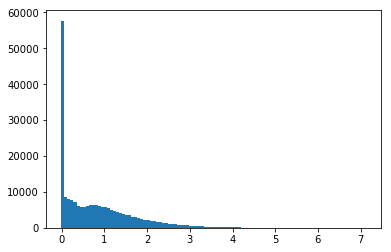

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

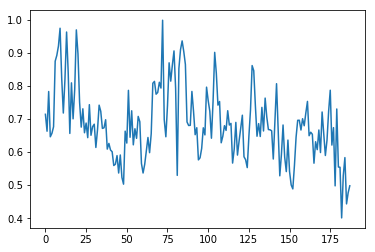

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.218116029308

 1.46674675329
1681

 0.21788166215

 1.44164774572
1682

 0.218550135501

 1.45714266681
1683

 0.21894246211

 1.46673829279
1684

 0.218717379303

 1.43712184705
1685

 0.218433453779

 1.47587004677
1686

 0.218292682927

 1.48643371574
1687

 0.218068101977

 1.45906295253
1688

 0.218003236977

 1.43511198597
1689

 0.217072543411

 1.44805590763
1690

 0.215497340159

 1.45946660439
1691

 0.213926151762

 1.45419293714
1692

 0.213794665261

 1.47492181337


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.870757


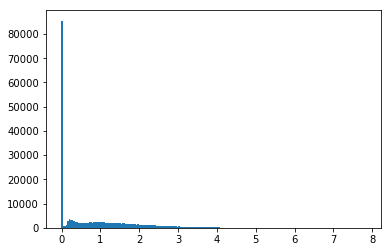

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.812093


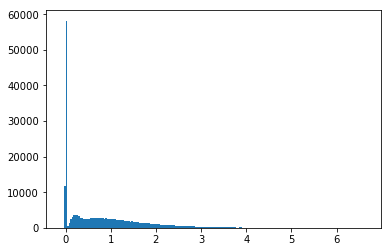

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.849958


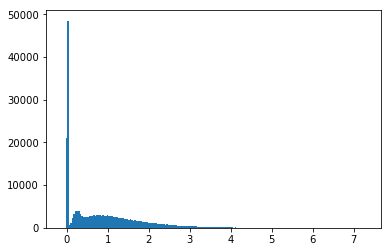

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.816196


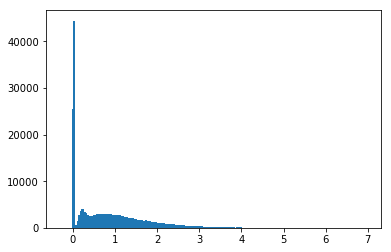

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.2180032369768142

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21806810197731608

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.2170725434106193

(54, 4100) 0.849958


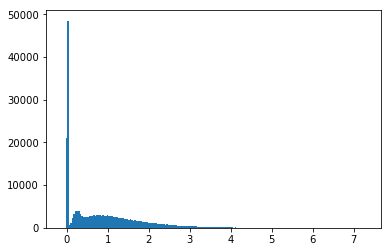

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True